Using cpu device
train_x tensor([[ 0.9814,  1.0064],
        [-1.5104, -0.9565],
        [ 0.8678,  0.6333],
        [ 0.3662,  0.0152],
        [-0.6987,  0.3310],
        [-0.5072,  1.4917],
        [ 1.0208,  0.6930],
        [ 1.2251, -1.2632],
        [ 1.0375,  1.1577],
        [-0.7835, -0.2551],
        [-1.4531,  1.5049],
        [ 0.9708, -0.0429],
        [-1.1943,  0.1848],
        [-1.2007, -1.2721],
        [ 0.5155, -0.3924],
        [-0.2962, -0.8413],
        [-0.8815,  1.4887],
        [-0.1577, -0.4130],
        [-0.6539, -0.5639],
        [ 0.4757, -1.0082],
        [-0.0356,  1.2894],
        [ 1.2308, -0.7420],
        [ 1.8557, -2.0053],
        [ 1.2565, -0.8727],
        [ 0.4317, -1.2573],
        [ 0.8574,  1.2764],
        [-1.0667, -1.6437],
        [-0.8639, -0.3121],
        [-1.1812,  0.5483],
        [-0.9679, -0.7029],
        [ 0.6055, -0.8977],
        [-1.1249,  1.3782],
        [ 0.0942,  0.7392],
        [ 0.3951,  1.1821],
        [-0.1486,  0.31

/Users/chexuanyou/anaconda3/envs/myenv/lib/python3.11/site-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([9216])) that is different to the input size (torch.Size([9216, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/Users/chexuanyou/anaconda3/envs/myenv/lib/python3.11/site-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([48])) that is different to the input size (torch.Size([48, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


net_outputs_test[0] [-0.08125515 -0.08220071 -0.08314629 ...  0.08459961  0.08619603
  0.0877924 ]
Prediction min: -0.15951213
Prediction max: 0.2351264


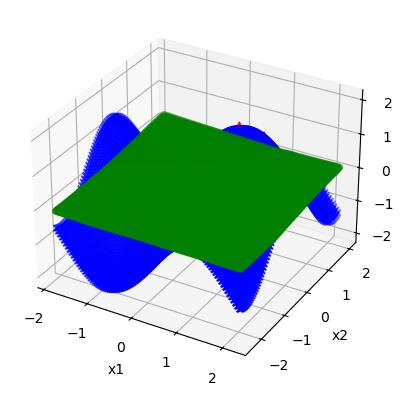

****************************************************************
Epoch 500/2000 Done, Total Loss: 0.0013875868608010933
net_outputs_test[0] [-1.7270648  -1.6427023  -1.5583395  ... -0.2210614  -0.28254336
 -0.34402537]
Prediction min: -2.6898823
Prediction max: 1.9956076


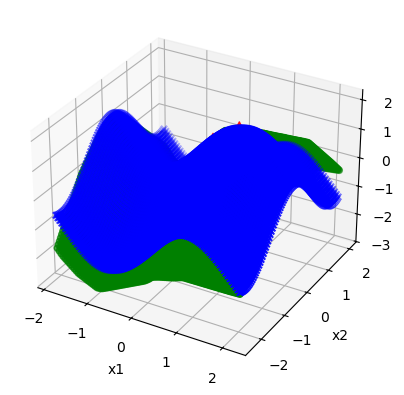

****************************************************************
Epoch 1000/2000 Done, Total Loss: 0.00013197008350592418
net_outputs_test[0] [-1.8076673 -1.718371  -1.6290742 ... -0.6483787 -0.7121995 -0.7760203]
Prediction min: -2.522374
Prediction max: 2.0379708


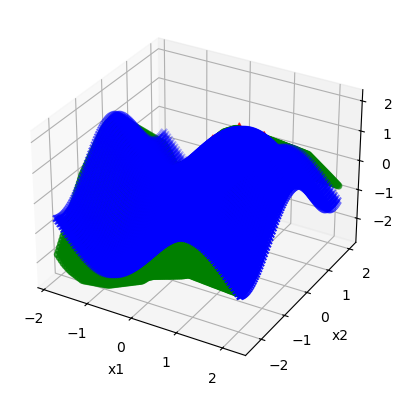

****************************************************************
Epoch 1500/2000 Done, Total Loss: 9.423887847030225e-05
net_outputs_test[0] [-1.9697434 -1.8929216 -1.8161    ... -0.7133111 -0.7772697 -0.8412281]
Prediction min: -2.515382
Prediction max: 2.0077455


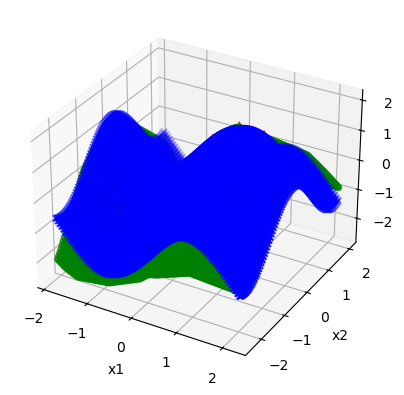

Final Train Accuracy: 100.00%
Final Test Accuracy: 5.20%
net_outputs_test[0] [-1.9935081  -1.9159029  -1.8382976  ... -0.7252006  -0.78905356
 -0.8529069 ]
Prediction min: -2.5331717
Prediction max: 1.9950044


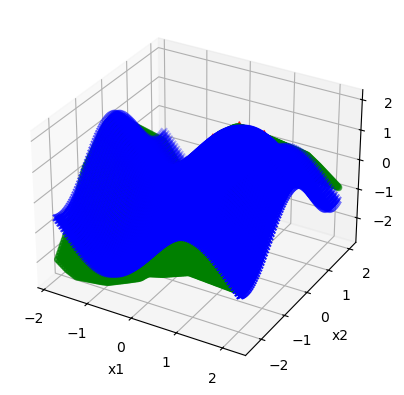

MLNet(
  (fcnn1): Sequential(
    (0): Linear(in_features=2, out_features=16, bias=True)
    (1): ReLU()
    (2): Linear(in_features=16, out_features=16, bias=True)
    (3): ReLU()
    (4): Linear(in_features=16, out_features=1, bias=True)
  )
)

Final Train Loss: 0.0002
Final Train Accuracy: 100.00%
Final Test Loss: 2.1785
Final Test Accuracy: 5.20%


In [12]:
###############################################Modified Code to 3D#########################################################
##########################################1. 3D no noise no Normalization#####################################################
# Import matplotlib for plotting purposes
import matplotlib
matplotlib.rcParams["text.usetex"] = False
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Sometimes, we need Numpy, but wherever possible, we prefer torch.
import numpy as np

# Import PyTorch
import torch
import torch.nn as nn
from torch.utils.data import TensorDataset, DataLoader

# Float (32 bit) or Double (64 bit) precision? Choose!
torch.set_default_dtype(torch.float32)#64)
torch.set_num_threads(4) # Use _maximally_ 4 CPU cores

# This is a list to store the hyperparameters of the training
hyperparam_log = []

#device = torch.device("cpu")
# Choose a device for major calculations (if there is a special GPU card, you usually want that).
# My GPU is not very performant for double precision, so I stay on CPU
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using {device} device")
device = torch.device(device)

# File path for saving the trained NN later.
# If only providing the file name (like here), the file will be generated in the same folder as the Python script
model_file = "mymodel.torch"

## The following script shows a data-driven training of a Neural Network.
## The data is generated in this script, too, by sampling from a function.
## The variables below are used to control this sampling
samples = 48
sample_min = -3
sample_max = 3
sample_span = sample_max - sample_min

## These parameters are usual hyperparameters of the NN and its training.
batch_size = 8 # How many samples shall be presented to the NN, before running another optimizer step?
hidden_dim = 16 # How many neurons shall there be in the hidden layer(s)?
input_dim = 2 # Input dimension of the NN (i.e. how many neurons are in the input layer?)
output_dim = 1 # Some for output

epochs = 2000 # Number of training iterations to be performed
lr = 0.002 # Which learning rate is passed to the training algorithm?

## Choose a criterion to evaluate the results. Here, we choose Mean Square error.
## The term "loss" means about the same as "remaining error" or "residual".
criterion = nn.MSELoss(reduction="mean")

## Here, we create the training data. In this example, we draw samples within the sampling interval and then pass it to
## e.g. the sin function (choose other functions to experiment with this script)
train_x = (sample_span * torch.rand(samples, 2) + sample_min * torch.ones(samples, 2))
train_y = torch.sin(train_x[:, 0]) + torch.cos(train_x[:, 1]) ##torch.pow(test_x, 2)

## Here, we create the test data. To show the effect of extrapolation and the detailed behavior of the NN,
## we choose points a bit outside the interval that we used for sampling training data. Also, we very dense points.
# test_x = torch.zeros(20*samples, 2)
# test_x[:, 0] = torch.linspace(sample_min - 0.5*sample_span, sample_max + 0.5*sample_span, test_x.size()[0])
# test_x[:, 1] = torch.linspace(sample_min - 0.5*sample_span, sample_max + 0.5*sample_span, test_x.size()[0])

# create test_x with meshgrid
grid_size = int(samples ** 0.5) * 2 
margin = 0.5  # only extend 1. from -5 to 5, extend to -6 to 6 
x1 = torch.linspace(sample_min - margin, sample_max + margin, 2*samples)
x2 = torch.linspace(sample_min - margin, sample_max + margin, 2*samples)
x1, x2 = torch.meshgrid(x1, x2) 
test_x = torch.zeros(2*samples*2*samples, 2)
test_x[:, 0] = x1.reshape(-1)
test_x[:, 1] = x2.reshape(-1)
test_y = torch.sin(test_x[:, 0]) + torch.cos(test_x[:, 1]) ##torch.pow(test_x, 2)

# standardize the data
scaler = StandardScaler()
train_x = torch.tensor(scaler.fit_transform(train_x), dtype=torch.float32)
test_x = torch.tensor(scaler.transform(test_x), dtype=torch.float32)

print ("train_x", train_x)
print ("train_y", train_y)

## We want a DataLoader to handle batching and shuffling of the training data for us.
## The DataLoader needs a TensorDataset, hence we create one from the Training data.
train_data = TensorDataset(train_x, train_y)
train_loader = DataLoader(train_data, shuffle=True, batch_size=batch_size, drop_last=False)


## This class creates the actual Neural Network.
class MLNet(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(MLNet, self).__init__()
        self.hidden_dim = hidden_dim

        ## In this case, I decided to pack the layers into a single container of type nn.Sequential
        ## This container is useful for Fully Connected NNs, where the output of each layer is just fed into the following layer.
        ## added dropout layer, which is a regularization technique to prevent overfitting
        self.fcnn1 = nn.Sequential(
            nn.Linear(input_dim, hidden_dim),
            #nn.Tanh(),
            nn.ReLU(),
            nn.Linear(hidden_dim, hidden_dim),
            nn.ReLU(),
            #nn.Linear(hidden_dim, hidden_dim),
            #nn.Dropout(p=0.05),  # Dropout layer with 30% of neurons being dropped，but it's not working well，the model underfitting, so change to 0.05
            #nn.ReLU(),
            nn.Linear(hidden_dim, output_dim),
        ) ## That network here has exactly 1 hidden layer (comment out some lines or write new ones to add more layers)
        ## nn.Linear is in the pictures represented by the arrows and has the weights (and biases) which are the
        ## parameters of the NN.
        ## nn.ReLU and Tanh are examples for activation functions - in the pictures, these are the bubbles / neurons.
        ## Usually, the pattern is interchanging between one linear layer, one activation function, one linear layer, one activation function and so on

    ## It is required to write a function that is executed when calling the NN model.
    ## Usually, it takes the input data and passes it through the layers.
    ## Here, it is sufficient to call the sequential container since this container does exactly this job.
    ## But this function "forward" could also be used to set up more complex NN architectures with more complex data flows
    def forward(self, x):
        out = self.fcnn1(x)
        return out

## This function performs a test run with the NN.
## It takes the NN model and the test data, passes the test inputs through the network and
## compares it with the target values = test outputs = targets
## and based on that calculates the loss value
def evaluate(model, test_x, test_y):
    ## For testing, we don't need the autograd feature/ protocol of all calculation steps
    ## So, save some time and disable grad tracking.
    with torch.no_grad():
        model.eval() ## Set the NN model into evaluation mode
        outputs = [] ## Create empty lists to store the results
        targets = []
        testlosses = []

        out = model(test_x.to(device)) ## Call the model, i.e. perform the actual inference

        ## Move the output quantities to the CPU, detach them from the tensor operation book-keeping and convert them to numpy arrays/ vectors.
        ## This is all necessary for plotting
        outputs.append(out.cpu().detach().numpy())
        targets.append(test_y.cpu().detach().numpy())
        testlosses.append(criterion(out, test_y.to(device)).item())

    ## Now return that in form of a triple of variables
    return outputs, targets, testlosses

## This calls the evaluate function and takes care of the plotting.
def eval_and_plot(model):
        ## matplotlib tries to be similar to the plot functions of matlab  (admittedly, the commands have to begin with "plt.", but the rest
        ## is quite similar.)
        # create a 3D plot
        fig = plt.figure()
        ax = fig.add_subplot(111, projection='3d')

        ## Call the network on the test data
        net_outputs_test, targets_test, testlosses = evaluate(model, test_x, test_y)   
        # Plot the targets first in blue (which means to plot the actual function over the whole test interval)
        #ax.plot(test_x[:, 0], test_x[:, 1], targets_test[0], color="-b", label="Target")
        ax.scatter(test_x[:, 0], test_x[:, 1], targets_test[0], c='b', marker='x', label='Target')
        ax.set_xlabel('x1')
        ax.set_ylabel('x2')
        ax.set_zlabel('y')

        ## Call the network on the training data
        net_outputs_train, targets_train, testlosses = evaluate(model, train_x, train_y)
        ## First, plot the targets in red, i.e. plot the training data set
        ax.scatter(train_x[:, 0], train_x[:, 1], targets_train[0], c='r', s=100, marker='^', label='Target')

        ## Now, plot the output of the NN on the whole test interval in green
        ## This allows us to see how the NN performs for interpolation as well as for extrapolation
        ax.scatter(test_x[:, 0], test_x[:, 1], net_outputs_test[0].reshape(-1), c='g', marker='o', label='Learned')
        print("net_outputs_test[0]", net_outputs_test[0].reshape(-1))

        print("Prediction min:", net_outputs_test[0].min())
        print("Prediction max:", net_outputs_test[0].max())


        ## All plotting is done, open the plot window
        plt.show()

## This function is the accuracy of the model
def calculate_accuracy(predictions, targets, threshold=0.1):
    """
    Calculate accuracy for regression by checking if predictions are within a certain range of targets.
    Args:
        predictions: Predicted values (torch.Tensor).
        targets: Actual values (torch.Tensor).
        threshold: Acceptable error range for considering a prediction as correct.
    Returns:
        Accuracy as a percentage (float).
    """
    correct = torch.abs(predictions - targets) <= threshold
    accuracy = correct.float().mean().item() * 100
    return accuracy

## That function takes care of the whole training
def train(train_loader, learn_rate, EPOCHS):  # 10):

    # Instantiate the NN
    model = MLNet(input_dim, hidden_dim, output_dim)
    model.to(device) # and move it to the "device" (in case we use a GPU)

    ## Choose an optimizer. Adam is quite robust and thus very popular. Technically, it's based on
    ## gradient descent, but mixes in the gradient of the last time step to improve robustness.
    ## It is given the model parameters, which are the weights and biases of the Linear layers
    ## and the learn_rate. 
    # add L2 regularization(weight_decay) to the optimizer
    #optimizer = torch.optim.Adam(model.parameters(), lr=lr, weight_decay=1e-5)
    optimizer = torch.optim.Adam(model.parameters(), lr=lr, weight_decay=0)
    print("Starting Training of the model")

    # StepLR scheduler: every 'step_size' epochs, lr = lr * gamma
    #scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=500, gamma=0.3)
    #print("Starting Training of the model with StepLR scheduler")

    # We want to keep track of the losses averaged over each epoch, to plot them in those famous
    # decreasing graphs
    avg_losses = torch.zeros(EPOCHS)

    ## In the end, epoch is just another word for "training iteration", so we have a simple for loop.
    for epoch in range(EPOCHS):
        model.train() # Set the model into train mode
        avg_loss = 0. # initializations

        ## DataLoader is iterable so that this for-loop loops over the batches of the training data set
        ## and the DataLoader gives us readily paired combinations of training inputs and targets (which are called x and label, here).
        ## The term "label" is more common in classification, but used for all supervised training tasks
        for x, label in train_loader:
            model.zero_grad() # Important: reset the gradients of the NN before passing the training inputs.
            # Otherwise, we would accumulate the gradient information which might ruin the results
            # or simply run into PyTorch exceptions

            ## Now, we can call the model on the training inputs.
            ## Therefor, we move that data to the device (just in case we use a GPU).
            out = model(x.to(device))
            out = out.squeeze(-1) ## The output is a tensor of shape (batch_size, 1), but we want to have a tensor of shape (batch_size)
            loss = criterion(out, label) # both are [batch_size,1]


            ## Here, the whole magic happens:
            ## PyTorch offers the autograd feature, i.e. calculations on tensors are tracked (there are exceptions, e.g.
            ## this is not possible for in-place operations). This allows to calculate the derivative of each output value
            ## w.r.t. all input values (its "gradient").
            ## In this case, we want to know the derivatives of the loss value w.r.t. all the NN parameters (weights and biases).
            ## Our optimizers are usually based on "Gradient Descent", so we need the gradients...
            loss.backward()
            ## Alright, now let the optimizer do the magic.
            ## We passed the optimizer the NN parameters by reference when we initialized the optimizer.
            ## And the gradient information is stored in the tensors of the parameters, too (not in the loss or so).
            ## That's why the step() function does not require any arguments.
            optimizer.step()

            ## For the plot at the end, save the loss values
            avg_loss += loss.item()

        ## It's an average loss, so divide by the number of samples/ size of the training data set
        avg_losses[epoch] = avg_loss / len(train_loader)

        ## StepLR scheduler step, update learning rate, every 500 epochs reduce lr by 0.3
    #    scheduler.step()

        ## To understand how the NN learns, all 500 epochs a plot is shown (Close the plot window and wait for the next plot)
        if epoch%500 == 0:
            print("****************************************************************")
            print("Epoch {}/{} Done, Total Loss: {}".format(epoch, EPOCHS, avg_loss / len(train_loader)))
            eval_and_plot(model)
    #       current_lr = scheduler.get_last_lr()[0]
    #       print(f"Current LR after scheduler step: {current_lr}")

    # Evaluate train accuracy
    with torch.no_grad():
        model.eval()
        train_out = model(train_x.to(device)).squeeze(-1)
        train_accuracy = calculate_accuracy(train_out, train_y.to(device))
        print(f"Final Train Accuracy: {train_accuracy:.2f}%")

    # Evaluate test accuracy
    test_outputs, test_targets, _ = evaluate(model, test_x, test_y)
    test_accuracy = calculate_accuracy(torch.tensor(test_outputs[0]), torch.tensor(test_targets[0]))
    print(f"Final Test Accuracy: {test_accuracy:.2f}%")


    ## Now save the trained model with all its properties to the model_file
    torch.save(model, model_file)

    ## And return the model in case we want to use it for other tasks
    return model


## As the functions written before are just function definitions,
## those functions still have to be called.
## This is done here.
## Train the model
model = train(train_loader, lr, epochs)

## Test that saving the model worked: load it from file
model = torch.load(model_file)
## and evaluate and plot once
eval_and_plot(model)

print(model)

# Evaluate and print train loss and accuracy
with torch.no_grad():
    model.eval()
    # Calculate Train Loss
    train_out = model(train_x.to(device)).squeeze(-1)
    final_train_loss = criterion(train_out, train_y.to(device)).item()

    # Calculate Train Accuracy
    train_accuracy = calculate_accuracy(train_out, train_y.to(device))
    print(f"\nFinal Train Loss: {final_train_loss:.4f}")
    print(f"Final Train Accuracy: {train_accuracy:.2f}%")

# Evaluate and print test loss and accuracy
test_outputs, test_targets, test_loss = evaluate(model, test_x, test_y)
final_test_loss = test_loss[0]  # Since test_loss is a list, take the first value

# Convert outputs to tensors for accuracy calculation
test_predictions = torch.tensor(test_outputs[0])
test_targets = torch.tensor(test_targets[0])

# Calculate Test Accuracy
test_accuracy = calculate_accuracy(test_predictions, test_targets)

print(f"Final Test Loss: {final_test_loss:.4f}")
print(f"Final Test Accuracy: {test_accuracy:.2f}%")


Using cpu device

**Running training with lr=0.02, hidden_dim=16, batch_size=8, epochs=2000


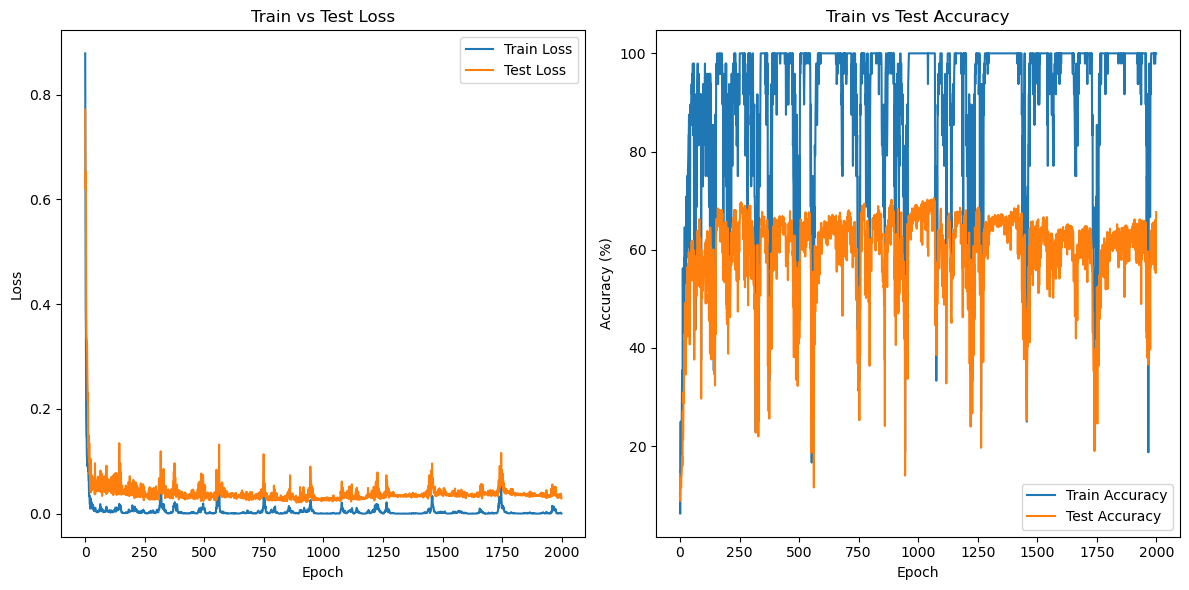

lr=0.02, hidden_dim=16, batch_size=8, epochs=2000
Final Train Loss: 0.0006, Final Test Loss: 0.0294
Final Train Accuracy: 100.00%, Final Test Accuracy: 67.68%

Average Train Accuracy (last 100 epochs): 94.60%, Average Test Accuracy (last 100 epochs): 59.56%



/Users/chexuanyou/anaconda3/envs/myenv/lib/python3.11/site-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([9216])) that is different to the input size (torch.Size([9216, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


net_outputs_test[0] [-0.87028146 -0.8369211  -0.80356085 ... -1.1460133  -1.1773051
 -1.2076674 ]


/Users/chexuanyou/anaconda3/envs/myenv/lib/python3.11/site-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([48])) that is different to the input size (torch.Size([48, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


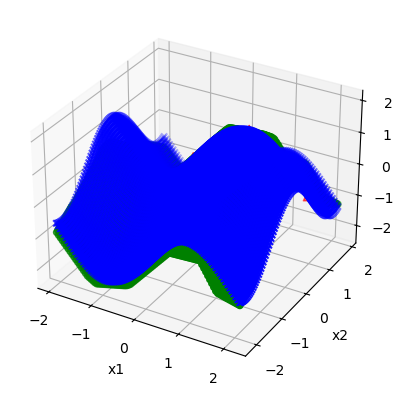

************************************************************************

**Running training with lr=0.01, hidden_dim=16, batch_size=8, epochs=2000


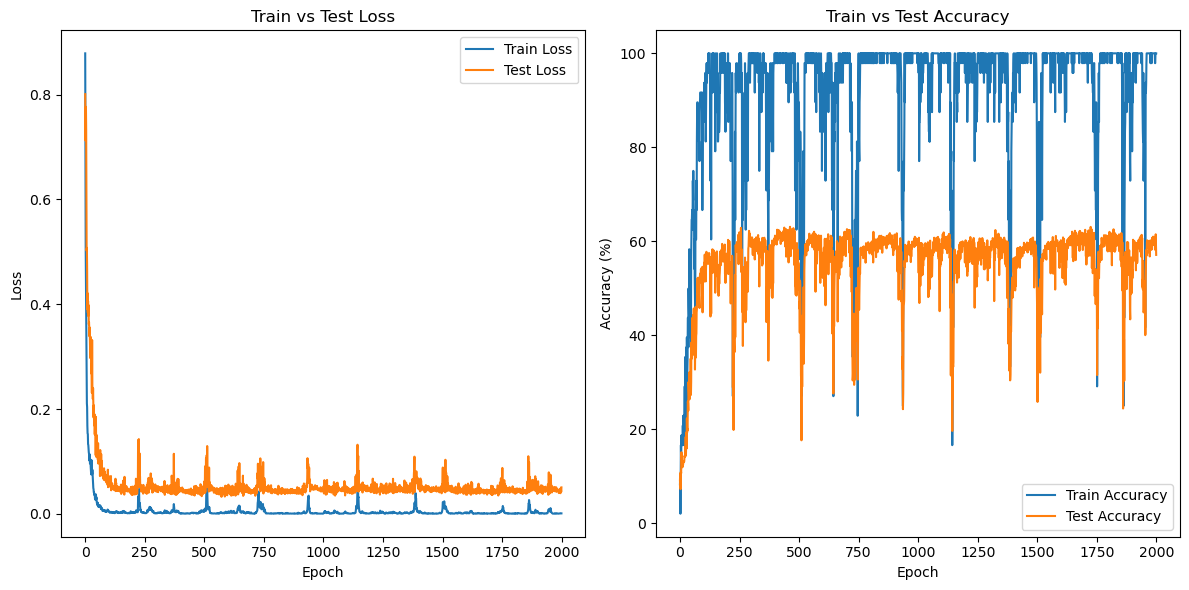

lr=0.01, hidden_dim=16, batch_size=8, epochs=2000
Final Train Loss: 0.0010, Final Test Loss: 0.0506
Final Train Accuracy: 100.00%, Final Test Accuracy: 57.13%

Average Train Accuracy (last 100 epochs): 96.44%, Average Test Accuracy (last 100 epochs): 57.36%

net_outputs_test[0] [-1.5669096 -1.5124774 -1.4580454 ... -1.2546233 -1.2788688 -1.3031143]


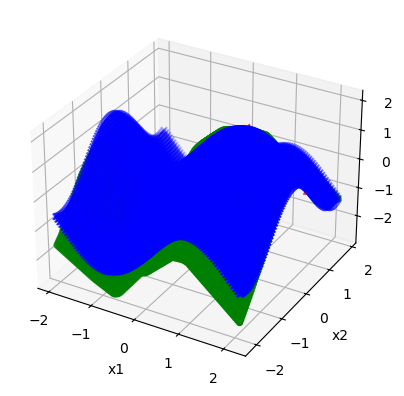

************************************************************************

**Running training with lr=0.005, hidden_dim=16, batch_size=8, epochs=2000


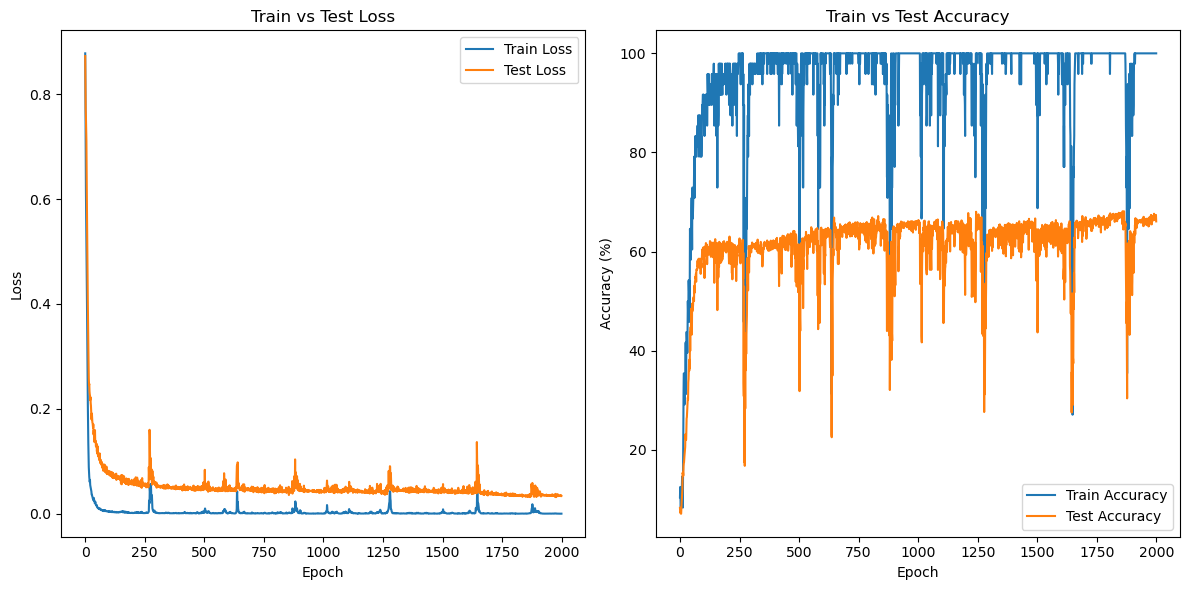

lr=0.005, hidden_dim=16, batch_size=8, epochs=2000
Final Train Loss: 0.0001, Final Test Loss: 0.0342
Final Train Accuracy: 100.00%, Final Test Accuracy: 66.09%

Average Train Accuracy (last 100 epochs): 99.50%, Average Test Accuracy (last 100 epochs): 65.71%

net_outputs_test[0] [-1.4221758 -1.3677527 -1.313329  ... -1.6680813 -1.6934576 -1.718834 ]


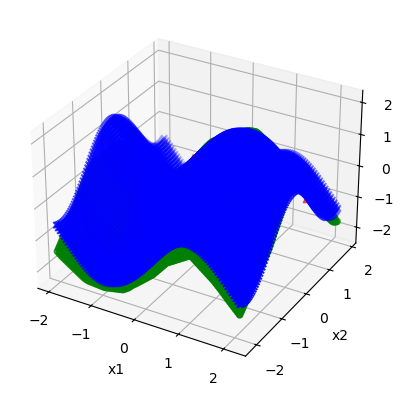

************************************************************************

**Running training with lr=0.002, hidden_dim=16, batch_size=8, epochs=2000


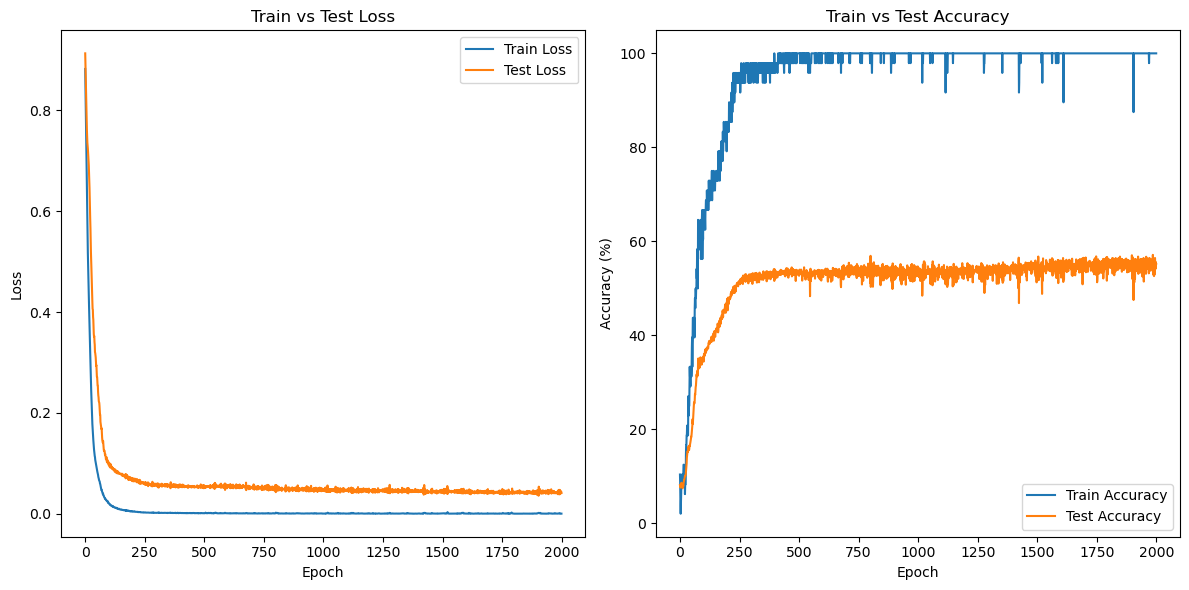

lr=0.002, hidden_dim=16, batch_size=8, epochs=2000
Final Train Loss: 0.0003, Final Test Loss: 0.0412
Final Train Accuracy: 100.00%, Final Test Accuracy: 55.15%

Average Train Accuracy (last 100 epochs): 99.79%, Average Test Accuracy (last 100 epochs): 54.68%

net_outputs_test[0] [-1.4518306 -1.4044712 -1.357111  ... -1.7428712 -1.7897029 -1.836535 ]


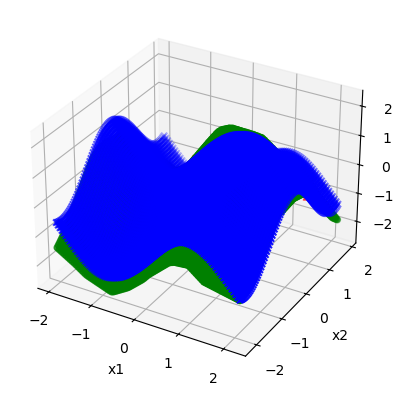

************************************************************************

**Running training with lr=0.001, hidden_dim=16, batch_size=8, epochs=2000


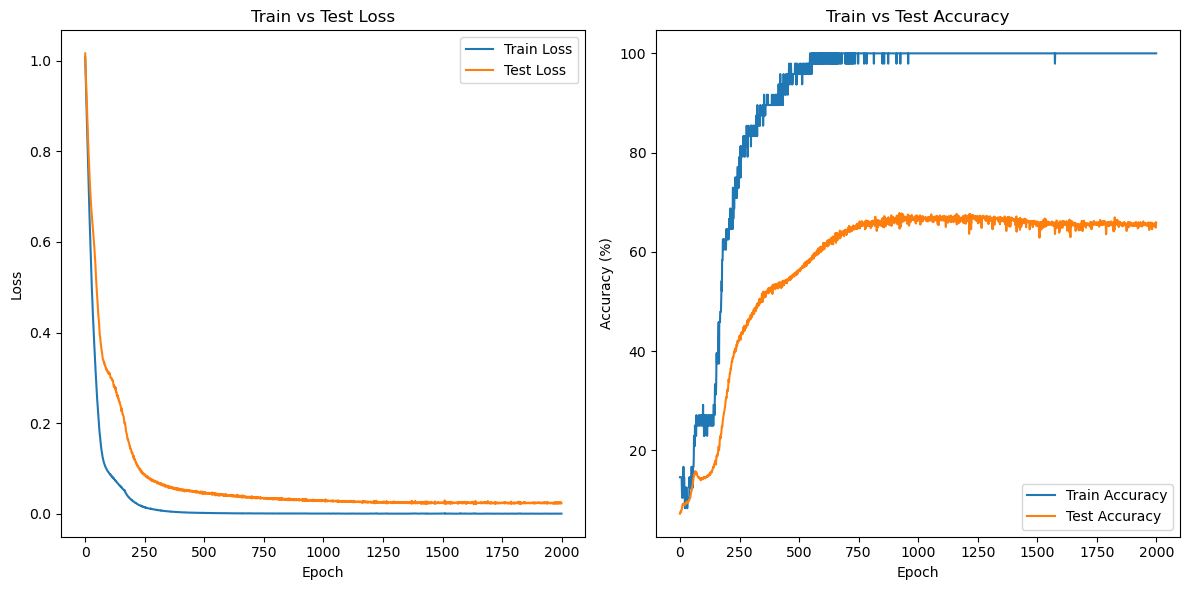

lr=0.001, hidden_dim=16, batch_size=8, epochs=2000
Final Train Loss: 0.0003, Final Test Loss: 0.0235
Final Train Accuracy: 100.00%, Final Test Accuracy: 65.90%

Average Train Accuracy (last 100 epochs): 100.00%, Average Test Accuracy (last 100 epochs): 65.47%

net_outputs_test[0] [-1.3093585  -1.262581   -1.2158029  ... -0.9361517  -0.95006543
 -0.963979  ]


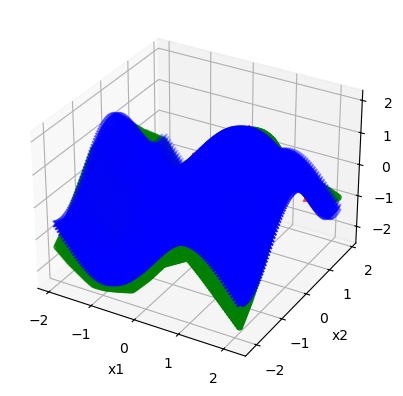

************************************************************************

**Running training with lr=0.0005, hidden_dim=16, batch_size=8, epochs=2000


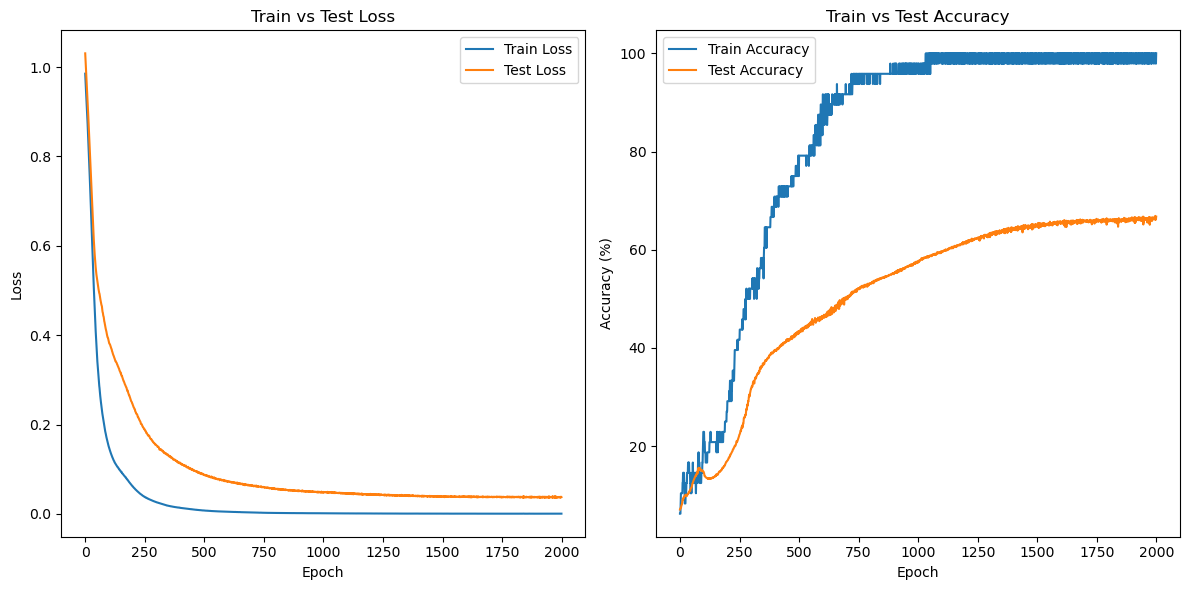

lr=0.0005, hidden_dim=16, batch_size=8, epochs=2000
Final Train Loss: 0.0005, Final Test Loss: 0.0375
Final Train Accuracy: 100.00%, Final Test Accuracy: 66.74%

Average Train Accuracy (last 100 epochs): 99.42%, Average Test Accuracy (last 100 epochs): 66.24%

net_outputs_test[0] [-1.600005  -1.5339028 -1.4678001 ... -1.7785984 -1.825984  -1.8607502]


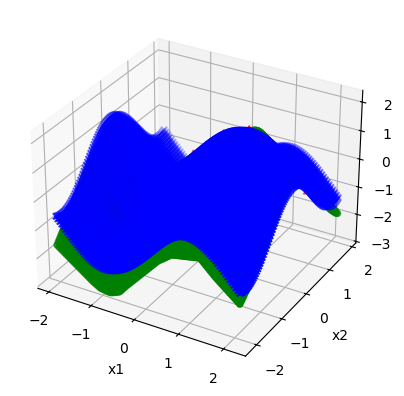

************************************************************************

**Running training with lr=0.0001, hidden_dim=16, batch_size=8, epochs=2000


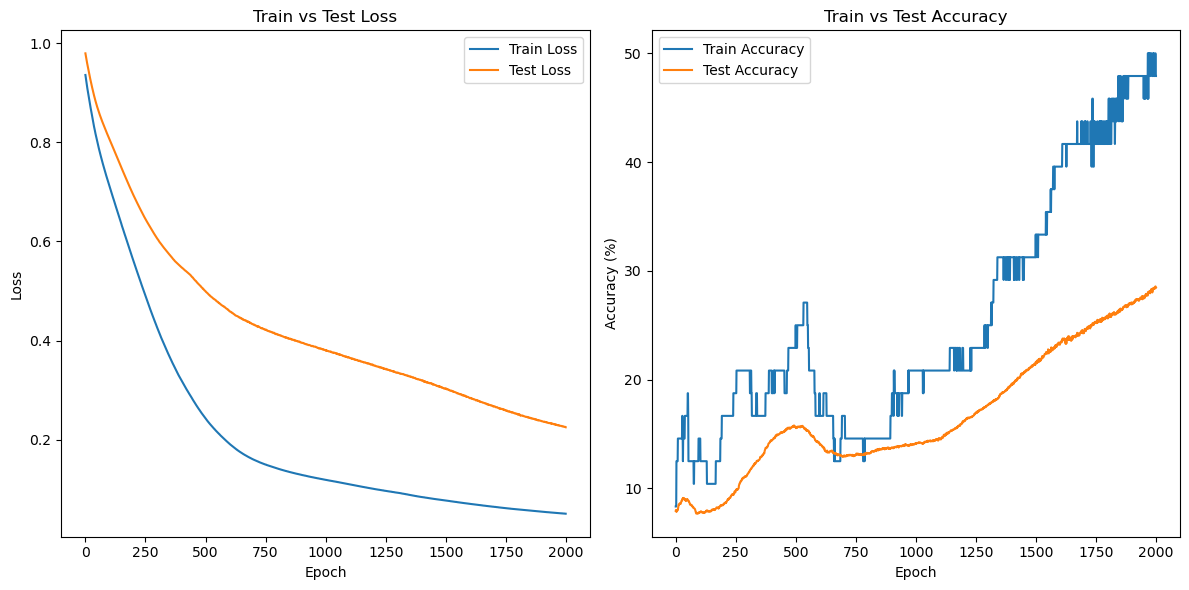

lr=0.0001, hidden_dim=16, batch_size=8, epochs=2000
Final Train Loss: 0.0504, Final Test Loss: 0.2249
Final Train Accuracy: 47.92%, Final Test Accuracy: 28.46%

Average Train Accuracy (last 100 epochs): 48.15%, Average Test Accuracy (last 100 epochs): 27.71%

net_outputs_test[0] [-1.815537   -1.7460027  -1.6764681  ... -0.25954834 -0.29409042
 -0.32863268]


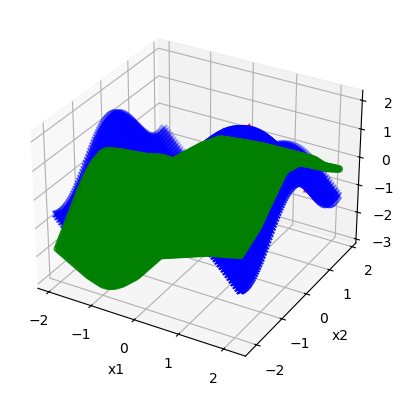

************************************************************************

**Running training with lr=0.001, hidden_dim=8, batch_size=8, epochs=2000


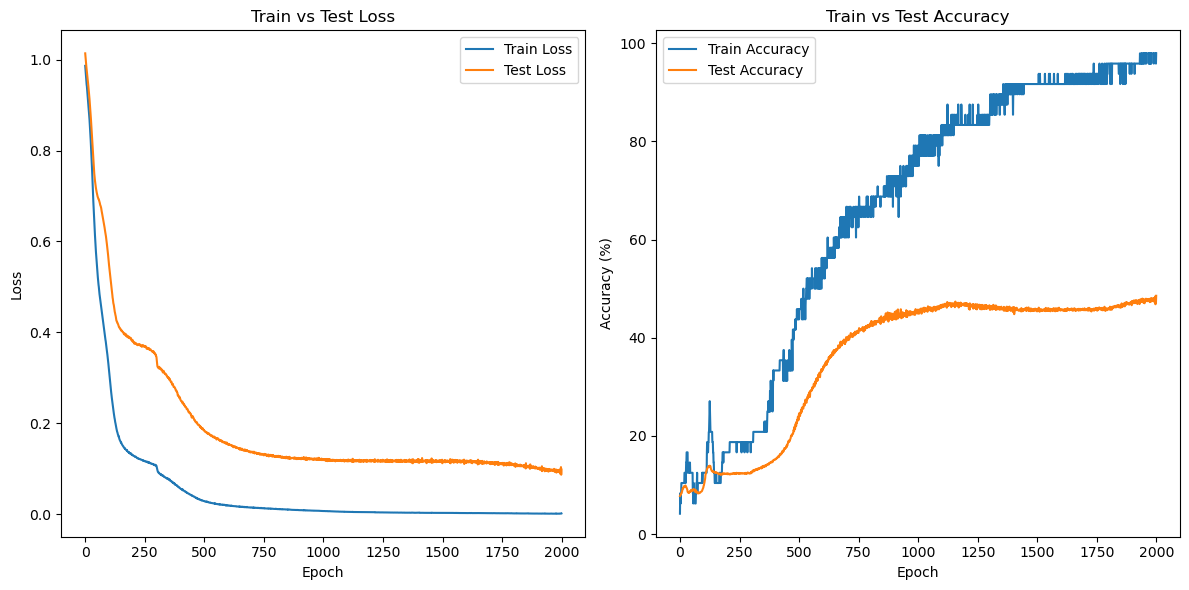

lr=0.001, hidden_dim=8, batch_size=8, epochs=2000
Final Train Loss: 0.0021, Final Test Loss: 0.0987
Final Train Accuracy: 97.92%, Final Test Accuracy: 48.55%

Average Train Accuracy (last 100 epochs): 96.79%, Average Test Accuracy (last 100 epochs): 47.58%

net_outputs_test[0] [-1.8227584 -1.7507423 -1.6787263 ... -1.2957971 -1.351627  -1.4074569]


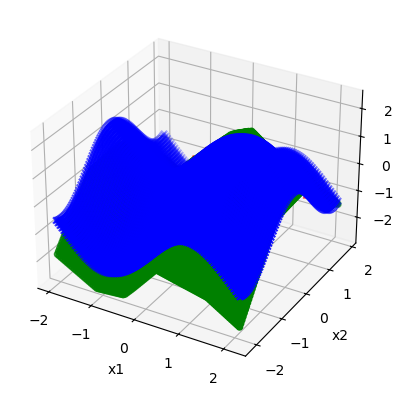

************************************************************************

**Running training with lr=0.001, hidden_dim=16, batch_size=8, epochs=2000


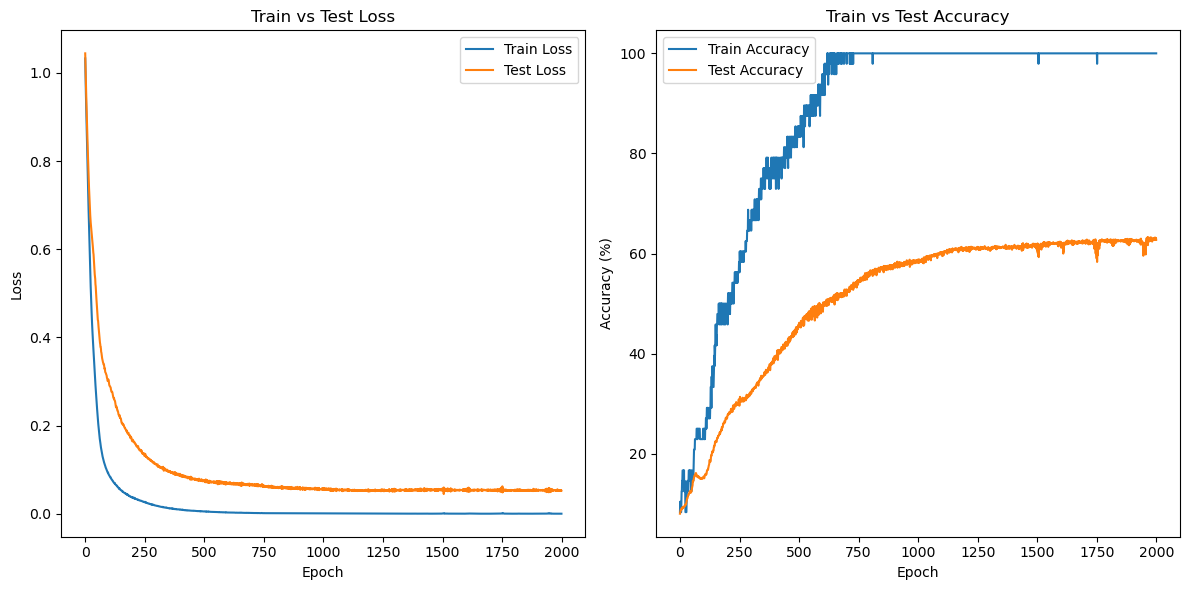

lr=0.001, hidden_dim=16, batch_size=8, epochs=2000
Final Train Loss: 0.0000, Final Test Loss: 0.0524
Final Train Accuracy: 100.00%, Final Test Accuracy: 62.78%

Average Train Accuracy (last 100 epochs): 100.00%, Average Test Accuracy (last 100 epochs): 62.45%

net_outputs_test[0] [-1.4501141 -1.3881224 -1.329925  ... -1.4177917 -1.4386764 -1.4595608]


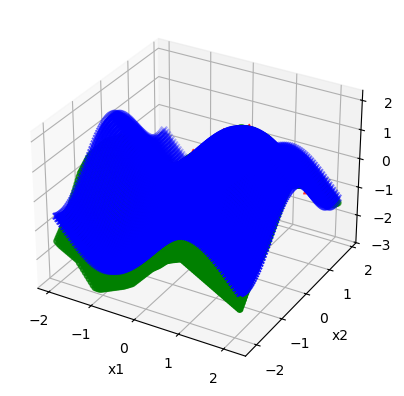

************************************************************************

**Running training with lr=0.001, hidden_dim=32, batch_size=8, epochs=2000


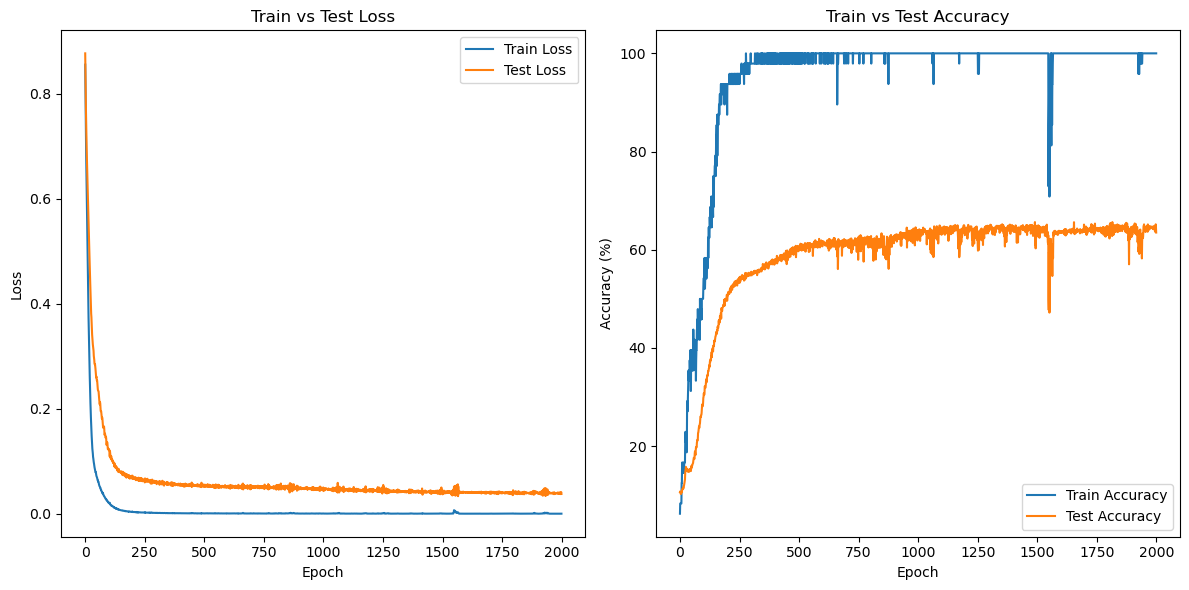

lr=0.001, hidden_dim=32, batch_size=8, epochs=2000
Final Train Loss: 0.0001, Final Test Loss: 0.0376
Final Train Accuracy: 100.00%, Final Test Accuracy: 63.51%

Average Train Accuracy (last 100 epochs): 99.75%, Average Test Accuracy (last 100 epochs): 63.67%

net_outputs_test[0] [-1.1980742 -1.1562184 -1.1143625 ... -1.8085966 -1.8747209 -1.9408454]


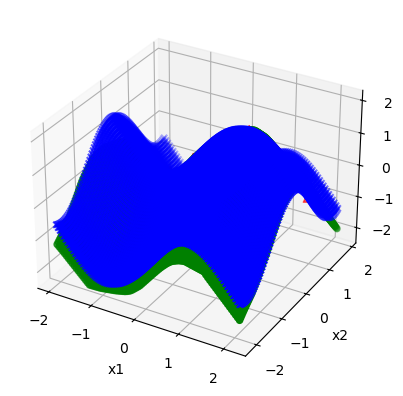

************************************************************************

**Running training with lr=0.001, hidden_dim=64, batch_size=8, epochs=2000


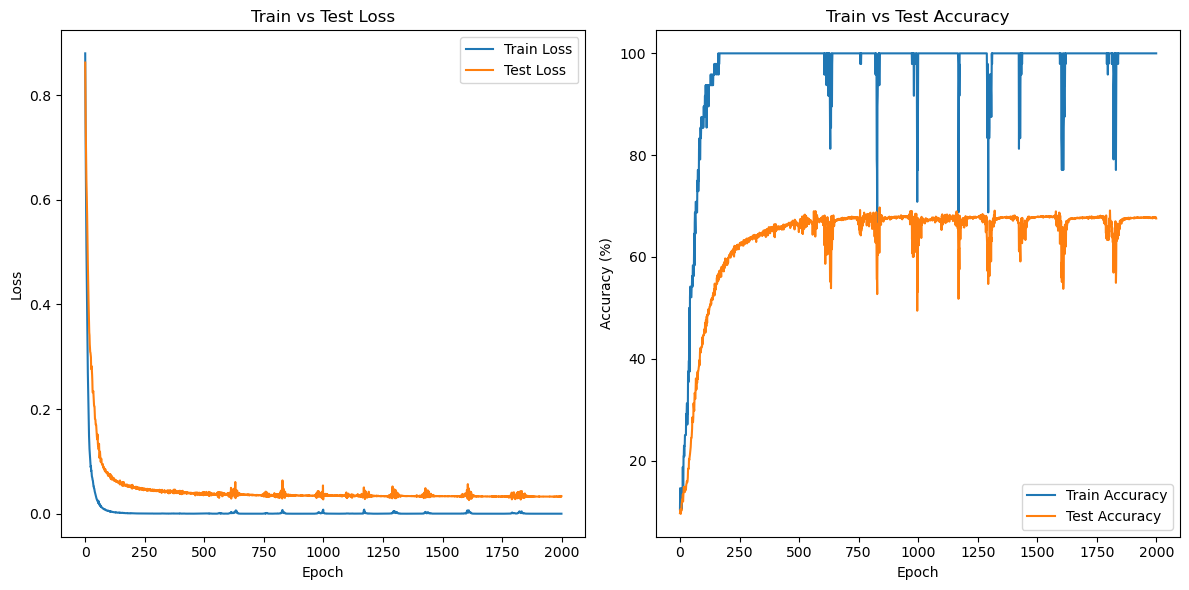

lr=0.001, hidden_dim=64, batch_size=8, epochs=2000
Final Train Loss: 0.0000, Final Test Loss: 0.0334
Final Train Accuracy: 100.00%, Final Test Accuracy: 67.57%

Average Train Accuracy (last 100 epochs): 100.00%, Average Test Accuracy (last 100 epochs): 67.72%

net_outputs_test[0] [-1.1916398 -1.1514349 -1.1112295 ... -1.1865703 -1.1961282 -1.2056856]


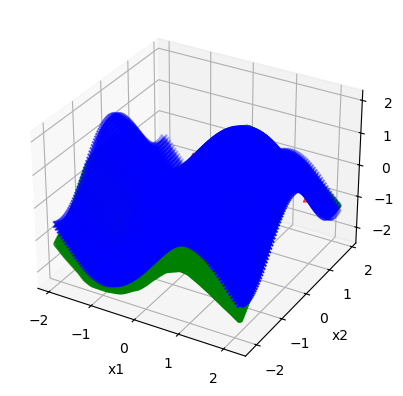

************************************************************************

**Running training with lr=0.001, hidden_dim=16, batch_size=4, epochs=2000


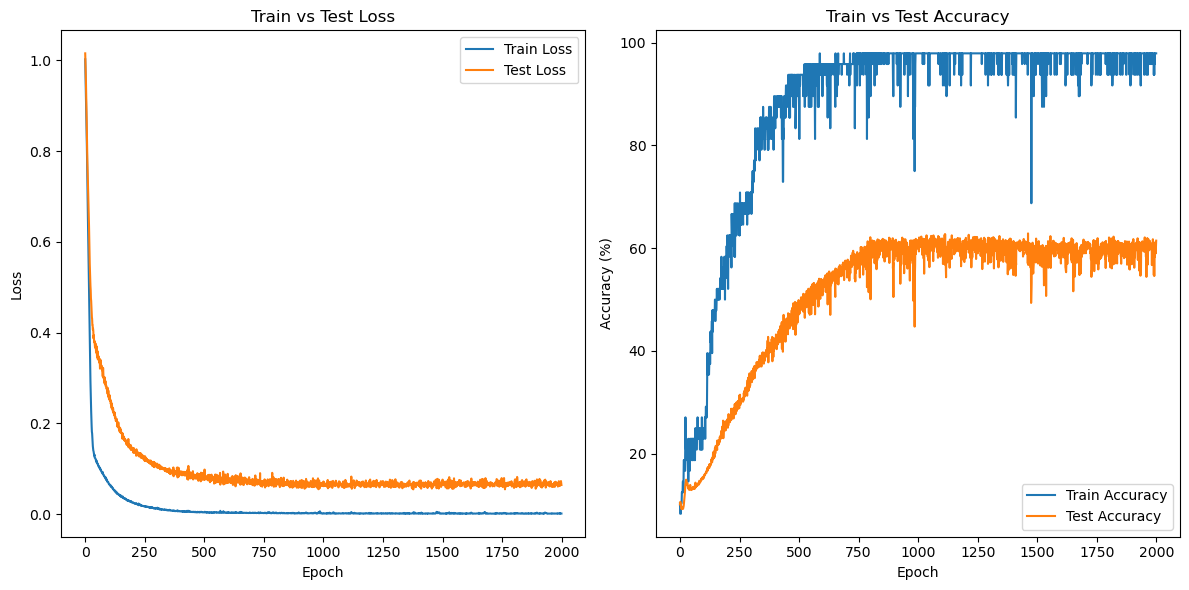

lr=0.001, hidden_dim=16, batch_size=4, epochs=2000
Final Train Loss: 0.0013, Final Test Loss: 0.0642
Final Train Accuracy: 97.92%, Final Test Accuracy: 61.47%

Average Train Accuracy (last 100 epochs): 97.23%, Average Test Accuracy (last 100 epochs): 59.81%

net_outputs_test[0] [-1.2476432 -1.2110611 -1.174478  ... -1.3062389 -1.3609892 -1.4157397]


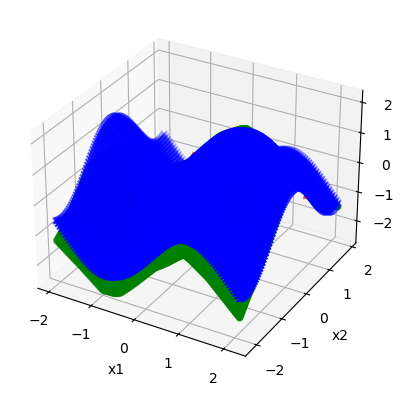

************************************************************************

**Running training with lr=0.001, hidden_dim=16, batch_size=8, epochs=2000


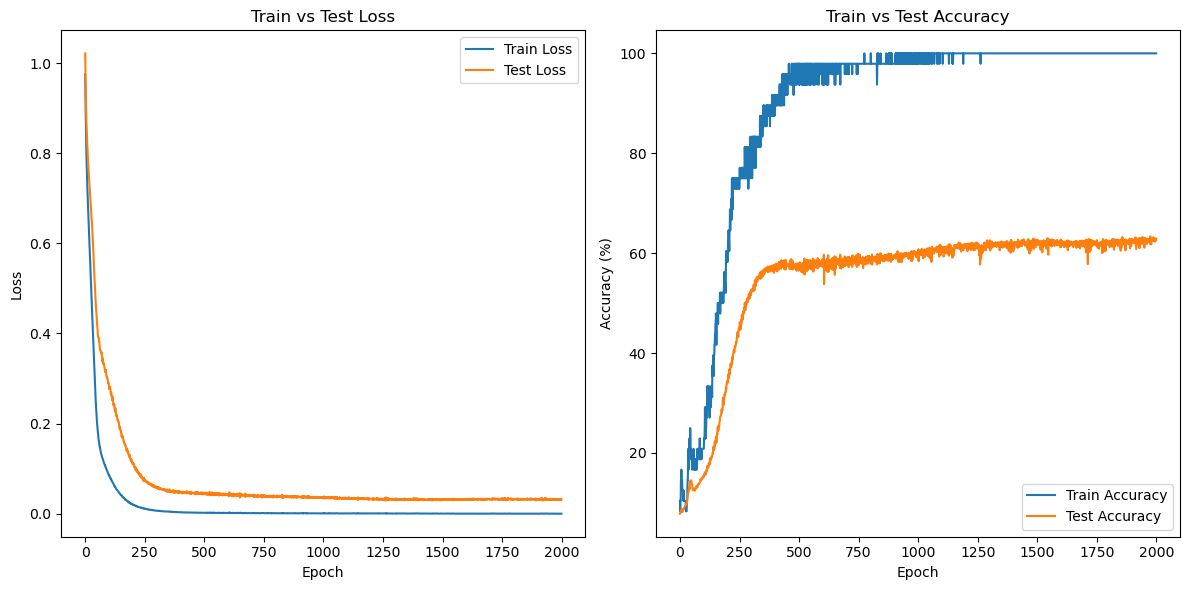

lr=0.001, hidden_dim=16, batch_size=8, epochs=2000
Final Train Loss: 0.0001, Final Test Loss: 0.0319
Final Train Accuracy: 100.00%, Final Test Accuracy: 62.91%

Average Train Accuracy (last 100 epochs): 100.00%, Average Test Accuracy (last 100 epochs): 62.46%

net_outputs_test[0] [-1.3743426 -1.3188803 -1.2634175 ... -1.4616129 -1.5029608 -1.5443082]


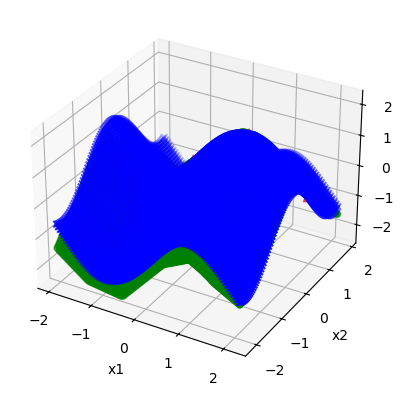

************************************************************************

**Running training with lr=0.001, hidden_dim=16, batch_size=16, epochs=2000


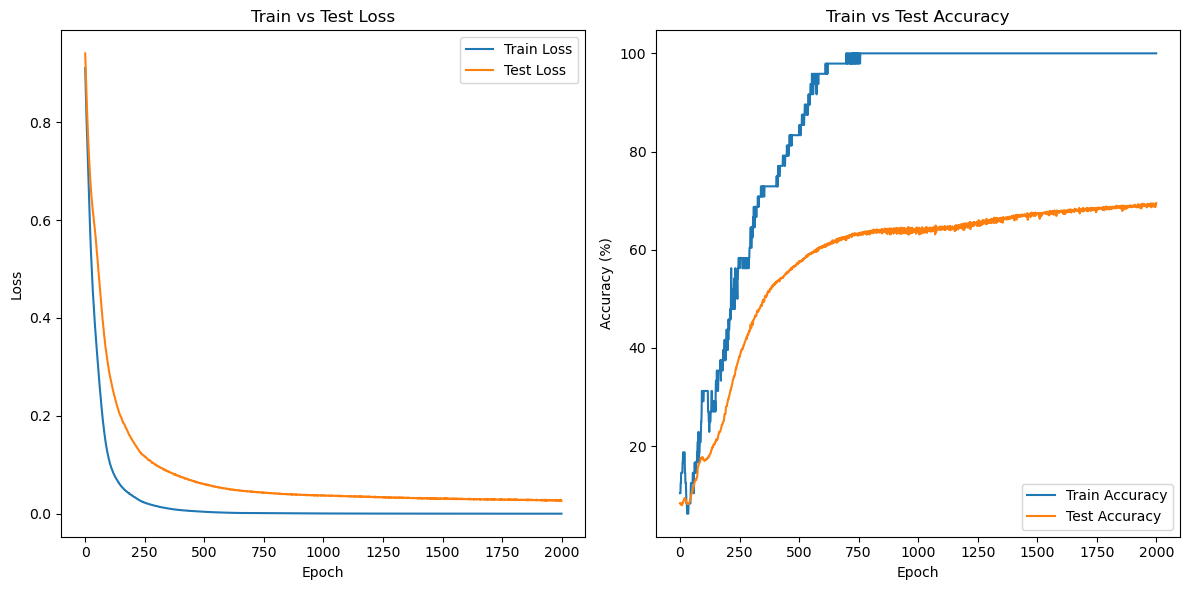

lr=0.001, hidden_dim=16, batch_size=16, epochs=2000
Final Train Loss: 0.0003, Final Test Loss: 0.0268
Final Train Accuracy: 100.00%, Final Test Accuracy: 69.51%

Average Train Accuracy (last 100 epochs): 100.00%, Average Test Accuracy (last 100 epochs): 69.00%

net_outputs_test[0] [-1.2455444 -1.202743  -1.1599416 ... -1.3673627 -1.4056522 -1.4439409]


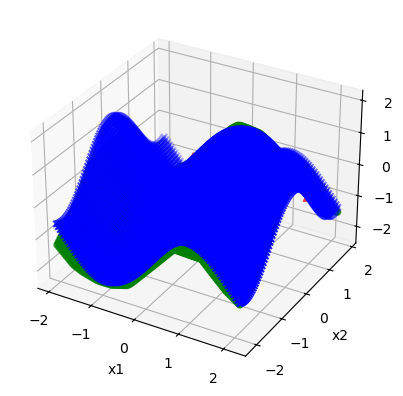

************************************************************************

**Running training with lr=0.001, hidden_dim=16, batch_size=32, epochs=2000


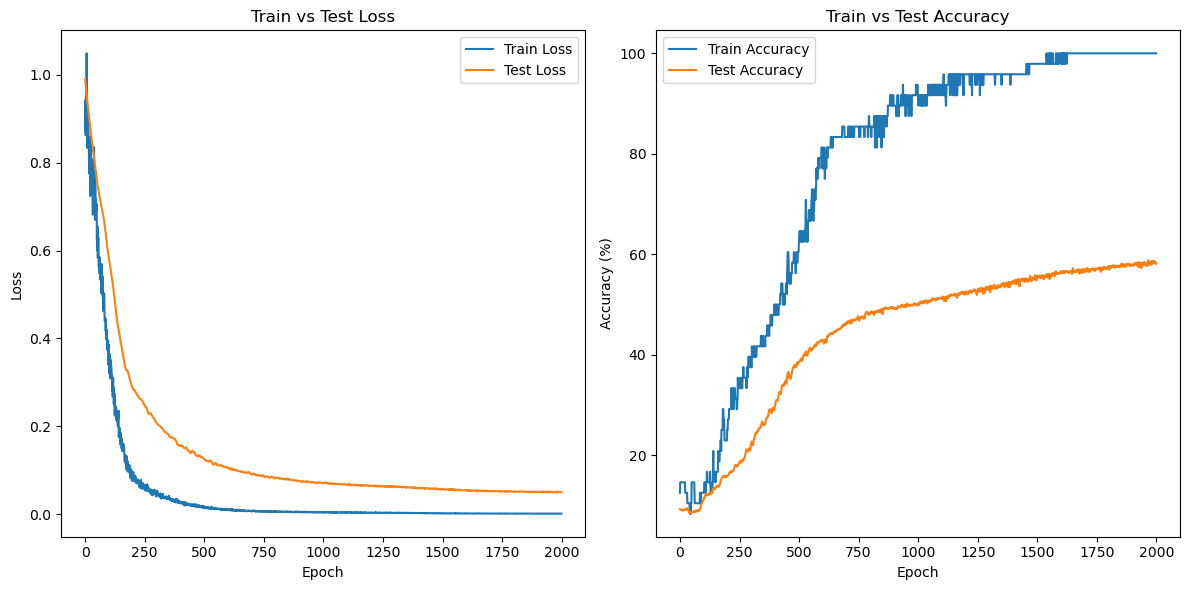

lr=0.001, hidden_dim=16, batch_size=32, epochs=2000
Final Train Loss: 0.0010, Final Test Loss: 0.0493
Final Train Accuracy: 100.00%, Final Test Accuracy: 58.16%

Average Train Accuracy (last 100 epochs): 100.00%, Average Test Accuracy (last 100 epochs): 58.11%

net_outputs_test[0] [-1.7000185 -1.6246881 -1.5361571 ... -1.4490072 -1.4821135 -1.5152191]


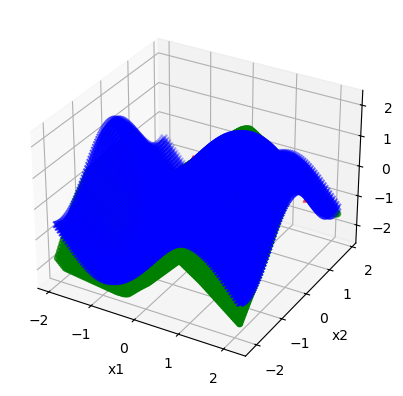

************************************************************************

**Running training with lr=0.001, hidden_dim=16, batch_size=8, epochs=1000


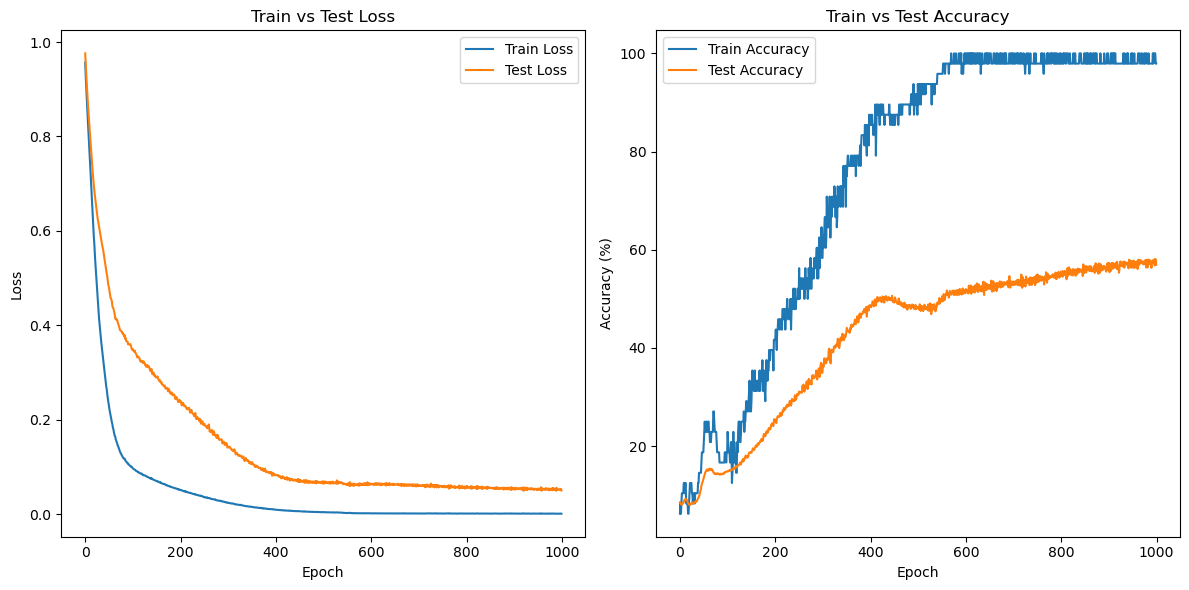

lr=0.001, hidden_dim=16, batch_size=8, epochs=1000
Final Train Loss: 0.0008, Final Test Loss: 0.0501
Final Train Accuracy: 97.92%, Final Test Accuracy: 56.92%

Average Train Accuracy (last 100 epochs): 98.54%, Average Test Accuracy (last 100 epochs): 57.11%

net_outputs_test[0] [-1.7117866 -1.6297015 -1.5554992 ... -1.5106446 -1.5579981 -1.6053517]


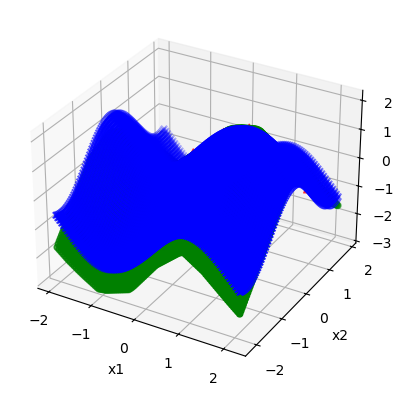

************************************************************************

**Running training with lr=0.001, hidden_dim=16, batch_size=8, epochs=2000


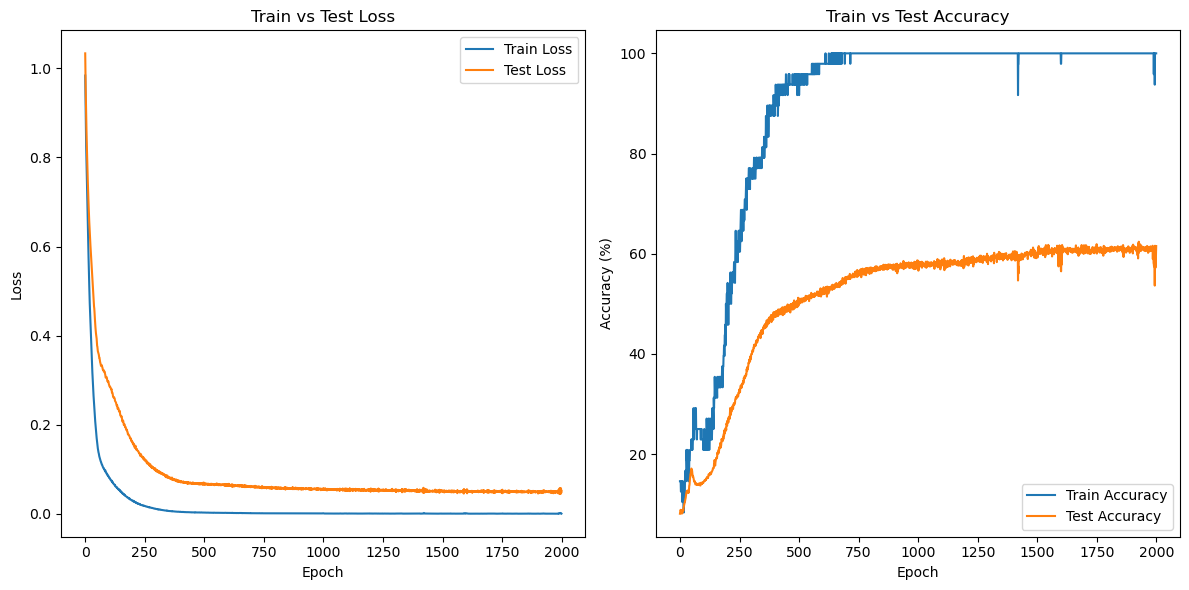

lr=0.001, hidden_dim=16, batch_size=8, epochs=2000
Final Train Loss: 0.0003, Final Test Loss: 0.0515
Final Train Accuracy: 100.00%, Final Test Accuracy: 61.52%

Average Train Accuracy (last 100 epochs): 99.90%, Average Test Accuracy (last 100 epochs): 60.74%

net_outputs_test[0] [-1.4111733 -1.3610017 -1.3108299 ... -1.2928114 -1.3283403 -1.363869 ]


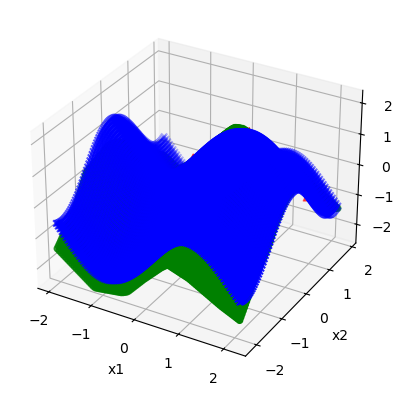

************************************************************************

**Running training with lr=0.001, hidden_dim=16, batch_size=8, epochs=3000


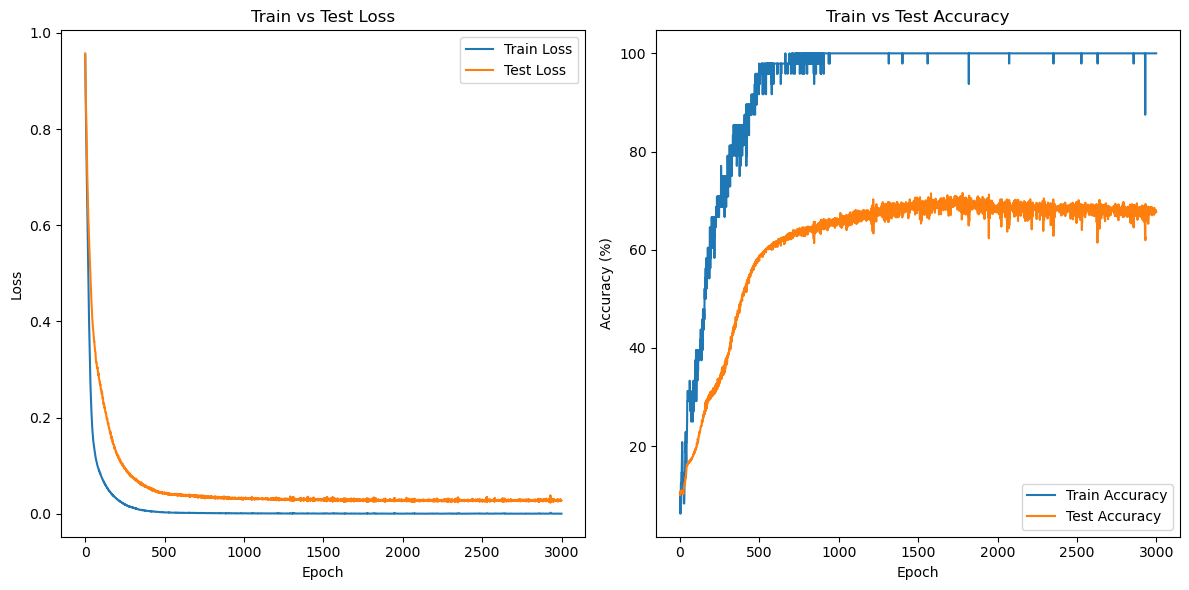

lr=0.001, hidden_dim=16, batch_size=8, epochs=3000
Final Train Loss: 0.0001, Final Test Loss: 0.0274
Final Train Accuracy: 100.00%, Final Test Accuracy: 67.69%

Average Train Accuracy (last 100 epochs): 99.83%, Average Test Accuracy (last 100 epochs): 67.56%

net_outputs_test[0] [-1.2731227 -1.2316507 -1.1901788 ... -1.8149436 -1.8774596 -1.9399754]


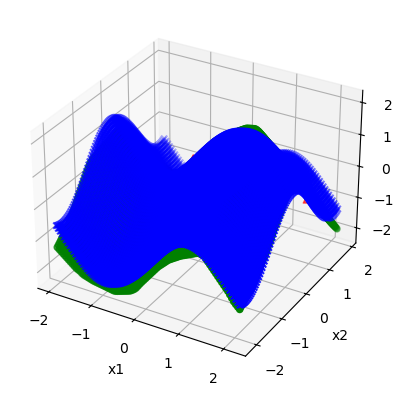

************************************************************************

### Summary Table ###
 learning_rate  hidden_dim  batch_size  epochs  final_train_loss  final_test_loss  final_train_accuracy  final_test_accuracy
        0.0200          16           8    2000            0.0006           0.0294               94.6042              59.5567
        0.0100          16           8    2000            0.0010           0.0506               96.4375              57.3560
        0.0050          16           8    2000            0.0001           0.0342               99.5000              65.7144
        0.0020          16           8    2000            0.0003           0.0412               99.7917              54.6834
        0.0010          16           8    2000            0.0003           0.0235              100.0000              65.4693
        0.0005          16           8    2000            0.0005           0.0375               99.4167              66.2365
        0.0001          16   

In [15]:
###############################################Modified Code to 3D#########################################################
#############################2. different Hyperparameters new version without noise  or normalization#####################################################
##### 保留原始代码，只修改部分代码，不覆盖

# Import matplotlib for plotting purposes
import matplotlib
matplotlib.rcParams["text.usetex"] = False
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Sometimes, we need Numpy, but wherever possible, we prefer torch.
import numpy as np

# Import PyTorch
import torch
import torch.nn as nn
from torch.utils.data import TensorDataset, DataLoader

# Float (32 bit) or Double (64 bit) precision? Choose!
torch.set_default_dtype(torch.float32)#64)
torch.set_num_threads(4) # Use _maximally_ 4 CPU cores

# This is a list to store the losses of the different hyperparameter configurations
train_losses_all = []
test_losses_all = []
models = []

# This is a list to store the hyperparameters of the training
# hyperparam_log = []

#device = torch.device("cpu")
# Choose a device for major calculations (if there is a special GPU card, you usually want that).

device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using {device} device")
device = torch.device(device)

# File path for saving the trained NN later.
# If only providing the file name (like here), the file will be generated in the same folder as the Python script
model_file = "mymodel.torch"

## The following script shows a data-driven training of a Neural Network.
## The data is generated in this script, too, by sampling from a function.
## The variables below are used to control this sampling
samples = 48
sample_min = -3
sample_max = 3
sample_span = sample_max - sample_min

## These parameters are usual hyperparameters of the NN and its training.
# batch_size = 8 # How many samples shall be presented to the NN, before running another optimizer step?
# hidden_dim = 16 # How many neurons shall there be in the hidden layer(s)?
input_dim = 2 # Input dimension of the NN (i.e. how many neurons are in the input layer?)
output_dim = 1 # Some for output

## Choose a criterion to evaluate the results. Here, we choose Mean Square error.
## The term "loss" means about the same as "remaining error" or "residual".
criterion = nn.MSELoss(reduction="mean")

## Here, we create the training data. In this example, we draw samples within the sampling interval and then pass it to
## e.g. the sin function (choose other functions to experiment with this script)
train_x = (sample_span * torch.rand(samples, 2) + sample_min * torch.ones(samples, 2))
train_y = torch.sin(train_x[:, 0]) + torch.cos(train_x[:, 1]) ##torch.pow(test_x, 2)

'''
# add noise to the training data
noise_level = 0.2  # noise level
train_y += noise_level * torch.randn_like(train_y)
'''
# To store summaries of each training run
summary_log = []

## This function logs the hyperparameters of the training
def log_hyperparameters(config, train_loss, test_loss, train_losses, train_accuracies, test_accuracies):
    hyperparam_log.append({
        "learning_rate": config["lr"],
        "hidden_dim": config["hidden_dim"],
        "batch_size": config["batch_size"],
        "epochs": config["epochs"],
        "final_train_loss": train_loss,
        "final_test_loss": test_loss,
        "final_train_accuracy": train_accuracies[-1],
        "final_test_accuracy": test_accuracies[-1],
        "train_losses": train_losses,
        "train_accuracies": train_accuracies,
        "test_accuracies": test_accuracies
    })


# print ("train_x", train_x)
# print ("train_y", train_y)

## Here, we create the test data. To show the effect of extrapolation and the detailed behavior of the NN,
## we choose points a bit outside the interval that we used for sampling training data. Also, we very dense points.
# test_x = torch.zeros(20*samples, 2)
# test_x[:, 0] = torch.linspace(sample_min - 0.5*sample_span, sample_max + 0.5*sample_span, test_x.size()[0])
# test_x[:, 1] = torch.linspace(sample_min - 0.5*sample_span, sample_max + 0.5*sample_span, test_x.size()[0])

# create test_x with meshgrid
grid_size = int(samples ** 0.5) * 2 
margin = 0.5  # only extend 1. from -5 to 5, extend to -5.5 to 5.5 
x1 = torch.linspace(sample_min - margin, sample_max + margin, 2*samples)
x2 = torch.linspace(sample_min - margin, sample_max + margin, 2*samples)
x1, x2 = torch.meshgrid(x1, x2) 
test_x = torch.zeros(2*samples*2*samples, 2)
test_x[:, 0] = x1.reshape(-1)
test_x[:, 1] = x2.reshape(-1)
test_y = torch.sin(test_x[:, 0]) + torch.cos(test_x[:, 1]) ##torch.pow(test_x, 2)

# standardize the data
scaler = StandardScaler()
train_x = torch.tensor(scaler.fit_transform(train_x), dtype=torch.float32)
test_x = torch.tensor(scaler.transform(test_x), dtype=torch.float32)

## We want a DataLoader to handle batching and shuffling of the training data for us.
## The DataLoader needs a TensorDataset, hence we create one from the Training data.
train_data = TensorDataset(train_x, train_y)

## This class creates the actual Neural Network.
class MLNet(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(MLNet, self).__init__()
        self.hidden_dim = hidden_dim

        ## In this case, I decided to pack the layers into a single container of type nn.Sequential
        ## This container is useful for Fully Connected NNs, where the output of each layer is just fed into the following layer.
        ## added dropout layer, which is a regularization technique to prevent overfitting
        self.fcnn1 = nn.Sequential(
            nn.Linear(input_dim, hidden_dim),
            #nn.Tanh(),
            nn.ReLU(),
            nn.Linear(hidden_dim, hidden_dim),
            nn.ReLU(),
            #nn.Linear(hidden_dim, hidden_dim),
            #nn.Dropout(p=0.1),  # Dropout layer with 30% of neurons being dropped，but it's not working well，the model underfitting, so change to 0.05
            #nn.ReLU(),
            nn.Linear(hidden_dim, output_dim),
        ) ## That network here has exactly 1 hidden layer (comment out some lines or write new ones to add more layers)
        ## nn.Linear is in the pictures represented by the arrows and has the weights (and biases) which are the
        ## parameters of the NN.
        ## nn.ReLU and Tanh are examples for activation functions - in the pictures, these are the bubbles / neurons.
        ## Usually, the pattern is interchanging between one linear layer, one activation function, one linear layer, one activation function and so on

    ## It is required to write a function that is executed when calling the NN model.
    ## Usually, it takes the input data and passes it through the layers.
    ## Here, it is sufficient to call the sequential container since this container does exactly this job.
    ## But this function "forward" could also be used to set up more complex NN architectures with more complex data flows
    def forward(self, x):
        out = self.fcnn1(x)
        return out

## This function performs a test run with the NN.
## It takes the NN model and the test data, passes the test inputs through the network and
## compares it with the target values = test outputs = targets
## and based on that calculates the loss value
def evaluate(model, test_x, test_y):
    ## For testing, we don't need the autograd feature/ protocol of all calculation steps
    ## So, save some time and disable grad tracking.
    with torch.no_grad():
        model.eval() ## Set the NN model into evaluation mode
        outputs = [] ## Create empty lists to store the results
        targets = []
        testlosses = []

        out = model(test_x.to(device)) ## Call the model, i.e. perform the actual inference

        ## Move the output quantities to the CPU, detach them from the tensor operation book-keeping and convert them to numpy arrays/ vectors.
        ## This is all necessary for plotting
        outputs.append(out.cpu().detach().numpy())
        targets.append(test_y.cpu().detach().numpy())
        testlosses.append(criterion(out, test_y.to(device)).item())

    ## Now return that in form of a triple of variables
    return outputs, targets, testlosses

## This calls the evaluate function and takes care of the plotting.
def eval_and_plot(model):
        ## matplotlib tries to be similar to the plot functions of matlab  (admittedly, the commands have to begin with "plt.", but the rest
        ## is quite similar.)

        # create a 3D plot
        fig = plt.figure()
        ax = fig.add_subplot(111, projection='3d')

        ## Call the network on the test data
        net_outputs_test, targets_test, testlosses = evaluate(model, test_x, test_y)   
        # Plot the targets first in blue (which means to plot the actual function over the whole test interval)
        #ax.plot(test_x[:, 0], test_x[:, 1], targets_test[0], color="-b", label="Target")
        ax.scatter(test_x[:, 0], test_x[:, 1], targets_test[0], c='b', marker='x', label='Target')
        ax.set_xlabel('x1')
        ax.set_ylabel('x2')
        ax.set_zlabel('y')

        ## Call the network on the training data
        net_outputs_train, targets_train, testlosses = evaluate(model, train_x, train_y)
        ## First, plot the targets in red, i.e. plot the training data set
        ax.scatter(train_x[:, 0], train_x[:, 1], targets_train[0], c='r', s=100, marker='^', label='Target')

        ## Now, plot the output of the NN on the whole test interval in green
        ## This allows us to see how the NN performs for interpolation as well as for extrapolation
        ax.scatter(test_x[:, 0], test_x[:, 1], net_outputs_test[0].reshape(-1), c='g', marker='o', label='Learned')
        print("net_outputs_test[0]", net_outputs_test[0].reshape(-1))

        ## All plotting is done, open the plot window
        plt.show()

def calculate_accuracy(predictions, targets, threshold = train_y.std().item() * 0.1):
    """
    Calculate accuracy for regression by checking if predictions are within a certain range of targets.
    Args:
        predictions: Predicted values (torch.Tensor).
        targets: Actual values (torch.Tensor).
        threshold: Acceptable error range for considering a prediction as correct.
    Returns:
        Accuracy as a percentage (float).
    """
    correct = torch.abs(predictions - targets) <= threshold
    return correct.float().mean().item() * 100  # Convert to percentage

def train_with_logging(lr_run, hidden_dim_run, batch_size_run, EPOCHS):
    # Create data loaders
    train_loader = DataLoader(train_data, shuffle=True, batch_size=batch_size_run, drop_last=False)

    model = MLNet(input_dim, hidden_dim_run, output_dim).to(device)
    optimizer = torch.optim.Adam(model.parameters(), lr=lr_run, weight_decay=0)

    train_losses = []
    test_losses = []
    train_accuracies = []
    test_accuracies = []

    for epoch in range(EPOCHS):
        model.train()
        avg_loss = 0.
        for x, label in train_loader:
            model.zero_grad()
            out = model(x.to(device)).squeeze(-1)
            loss = criterion(out, label.to(device))
            loss.backward()
            optimizer.step()
            avg_loss += loss.item()
        
        # Store train loss for the epoch
        train_losses.append(avg_loss / len(train_loader))

        # Evaluate train and test accuracy
        with torch.no_grad():
            model.eval()
            train_out = model(train_x.to(device)).squeeze(-1)
            train_accuracy = calculate_accuracy(train_out, train_y.to(device))
            train_accuracies.append(train_accuracy)

            test_out = model(test_x.to(device)).squeeze(-1)
            test_loss = criterion(test_out, test_y.to(device)).item()
            test_losses.append(test_loss)

            test_accuracy = calculate_accuracy(test_out, test_y.to(device))
            test_accuracies.append(test_accuracy)

        avg_final_train_acc = np.mean(train_accuracies[-100:]) if len(train_accuracies) >= 100 else train_accuracies[-1]
        avg_final_test_acc = np.mean(test_accuracies[-100:]) if len(test_accuracies) >= 100 else test_accuracies[-1]

    # Log final summary data
    summary_log.append({
        "learning_rate": lr_run,
        "hidden_dim": hidden_dim_run,
        "batch_size": batch_size,
        "epochs": EPOCHS,
        "final_train_loss": train_losses[-1],
        "final_test_loss": test_losses[-1],
        "final_train_accuracy": avg_final_train_acc,  # Approximate accuracy
        "final_test_accuracy": avg_final_test_acc,   # Approximate accuracy
    })

    return model, train_losses, test_losses, train_accuracies, test_accuracies, avg_final_train_acc, avg_final_test_acc



## As the functions written before are just function definitions,
## those functions still have to be called.
## This is done here.
## Train the model
# model = train(train_loader, lr, epochs)

## Test that saving the model worked: load it from file
# model = torch.load(model_file)
## and evaluate and plot once
# eval_and_plot(model)

###################### Hyperparameter Search Loop ######################
hyperparam_log = []  # reset hyperparam_log

hyperparam_configs = [
    # control variable: learning rate (lr) changes
    {"lr": 0.02,    "hidden_dim": 16, "batch_size": 8,  "epochs": 2000},
    {"lr": 0.01,    "hidden_dim": 16, "batch_size": 8,  "epochs": 2000},
    {"lr": 0.005,   "hidden_dim": 16, "batch_size": 8,  "epochs": 2000},
    {"lr": 0.002,   "hidden_dim": 16, "batch_size": 8,  "epochs": 2000},
    {"lr": 0.001,   "hidden_dim": 16, "batch_size": 8,  "epochs": 2000},
    {"lr": 0.0005,  "hidden_dim": 16, "batch_size": 8,  "epochs": 2000},
    {"lr": 0.0001,  "hidden_dim": 16, "batch_size": 8,  "epochs": 2000},

    # control variable: hidden dimension (hidden_dim) changes
    {"lr": 0.001,   "hidden_dim": 8,  "batch_size": 8,  "epochs": 2000},
    {"lr": 0.001,   "hidden_dim": 16, "batch_size": 8,  "epochs": 2000},
    {"lr": 0.001,   "hidden_dim": 32, "batch_size": 8,  "epochs": 2000},
    {"lr": 0.001,   "hidden_dim": 64, "batch_size": 8,  "epochs": 2000},

    # control variable: batch size (batch_size) changes
    {"lr": 0.001,   "hidden_dim": 16, "batch_size": 4,  "epochs": 2000},
    {"lr": 0.001,   "hidden_dim": 16, "batch_size": 8,  "epochs": 2000},
    {"lr": 0.001,   "hidden_dim": 16, "batch_size": 16, "epochs": 2000},
    {"lr": 0.001,   "hidden_dim": 16, "batch_size": 32, "epochs": 2000},

    # control variable: epochs changes
    {"lr": 0.001,   "hidden_dim": 16, "batch_size": 8,  "epochs": 1000},
    {"lr": 0.001,   "hidden_dim": 16, "batch_size": 8,  "epochs": 2000},
    {"lr": 0.001,   "hidden_dim": 16, "batch_size": 8,  "epochs": 3000},

]

for config in hyperparam_configs:
    lr_run          = config["lr"]
    hidden_dim_run  = config["hidden_dim"]
    batch_size_run  = config["batch_size"]
    epochs_run      = config["epochs"]

    print(f"\n**Running training with lr={lr_run}, hidden_dim={hidden_dim_run}, batch_size={batch_size_run}, epochs={epochs_run}")

    # Train the model with logging
    model, train_losses, test_losses, train_accuracies, test_accuracies, avg_train_accracy, avg_test_accuracy = train_with_logging(lr_run, hidden_dim_run, batch_size_run, epochs_run)

    # Plot the losses and accuracies
    plt.figure(figsize=(12, 6))
    
    # Loss plot
    plt.subplot(1, 2, 1)
    plt.plot(train_losses, label="Train Loss")
    plt.plot(test_losses, label="Test Loss")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.title("Train vs Test Loss")
    plt.legend()

    # Accuracy plot
    plt.subplot(1, 2, 2)
    plt.plot(train_accuracies, label="Train Accuracy")
    plt.plot(test_accuracies, label="Test Accuracy")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy (%)")
    plt.title("Train vs Test Accuracy")
    plt.legend()

    plt.tight_layout()
    plt.show()

    print(f"lr={lr_run}, hidden_dim={hidden_dim_run}, batch_size={batch_size_run}, epochs={epochs_run}")
    print(f"Final Train Loss: {train_losses[-1]:.4f}, Final Test Loss: {test_losses[-1]:.4f}")
    print(f"Final Train Accuracy: {train_accuracies[-1]:.2f}%, Final Test Accuracy: {test_accuracies[-1]:.2f}%\n")
    print(f"Average Train Accuracy (last 100 epochs): {avg_train_accracy:.2f}%, Average Test Accuracy (last 100 epochs): {avg_test_accuracy:.2f}%\n")

    eval_and_plot(model)  # plot the training results
    print("************************************************************************")

###################### Hyperparameter Search Loop ######################

# Print summary table
import pandas as pd

print("\n### Summary Table ###")
summary_df = pd.DataFrame(summary_log)
summary_df = summary_df.round(4)  # Round results for clarity
print(summary_df.to_string(index=False))  # Pretty print


Using cpu device

**Running training with lr=0.02, hidden_dim=16, batch_size=8, epochs=2000


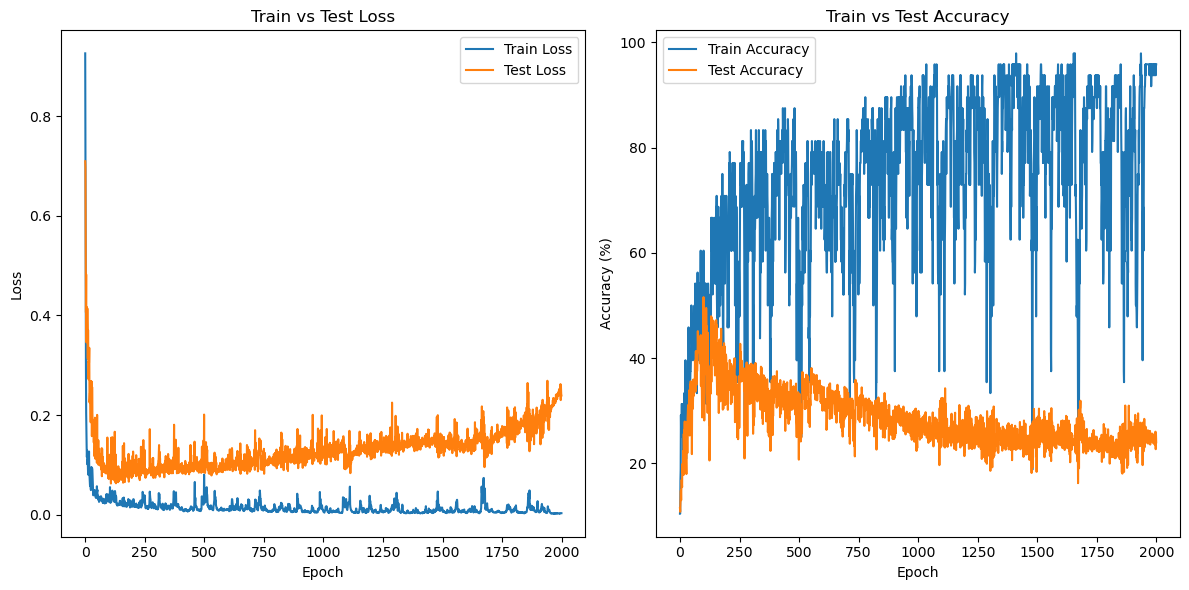

lr=0.02, hidden_dim=16, batch_size=8, epochs=2000
Final Train Loss: 0.0033, Final Test Loss: 0.2394
Final Train Accuracy: 95.83%, Final Test Accuracy: 23.99%

Average Train Accuracy (last 100 epochs): 86.02%, Average Test Accuracy (last 100 epochs): 24.96%



/Users/chexuanyou/anaconda3/envs/myenv/lib/python3.11/site-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([9216])) that is different to the input size (torch.Size([9216, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/Users/chexuanyou/anaconda3/envs/myenv/lib/python3.11/site-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([48])) that is different to the input size (torch.Size([48, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


net_outputs_test[0] [-1.7402296  -1.7046932  -1.669157   ... -0.87638074 -0.8888027
 -0.9012245 ]


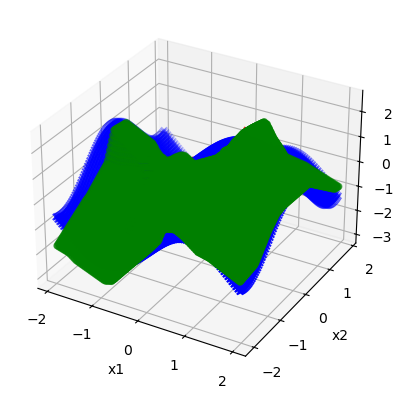

************************************************************************

**Running training with lr=0.01, hidden_dim=16, batch_size=8, epochs=2000


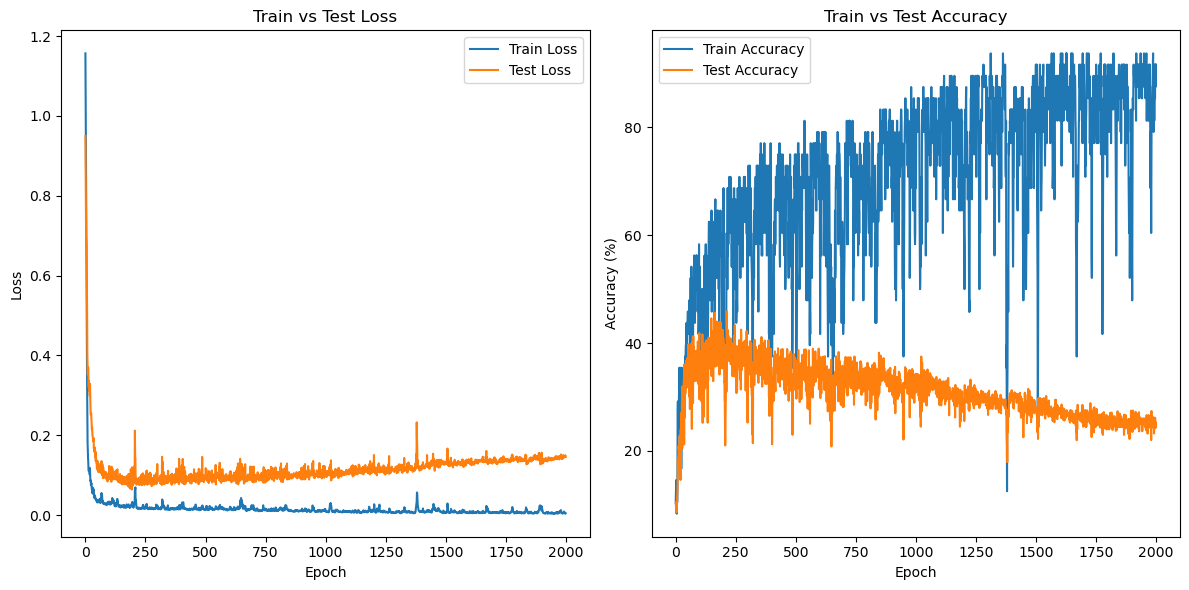

lr=0.01, hidden_dim=16, batch_size=8, epochs=2000
Final Train Loss: 0.0048, Final Test Loss: 0.1461
Final Train Accuracy: 91.67%, Final Test Accuracy: 24.40%

Average Train Accuracy (last 100 epochs): 86.85%, Average Test Accuracy (last 100 epochs): 25.37%

net_outputs_test[0] [-1.3905535  -1.3924669  -1.39438    ... -0.45856354 -0.50688136
 -0.5551989 ]


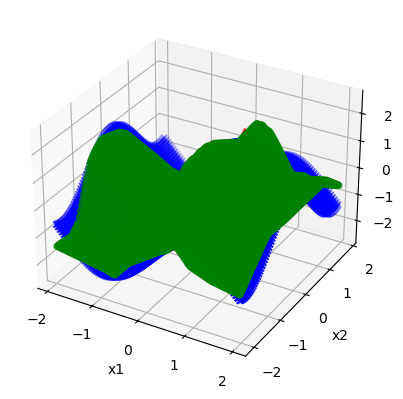

************************************************************************

**Running training with lr=0.005, hidden_dim=16, batch_size=8, epochs=2000


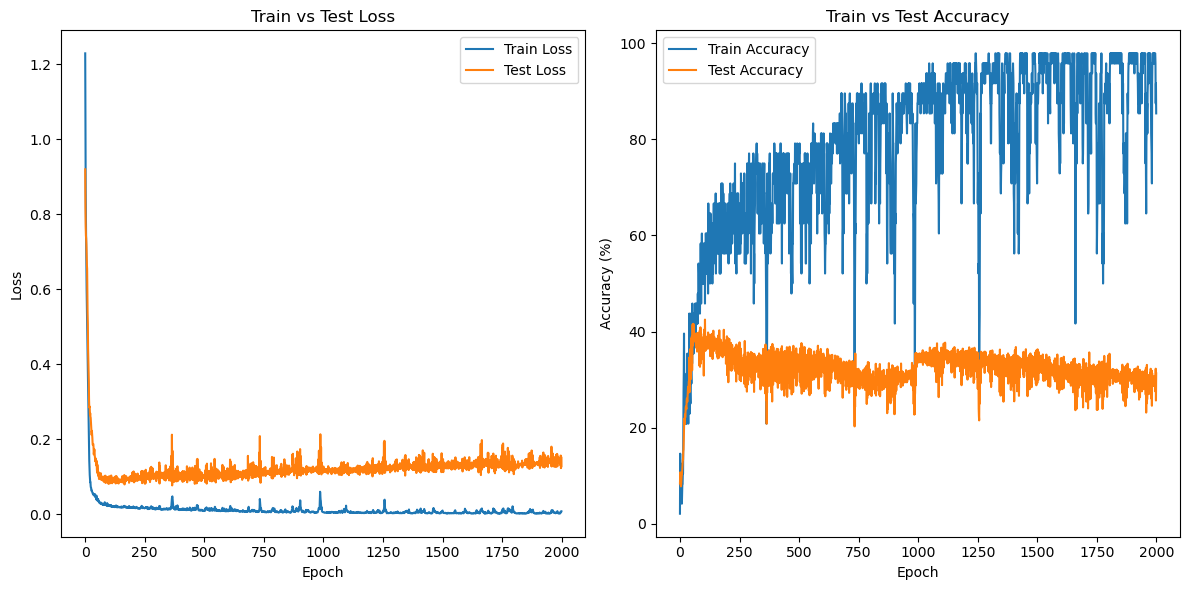

lr=0.005, hidden_dim=16, batch_size=8, epochs=2000
Final Train Loss: 0.0076, Final Test Loss: 0.1278
Final Train Accuracy: 85.42%, Final Test Accuracy: 31.30%

Average Train Accuracy (last 100 epochs): 92.92%, Average Test Accuracy (last 100 epochs): 29.54%

net_outputs_test[0] [-1.5592217 -1.5155861 -1.471951  ... -1.3965406 -1.4225423 -1.4485443]


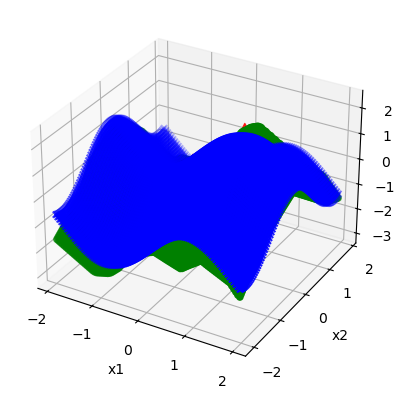

************************************************************************

**Running training with lr=0.002, hidden_dim=16, batch_size=8, epochs=2000


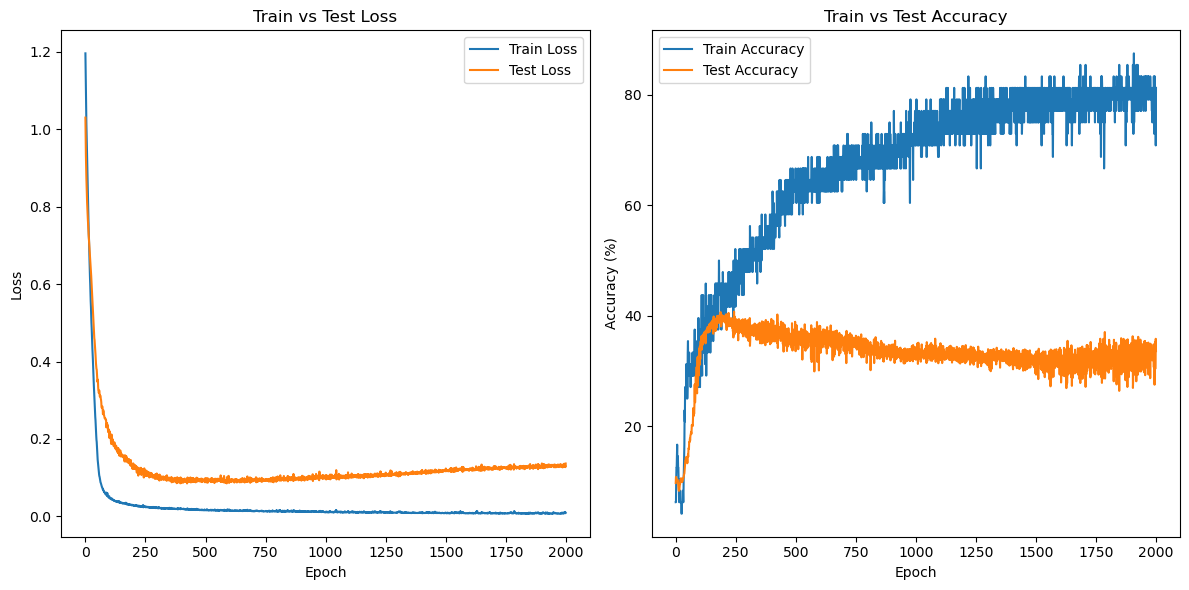

lr=0.002, hidden_dim=16, batch_size=8, epochs=2000
Final Train Loss: 0.0089, Final Test Loss: 0.1366
Final Train Accuracy: 81.25%, Final Test Accuracy: 33.62%

Average Train Accuracy (last 100 epochs): 80.06%, Average Test Accuracy (last 100 epochs): 33.03%

net_outputs_test[0] [-1.9705752 -1.8871552 -1.8037354 ... -1.6152004 -1.6655064 -1.7158123]


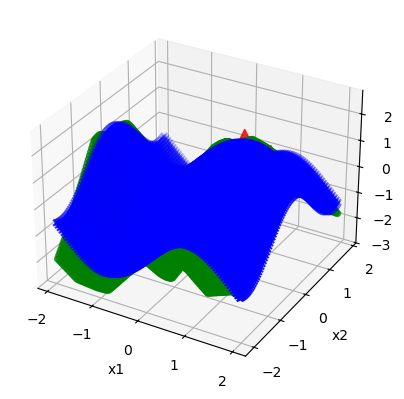

************************************************************************

**Running training with lr=0.001, hidden_dim=16, batch_size=8, epochs=2000


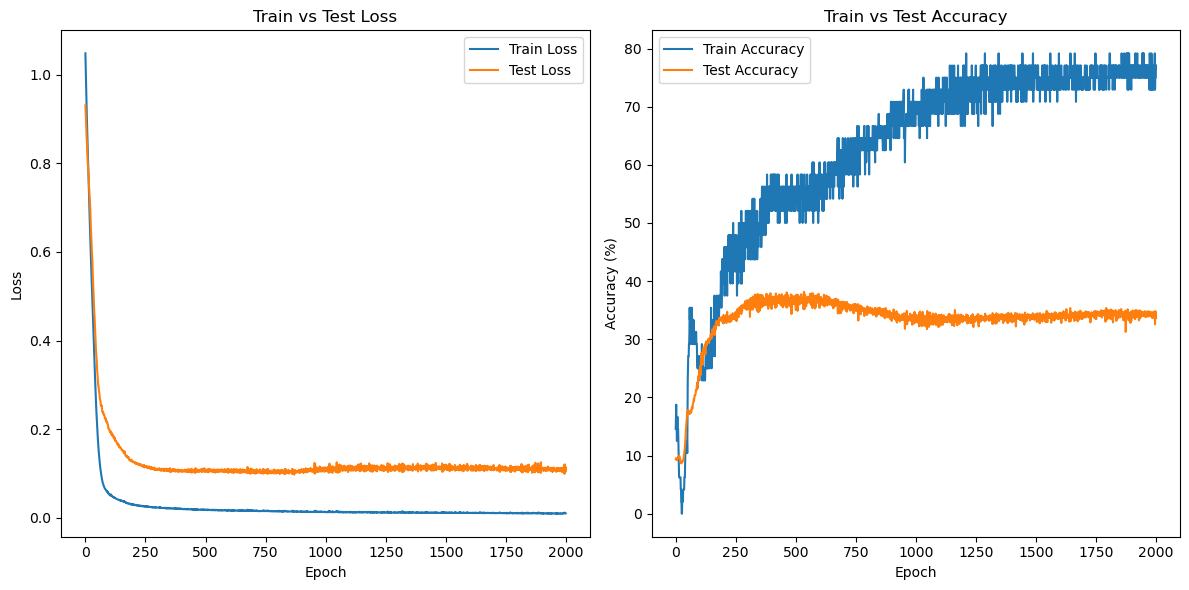

lr=0.001, hidden_dim=16, batch_size=8, epochs=2000
Final Train Loss: 0.0099, Final Test Loss: 0.1049
Final Train Accuracy: 77.08%, Final Test Accuracy: 33.69%

Average Train Accuracy (last 100 epochs): 76.19%, Average Test Accuracy (last 100 epochs): 34.27%

net_outputs_test[0] [-1.7394885 -1.6948757 -1.6502631 ... -1.9214194 -1.9564663 -1.9915147]


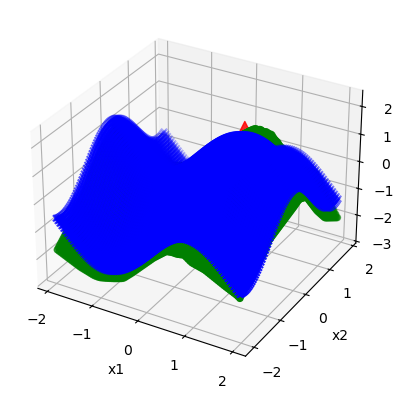

************************************************************************

**Running training with lr=0.0005, hidden_dim=16, batch_size=8, epochs=2000


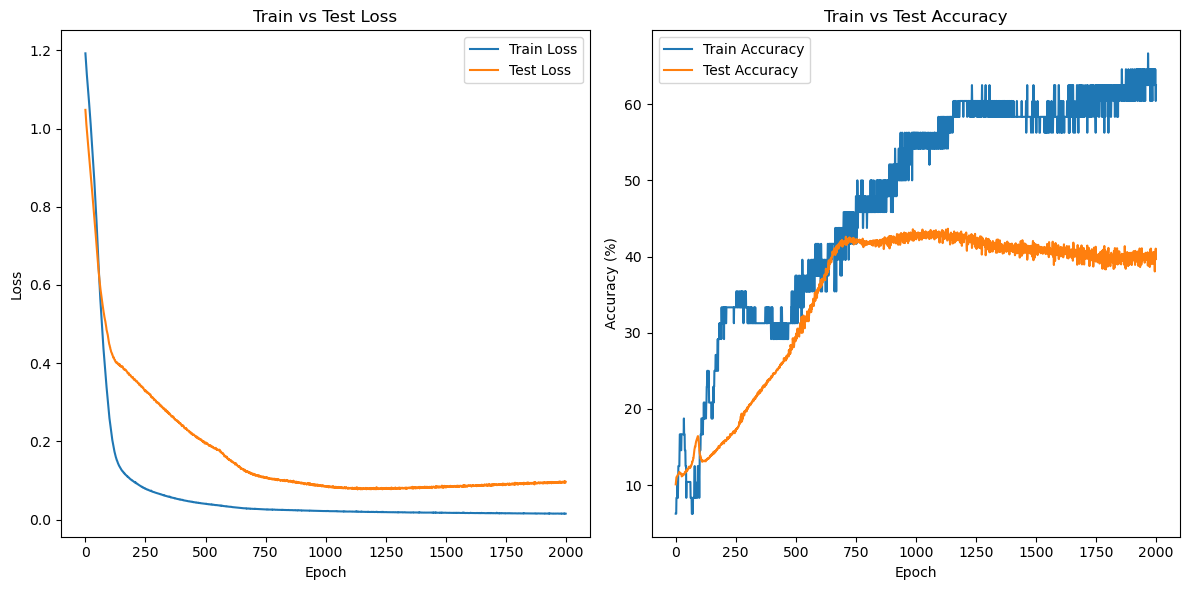

lr=0.0005, hidden_dim=16, batch_size=8, epochs=2000
Final Train Loss: 0.0152, Final Test Loss: 0.0967
Final Train Accuracy: 62.50%, Final Test Accuracy: 39.67%

Average Train Accuracy (last 100 epochs): 62.98%, Average Test Accuracy (last 100 epochs): 39.89%

net_outputs_test[0] [-1.7717705 -1.7171451 -1.6625199 ... -1.0585673 -1.0944936 -1.1304202]


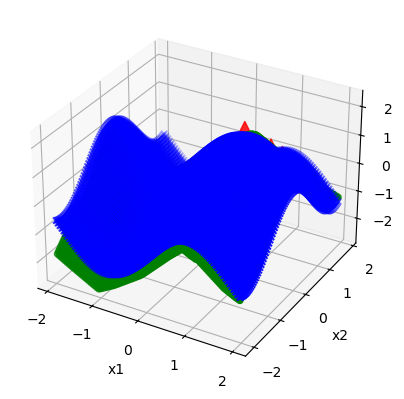

************************************************************************

**Running training with lr=0.0001, hidden_dim=16, batch_size=8, epochs=2000


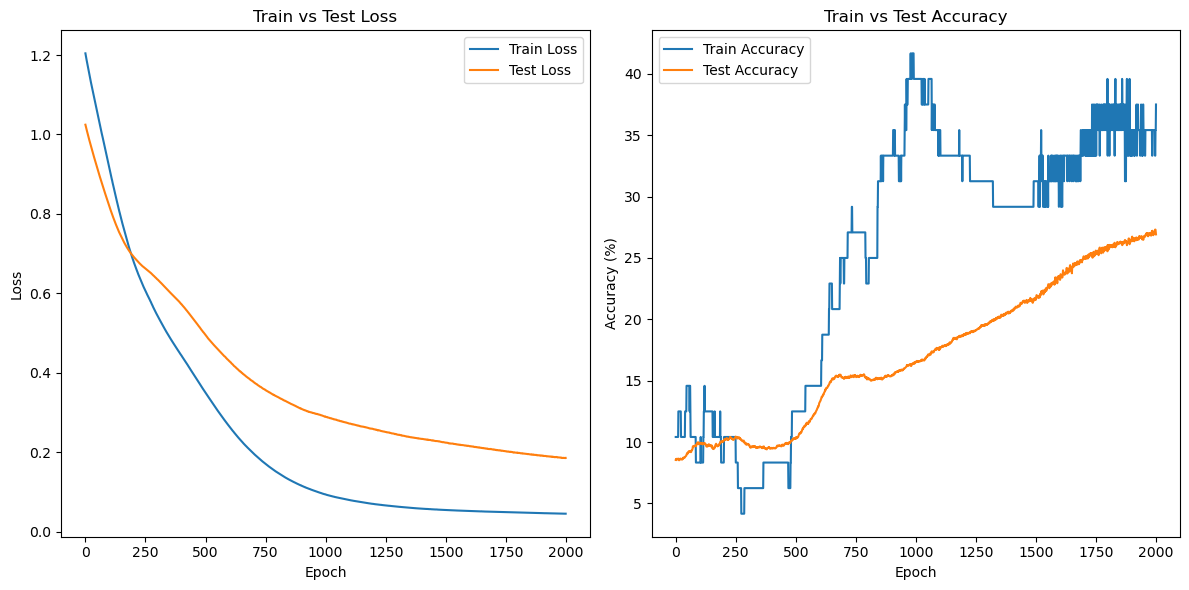

lr=0.0001, hidden_dim=16, batch_size=8, epochs=2000
Final Train Loss: 0.0453, Final Test Loss: 0.1855
Final Train Accuracy: 37.50%, Final Test Accuracy: 26.92%

Average Train Accuracy (last 100 epochs): 35.17%, Average Test Accuracy (last 100 epochs): 26.78%

net_outputs_test[0] [-1.9712131  -1.9111083  -1.8510036  ... -0.61757743 -0.6651462
 -0.71271545]


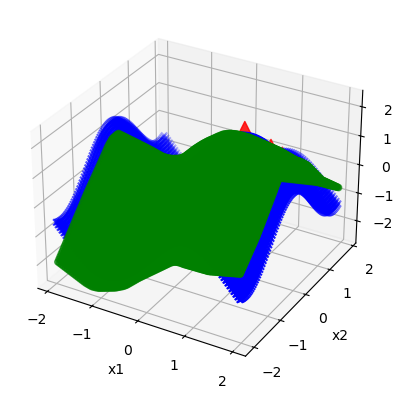

************************************************************************

**Running training with lr=0.001, hidden_dim=8, batch_size=8, epochs=2000


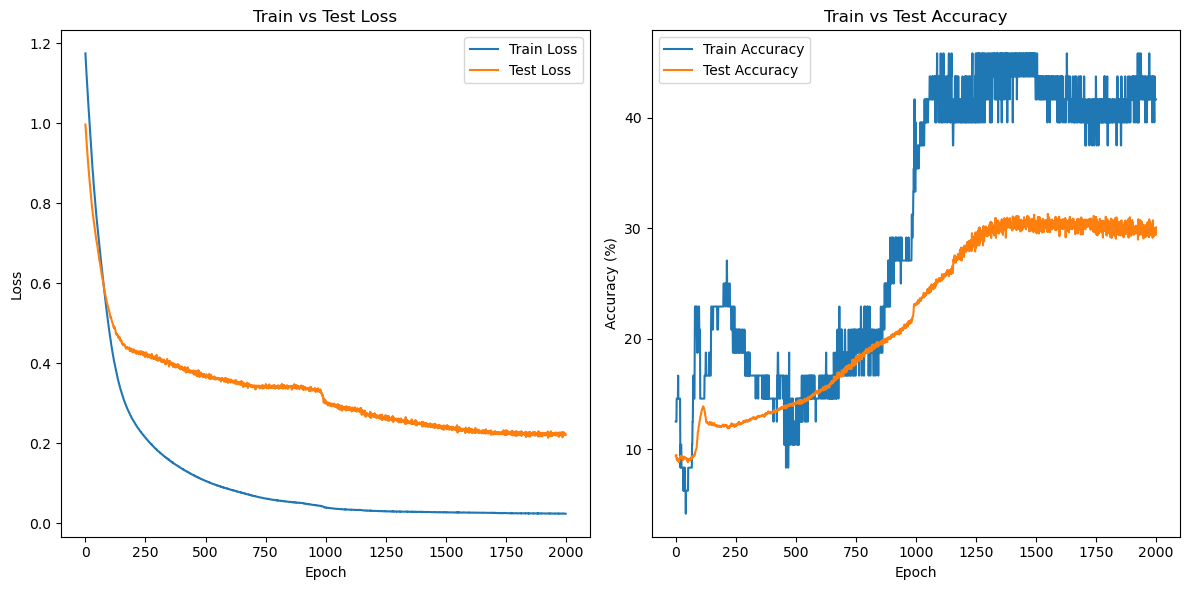

lr=0.001, hidden_dim=8, batch_size=8, epochs=2000
Final Train Loss: 0.0243, Final Test Loss: 0.2213
Final Train Accuracy: 41.67%, Final Test Accuracy: 30.08%

Average Train Accuracy (last 100 epochs): 42.21%, Average Test Accuracy (last 100 epochs): 29.86%

net_outputs_test[0] [-1.7423378 -1.6876196 -1.6329025 ... -1.071253  -1.1336929 -1.1961328]


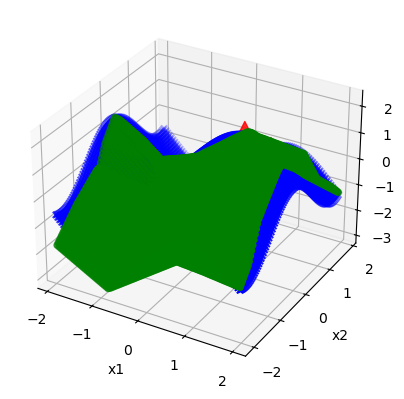

************************************************************************

**Running training with lr=0.001, hidden_dim=16, batch_size=8, epochs=2000


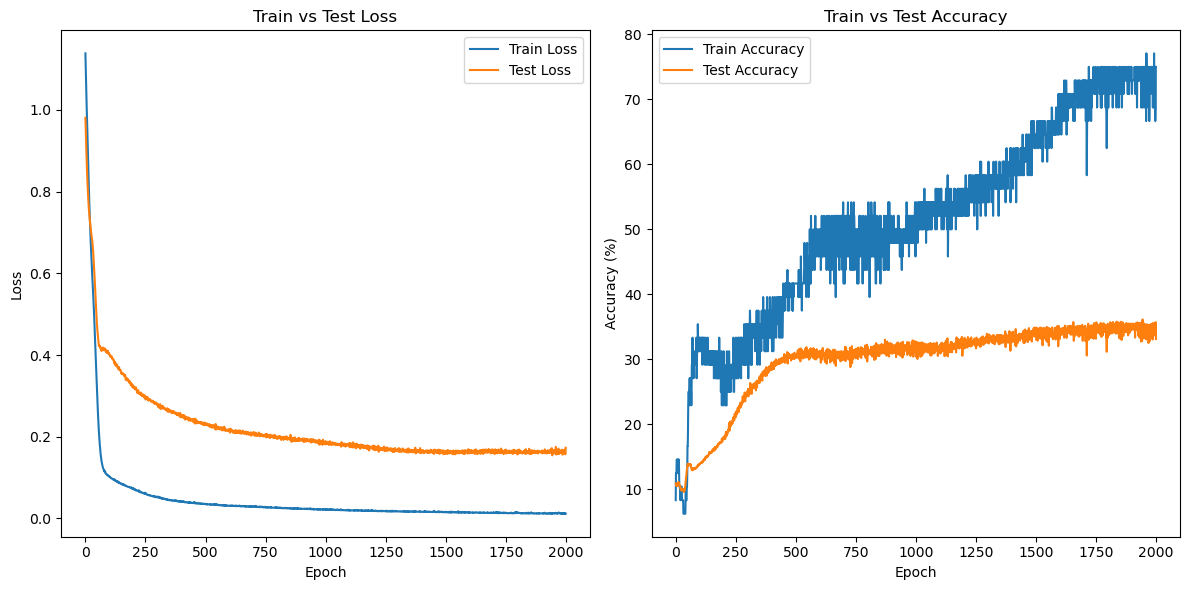

lr=0.001, hidden_dim=16, batch_size=8, epochs=2000
Final Train Loss: 0.0118, Final Test Loss: 0.1731
Final Train Accuracy: 75.00%, Final Test Accuracy: 33.13%

Average Train Accuracy (last 100 epochs): 72.90%, Average Test Accuracy (last 100 epochs): 34.62%

net_outputs_test[0] [-1.6765375 -1.6557137 -1.6348904 ... -1.4280506 -1.491511  -1.5549716]


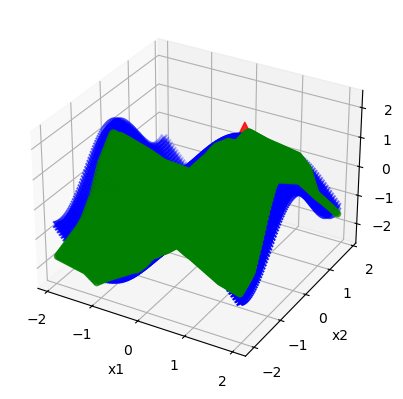

************************************************************************

**Running training with lr=0.001, hidden_dim=32, batch_size=8, epochs=2000


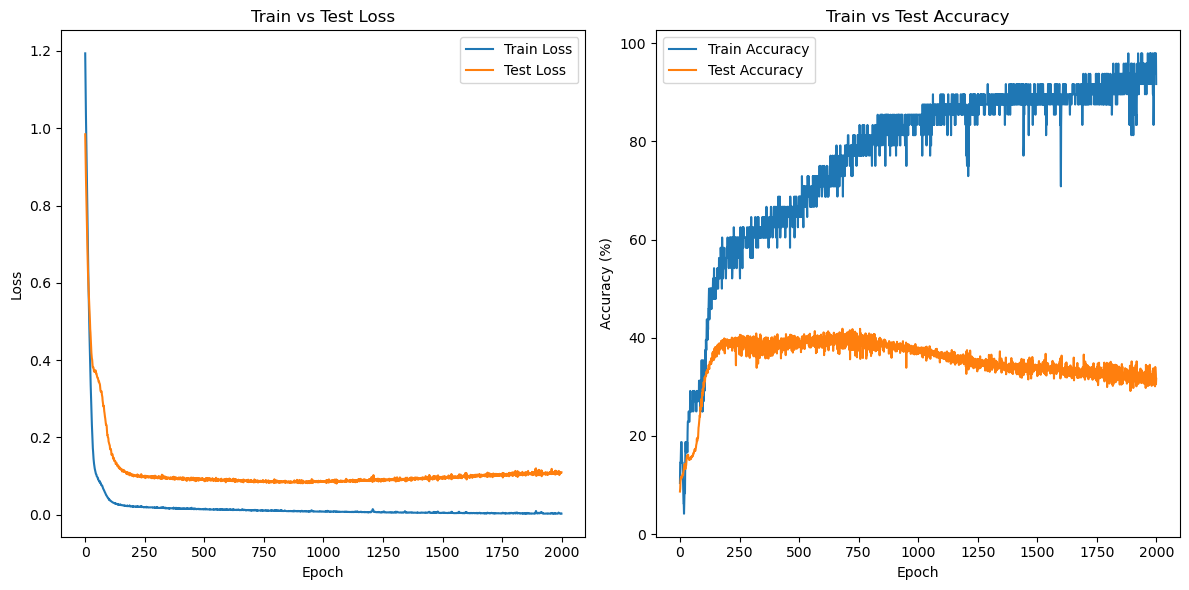

lr=0.001, hidden_dim=32, batch_size=8, epochs=2000
Final Train Loss: 0.0027, Final Test Loss: 0.1097
Final Train Accuracy: 91.67%, Final Test Accuracy: 31.64%

Average Train Accuracy (last 100 epochs): 92.71%, Average Test Accuracy (last 100 epochs): 32.14%

net_outputs_test[0] [-1.6788305 -1.6178076 -1.5621307 ... -1.5366005 -1.604181  -1.6717616]


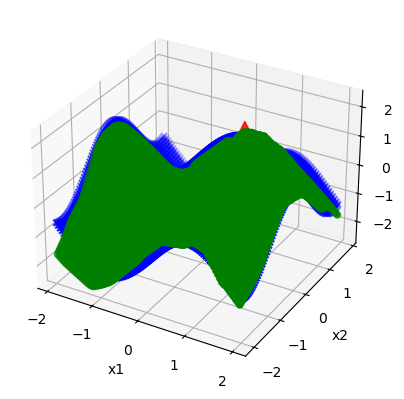

************************************************************************

**Running training with lr=0.001, hidden_dim=64, batch_size=8, epochs=2000


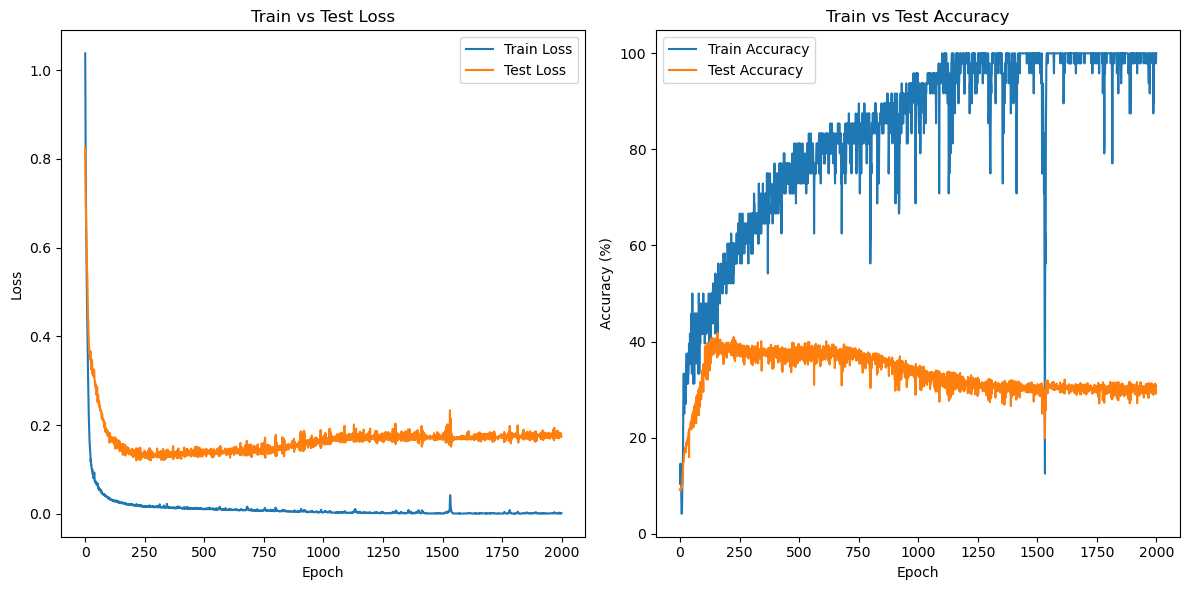

lr=0.001, hidden_dim=64, batch_size=8, epochs=2000
Final Train Loss: 0.0018, Final Test Loss: 0.1741
Final Train Accuracy: 100.00%, Final Test Accuracy: 30.75%

Average Train Accuracy (last 100 epochs): 99.08%, Average Test Accuracy (last 100 epochs): 30.08%

net_outputs_test[0] [-1.8214619  -1.7333168  -1.6451714  ... -0.87309635 -0.94833124
 -1.0235665 ]


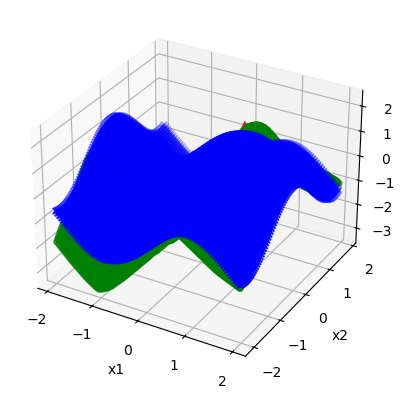

************************************************************************

**Running training with lr=0.001, hidden_dim=16, batch_size=4, epochs=2000


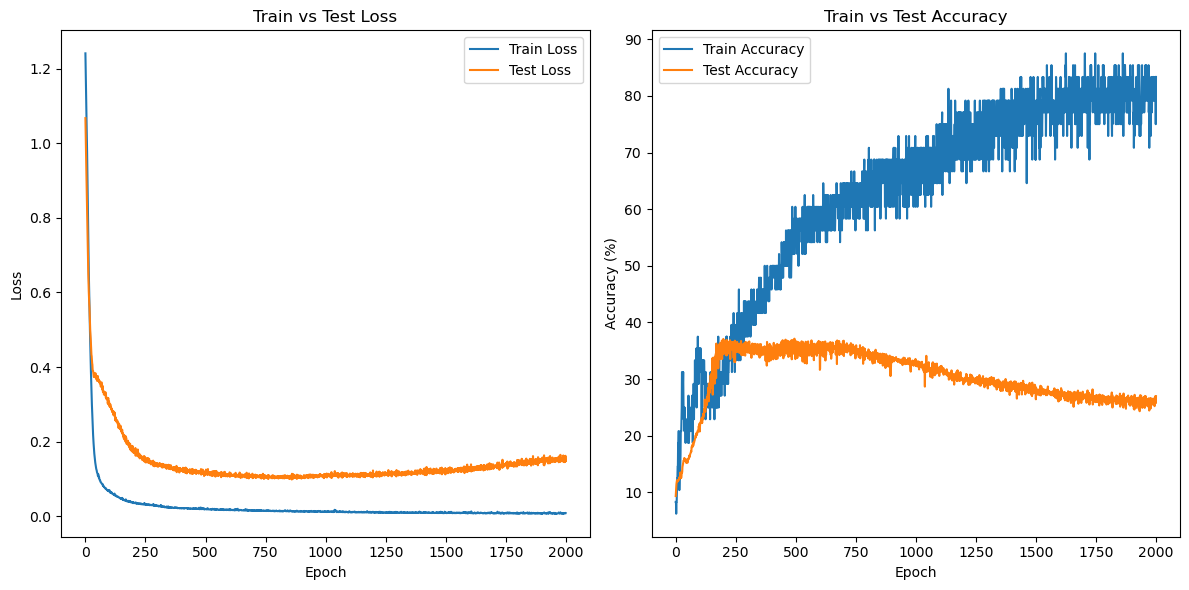

lr=0.001, hidden_dim=16, batch_size=4, epochs=2000
Final Train Loss: 0.0081, Final Test Loss: 0.1479
Final Train Accuracy: 83.33%, Final Test Accuracy: 26.97%

Average Train Accuracy (last 100 epochs): 79.96%, Average Test Accuracy (last 100 epochs): 26.00%

net_outputs_test[0] [-1.6113482 -1.5957272 -1.5801055 ... -1.8837557 -1.8275673 -1.7713786]


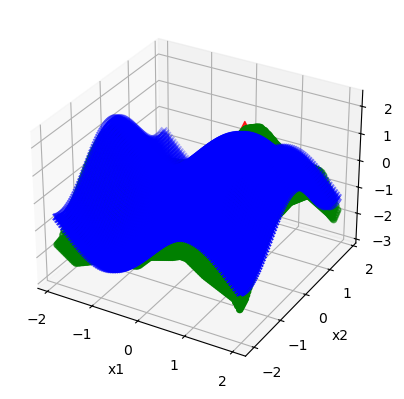

************************************************************************

**Running training with lr=0.001, hidden_dim=16, batch_size=8, epochs=2000


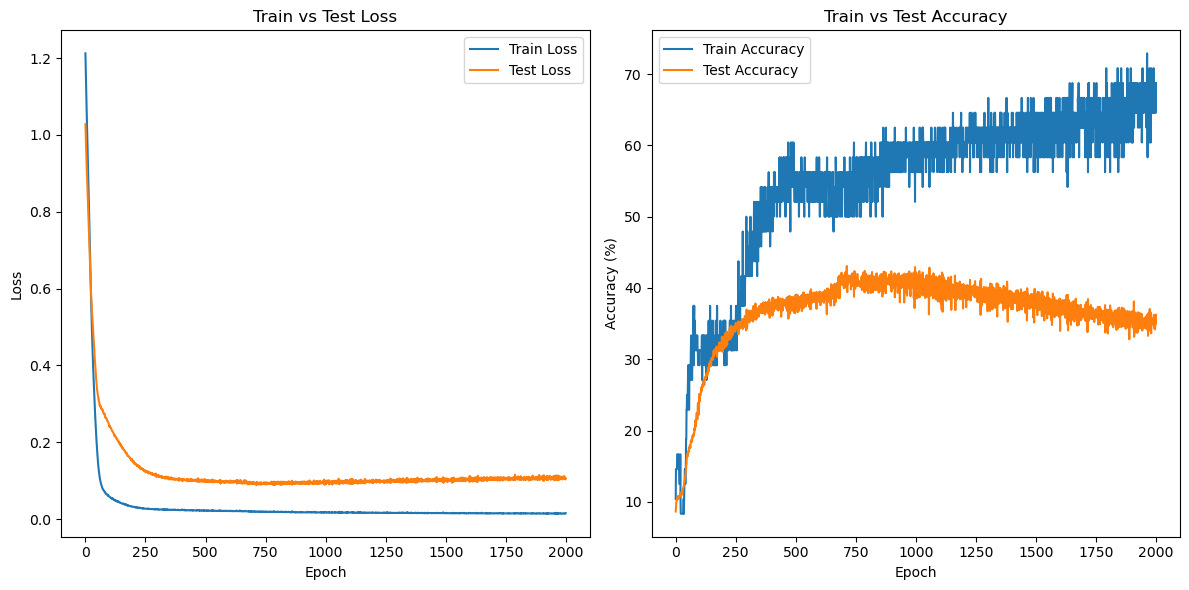

lr=0.001, hidden_dim=16, batch_size=8, epochs=2000
Final Train Loss: 0.0151, Final Test Loss: 0.1052
Final Train Accuracy: 68.75%, Final Test Accuracy: 35.04%

Average Train Accuracy (last 100 epochs): 66.02%, Average Test Accuracy (last 100 epochs): 35.36%

net_outputs_test[0] [-1.8172417 -1.7625988 -1.7079554 ... -1.4355468 -1.4792646 -1.5229821]


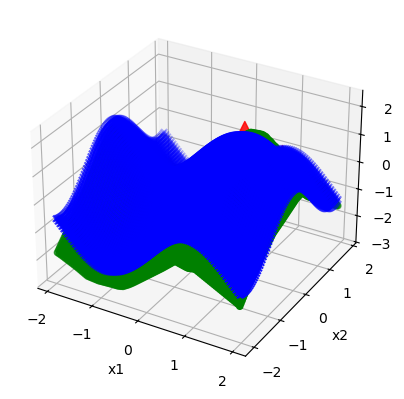

************************************************************************

**Running training with lr=0.001, hidden_dim=16, batch_size=16, epochs=2000


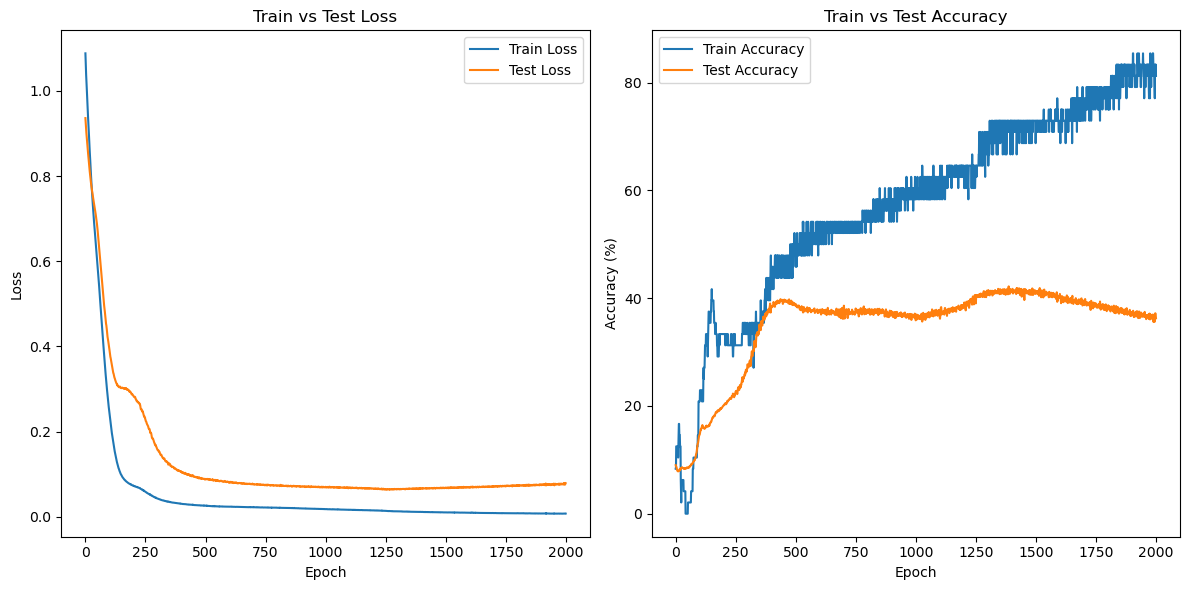

lr=0.001, hidden_dim=16, batch_size=16, epochs=2000
Final Train Loss: 0.0073, Final Test Loss: 0.0787
Final Train Accuracy: 81.25%, Final Test Accuracy: 36.26%

Average Train Accuracy (last 100 epochs): 82.06%, Average Test Accuracy (last 100 epochs): 36.80%

net_outputs_test[0] [-1.7872895 -1.7146561 -1.6420228 ... -1.7379798 -1.7819412 -1.8259015]


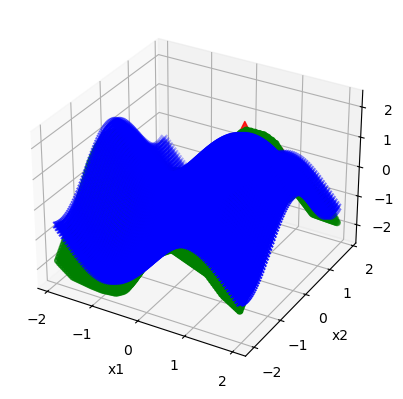

************************************************************************

**Running training with lr=0.001, hidden_dim=16, batch_size=32, epochs=2000


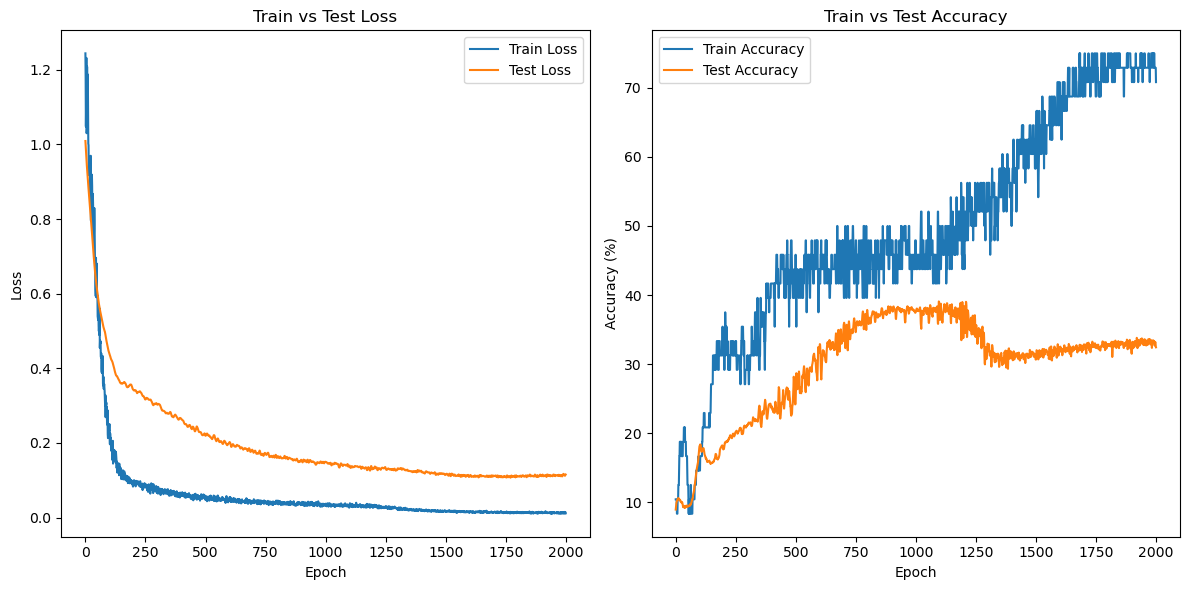

lr=0.001, hidden_dim=16, batch_size=32, epochs=2000
Final Train Loss: 0.0114, Final Test Loss: 0.1154
Final Train Accuracy: 70.83%, Final Test Accuracy: 32.43%

Average Train Accuracy (last 100 epochs): 73.27%, Average Test Accuracy (last 100 epochs): 33.10%

net_outputs_test[0] [-1.9140127 -1.8324022 -1.7507915 ... -1.0288568 -1.0700319 -1.1112067]


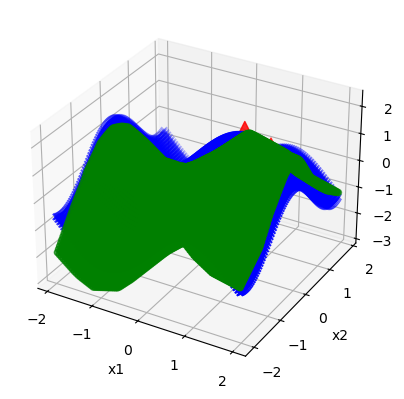

************************************************************************

**Running training with lr=0.001, hidden_dim=16, batch_size=8, epochs=1000


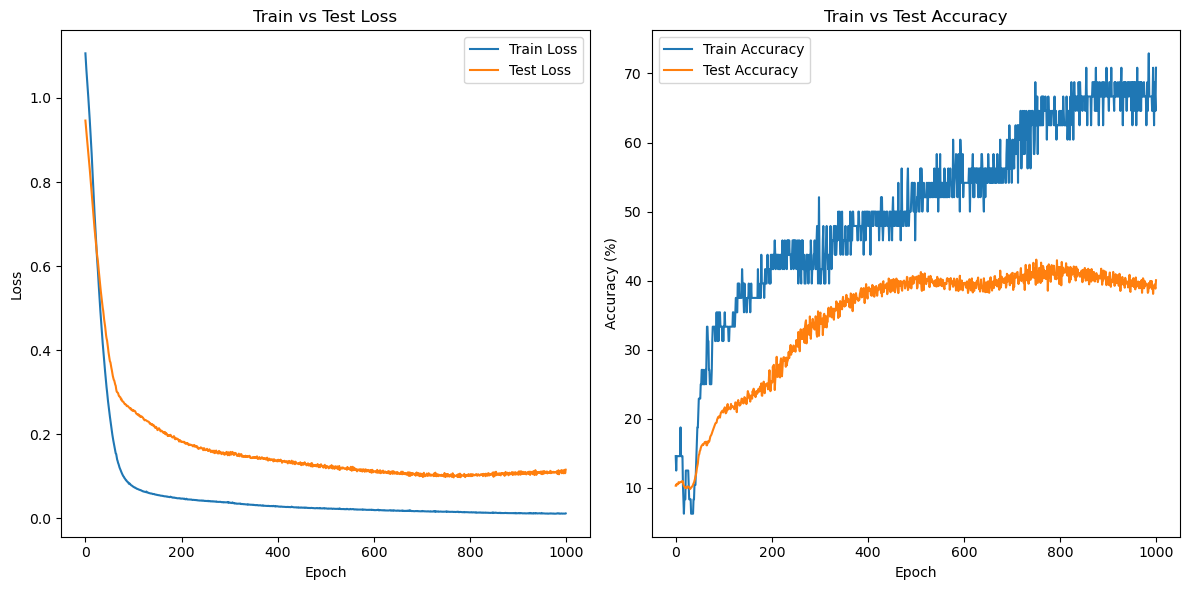

lr=0.001, hidden_dim=16, batch_size=8, epochs=1000
Final Train Loss: 0.0121, Final Test Loss: 0.1161
Final Train Accuracy: 70.83%, Final Test Accuracy: 40.06%

Average Train Accuracy (last 100 epochs): 67.06%, Average Test Accuracy (last 100 epochs): 39.62%

net_outputs_test[0] [-1.873601  -1.8039211 -1.7342411 ... -1.4544891 -1.5027751 -1.5510601]


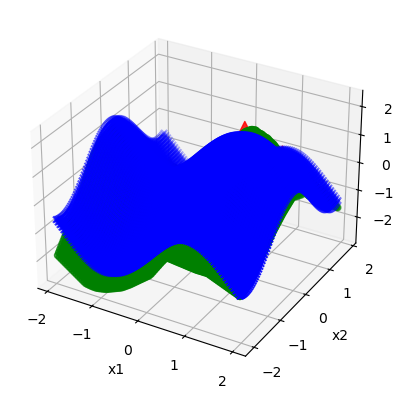

************************************************************************

**Running training with lr=0.001, hidden_dim=16, batch_size=8, epochs=2000


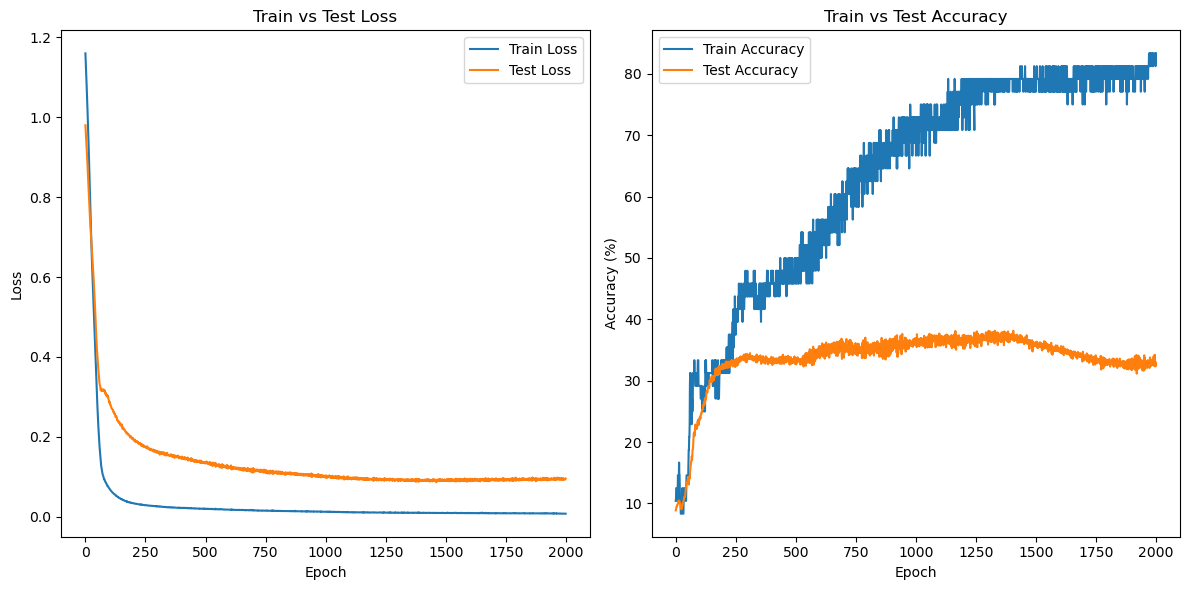

lr=0.001, hidden_dim=16, batch_size=8, epochs=2000
Final Train Loss: 0.0076, Final Test Loss: 0.0955
Final Train Accuracy: 83.33%, Final Test Accuracy: 32.51%

Average Train Accuracy (last 100 epochs): 80.94%, Average Test Accuracy (last 100 epochs): 32.78%

net_outputs_test[0] [-1.64485   -1.5979831 -1.5511162 ... -1.4537497 -1.502831  -1.5519116]


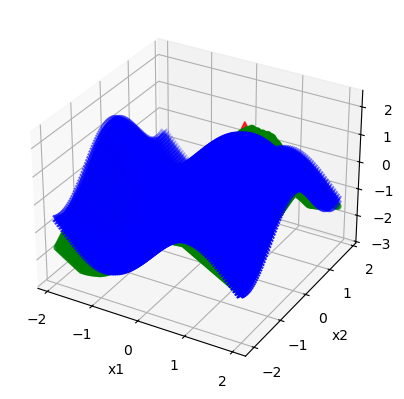

************************************************************************

**Running training with lr=0.001, hidden_dim=16, batch_size=8, epochs=3000


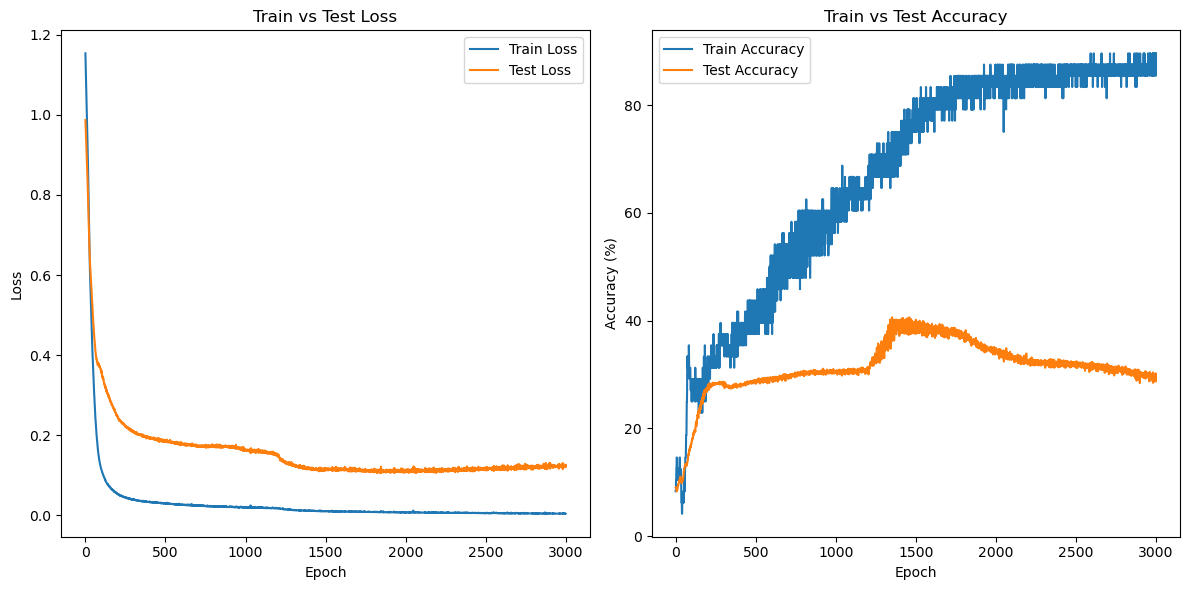

lr=0.001, hidden_dim=16, batch_size=8, epochs=3000
Final Train Loss: 0.0040, Final Test Loss: 0.1259
Final Train Accuracy: 89.58%, Final Test Accuracy: 28.75%

Average Train Accuracy (last 100 epochs): 87.29%, Average Test Accuracy (last 100 epochs): 29.78%

net_outputs_test[0] [-1.7365236 -1.7078443 -1.6791646 ... -2.1258986 -2.169856  -2.2102327]


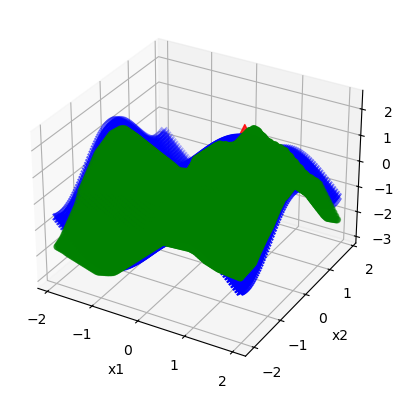

************************************************************************

### Summary Table ###
 learning_rate  hidden_dim  batch_size  epochs  final_train_loss  final_test_loss  final_train_accuracy  final_test_accuracy
        0.0200          16           8    2000            0.0033           0.2394               86.0208              24.9588
        0.0100          16           8    2000            0.0048           0.1461               86.8542              25.3657
        0.0050          16           8    2000            0.0076           0.1278               92.9167              29.5393
        0.0020          16           8    2000            0.0089           0.1366               80.0625              33.0295
        0.0010          16           8    2000            0.0099           0.1049               76.1875              34.2663
        0.0005          16           8    2000            0.0152           0.0967               62.9792              39.8930
        0.0001          16   

In [ ]:
###############################################Modified Code to 3D#########################################################
#############################3. different Hyperparameters new version with noise without normalization#####################################################
##### 保留原始代码，只修改部分代码，不覆盖

# Import matplotlib for plotting purposes
import matplotlib
matplotlib.rcParams["text.usetex"] = False
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Sometimes, we need Numpy, but wherever possible, we prefer torch.
import numpy as np

# Import PyTorch
import torch
import torch.nn as nn
from torch.utils.data import TensorDataset, DataLoader

# Float (32 bit) or Double (64 bit) precision? Choose!
torch.set_default_dtype(torch.float32)#64)
torch.set_num_threads(4) # Use _maximally_ 4 CPU cores

# This is a list to store the losses of the different hyperparameter configurations
train_losses_all = []
test_losses_all = []
models = []

# This is a list to store the hyperparameters of the training
# hyperparam_log = []

#device = torch.device("cpu")
# Choose a device for major calculations (if there is a special GPU card, you usually want that).

device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using {device} device")
device = torch.device(device)

# File path for saving the trained NN later.
# If only providing the file name (like here), the file will be generated in the same folder as the Python script
model_file = "mymodel.torch"

## The following script shows a data-driven training of a Neural Network.
## The data is generated in this script, too, by sampling from a function.
## The variables below are used to control this sampling
samples = 48
sample_min = -3
sample_max = 3
sample_span = sample_max - sample_min

## These parameters are usual hyperparameters of the NN and its training.
# batch_size = 8 # How many samples shall be presented to the NN, before running another optimizer step?
# hidden_dim = 16 # How many neurons shall there be in the hidden layer(s)?
input_dim = 2 # Input dimension of the NN (i.e. how many neurons are in the input layer?)
output_dim = 1 # Some for output

## Choose a criterion to evaluate the results. Here, we choose Mean Square error.
## The term "loss" means about the same as "remaining error" or "residual".
criterion = nn.MSELoss(reduction="mean")

## Here, we create the training data. In this example, we draw samples within the sampling interval and then pass it to
## e.g. the sin function (choose other functions to experiment with this script)
train_x = (sample_span * torch.rand(samples, 2) + sample_min * torch.ones(samples, 2))
train_y = torch.sin(train_x[:, 0]) + torch.cos(train_x[:, 1]) ##torch.pow(test_x, 2)

# add noise to the training data
noise_level = 0.2  # noise level
train_y += noise_level * torch.randn_like(train_y)

# To store summaries of each training run
summary_log = []

## This function logs the hyperparameters of the training
def log_hyperparameters(config, train_loss, test_loss, train_losses, train_accuracies, test_accuracies):
    hyperparam_log.append({
        "learning_rate": config["lr"],
        "hidden_dim": config["hidden_dim"],
        "batch_size": config["batch_size"],
        "epochs": config["epochs"],
        "final_train_loss": train_loss,
        "final_test_loss": test_loss,
        "final_train_accuracy": train_accuracies[-1],
        "final_test_accuracy": test_accuracies[-1],
        "train_losses": train_losses,
        "train_accuracies": train_accuracies,
        "test_accuracies": test_accuracies
    })


# print ("train_x", train_x)
# print ("train_y", train_y)

## Here, we create the test data. To show the effect of extrapolation and the detailed behavior of the NN,
## we choose points a bit outside the interval that we used for sampling training data. Also, we very dense points.
# test_x = torch.zeros(20*samples, 2)
# test_x[:, 0] = torch.linspace(sample_min - 0.5*sample_span, sample_max + 0.5*sample_span, test_x.size()[0])
# test_x[:, 1] = torch.linspace(sample_min - 0.5*sample_span, sample_max + 0.5*sample_span, test_x.size()[0])

# create test_x with meshgrid
grid_size = int(samples ** 0.5) * 2 
margin = 0.5  # only extend 1. from -5 to 5, extend to -5.5 to 5.5 
x1 = torch.linspace(sample_min - margin, sample_max + margin, 2*samples)
x2 = torch.linspace(sample_min - margin, sample_max + margin, 2*samples)
x1, x2 = torch.meshgrid(x1, x2) 
test_x = torch.zeros(2*samples*2*samples, 2)
test_x[:, 0] = x1.reshape(-1)
test_x[:, 1] = x2.reshape(-1)
test_y = torch.sin(test_x[:, 0]) + torch.cos(test_x[:, 1]) ##torch.pow(test_x, 2)

# standardize the data
scaler = StandardScaler()
train_x = torch.tensor(scaler.fit_transform(train_x), dtype=torch.float32)
test_x = torch.tensor(scaler.transform(test_x), dtype=torch.float32)

## We want a DataLoader to handle batching and shuffling of the training data for us.
## The DataLoader needs a TensorDataset, hence we create one from the Training data.
train_data = TensorDataset(train_x, train_y)

## This class creates the actual Neural Network.
class MLNet(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(MLNet, self).__init__()
        self.hidden_dim = hidden_dim

        ## In this case, I decided to pack the layers into a single container of type nn.Sequential
        ## This container is useful for Fully Connected NNs, where the output of each layer is just fed into the following layer.
        ## added dropout layer, which is a regularization technique to prevent overfitting
        self.fcnn1 = nn.Sequential(
            nn.Linear(input_dim, hidden_dim),
            #nn.Tanh(),
            nn.ReLU(),
            nn.Linear(hidden_dim, hidden_dim),
            nn.ReLU(),
            #nn.Linear(hidden_dim, hidden_dim),
            #nn.Dropout(p=0.1),  # Dropout layer with 30% of neurons being dropped，but it's not working well，the model underfitting, so change to 0.05
            #nn.ReLU(),
            nn.Linear(hidden_dim, output_dim),
        ) ## That network here has exactly 1 hidden layer (comment out some lines or write new ones to add more layers)
        ## nn.Linear is in the pictures represented by the arrows and has the weights (and biases) which are the
        ## parameters of the NN.
        ## nn.ReLU and Tanh are examples for activation functions - in the pictures, these are the bubbles / neurons.
        ## Usually, the pattern is interchanging between one linear layer, one activation function, one linear layer, one activation function and so on

    ## It is required to write a function that is executed when calling the NN model.
    ## Usually, it takes the input data and passes it through the layers.
    ## Here, it is sufficient to call the sequential container since this container does exactly this job.
    ## But this function "forward" could also be used to set up more complex NN architectures with more complex data flows
    def forward(self, x):
        out = self.fcnn1(x)
        return out

## This function performs a test run with the NN.
## It takes the NN model and the test data, passes the test inputs through the network and
## compares it with the target values = test outputs = targets
## and based on that calculates the loss value
def evaluate(model, test_x, test_y):
    ## For testing, we don't need the autograd feature/ protocol of all calculation steps
    ## So, save some time and disable grad tracking.
    with torch.no_grad():
        model.eval() ## Set the NN model into evaluation mode
        outputs = [] ## Create empty lists to store the results
        targets = []
        testlosses = []

        out = model(test_x.to(device)) ## Call the model, i.e. perform the actual inference

        ## Move the output quantities to the CPU, detach them from the tensor operation book-keeping and convert them to numpy arrays/ vectors.
        ## This is all necessary for plotting
        outputs.append(out.cpu().detach().numpy())
        targets.append(test_y.cpu().detach().numpy())
        testlosses.append(criterion(out, test_y.to(device)).item())

    ## Now return that in form of a triple of variables
    return outputs, targets, testlosses

## This calls the evaluate function and takes care of the plotting.
def eval_and_plot(model):
        ## matplotlib tries to be similar to the plot functions of matlab  (admittedly, the commands have to begin with "plt.", but the rest
        ## is quite similar.)

        # create a 3D plot
        fig = plt.figure()
        ax = fig.add_subplot(111, projection='3d')

        ## Call the network on the test data
        net_outputs_test, targets_test, testlosses = evaluate(model, test_x, test_y)   
        # Plot the targets first in blue (which means to plot the actual function over the whole test interval)
        #ax.plot(test_x[:, 0], test_x[:, 1], targets_test[0], color="-b", label="Target")
        ax.scatter(test_x[:, 0], test_x[:, 1], targets_test[0], c='b', marker='x', label='Target')
        ax.set_xlabel('x1')
        ax.set_ylabel('x2')
        ax.set_zlabel('y')

        ## Call the network on the training data
        net_outputs_train, targets_train, testlosses = evaluate(model, train_x, train_y)
        ## First, plot the targets in red, i.e. plot the training data set
        ax.scatter(train_x[:, 0], train_x[:, 1], targets_train[0], c='r', s=100, marker='^', label='Target')

        ## Now, plot the output of the NN on the whole test interval in green
        ## This allows us to see how the NN performs for interpolation as well as for extrapolation
        ax.scatter(test_x[:, 0], test_x[:, 1], net_outputs_test[0].reshape(-1), c='g', marker='o', label='Learned')
        print("net_outputs_test[0]", net_outputs_test[0].reshape(-1))

        ## All plotting is done, open the plot window
        plt.show()

def calculate_accuracy(predictions, targets, threshold = train_y.std().item() * 0.1):
    """
    Calculate accuracy for regression by checking if predictions are within a certain range of targets.
    Args:
        predictions: Predicted values (torch.Tensor).
        targets: Actual values (torch.Tensor).
        threshold: Acceptable error range for considering a prediction as correct.
    Returns:
        Accuracy as a percentage (float).
    """
    correct = torch.abs(predictions - targets) <= threshold
    return correct.float().mean().item() * 100  # Convert to percentage

def train_with_logging(lr_run, hidden_dim_run, batch_size_run, EPOCHS):
    # Create data loaders
    train_loader = DataLoader(train_data, shuffle=True, batch_size=batch_size_run, drop_last=False)

    model = MLNet(input_dim, hidden_dim_run, output_dim).to(device)
    optimizer = torch.optim.Adam(model.parameters(), lr=lr_run, weight_decay=0)

    train_losses = []
    test_losses = []
    train_accuracies = []
    test_accuracies = []

    for epoch in range(EPOCHS):
        model.train()
        avg_loss = 0.
        for x, label in train_loader:
            model.zero_grad()
            out = model(x.to(device)).squeeze(-1)
            loss = criterion(out, label.to(device))
            loss.backward()
            optimizer.step()
            avg_loss += loss.item()
        
        # Store train loss for the epoch
        train_losses.append(avg_loss / len(train_loader))

        # Evaluate train and test accuracy
        with torch.no_grad():
            model.eval()
            train_out = model(train_x.to(device)).squeeze(-1)
            train_accuracy = calculate_accuracy(train_out, train_y.to(device))
            train_accuracies.append(train_accuracy)

            test_out = model(test_x.to(device)).squeeze(-1)
            test_loss = criterion(test_out, test_y.to(device)).item()
            test_losses.append(test_loss)

            test_accuracy = calculate_accuracy(test_out, test_y.to(device))
            test_accuracies.append(test_accuracy)

        avg_final_train_acc = np.mean(train_accuracies[-100:]) if len(train_accuracies) >= 100 else train_accuracies[-1]
        avg_final_test_acc = np.mean(test_accuracies[-100:]) if len(test_accuracies) >= 100 else test_accuracies[-1]

    # Log final summary data
    summary_log.append({
        "learning_rate": lr_run,
        "hidden_dim": hidden_dim_run,
        "batch_size": batch_size,
        "epochs": EPOCHS,
        "final_train_loss": train_losses[-1],
        "final_test_loss": test_losses[-1],
        "final_train_accuracy": avg_final_train_acc,  # Approximate accuracy
        "final_test_accuracy": avg_final_test_acc,   # Approximate accuracy
    })

    return model, train_losses, test_losses, train_accuracies, test_accuracies, avg_final_train_acc, avg_final_test_acc



## As the functions written before are just function definitions,
## those functions still have to be called.
## This is done here.
## Train the model
# model = train(train_loader, lr, epochs)

## Test that saving the model worked: load it from file
# model = torch.load(model_file)
## and evaluate and plot once
# eval_and_plot(model)

###################### Hyperparameter Search Loop ######################
hyperparam_log = []  # reset hyperparam_log

hyperparam_configs = [
    # control variable: learning rate (lr) changes
    {"lr": 0.02,    "hidden_dim": 16, "batch_size": 8,  "epochs": 2000},
    {"lr": 0.01,    "hidden_dim": 16, "batch_size": 8,  "epochs": 2000},
    {"lr": 0.005,   "hidden_dim": 16, "batch_size": 8,  "epochs": 2000},
    {"lr": 0.002,   "hidden_dim": 16, "batch_size": 8,  "epochs": 2000},
    {"lr": 0.001,   "hidden_dim": 16, "batch_size": 8,  "epochs": 2000},
    {"lr": 0.0005,  "hidden_dim": 16, "batch_size": 8,  "epochs": 2000},
    {"lr": 0.0001,  "hidden_dim": 16, "batch_size": 8,  "epochs": 2000},

    # control variable: hidden dimension (hidden_dim) changes
    {"lr": 0.001,   "hidden_dim": 8,  "batch_size": 8,  "epochs": 2000},
    {"lr": 0.001,   "hidden_dim": 16, "batch_size": 8,  "epochs": 2000},
    {"lr": 0.001,   "hidden_dim": 32, "batch_size": 8,  "epochs": 2000},
    {"lr": 0.001,   "hidden_dim": 64, "batch_size": 8,  "epochs": 2000},

    # control variable: batch size (batch_size) changes
    {"lr": 0.001,   "hidden_dim": 16, "batch_size": 4,  "epochs": 2000},
    {"lr": 0.001,   "hidden_dim": 16, "batch_size": 8,  "epochs": 2000},
    {"lr": 0.001,   "hidden_dim": 16, "batch_size": 16, "epochs": 2000},
    {"lr": 0.001,   "hidden_dim": 16, "batch_size": 32, "epochs": 2000},

    # control variable: epochs changes
    {"lr": 0.001,   "hidden_dim": 16, "batch_size": 8,  "epochs": 1000},
    {"lr": 0.001,   "hidden_dim": 16, "batch_size": 8,  "epochs": 2000},
    {"lr": 0.001,   "hidden_dim": 16, "batch_size": 8,  "epochs": 3000},

]

for config in hyperparam_configs:
    lr_run          = config["lr"]
    hidden_dim_run  = config["hidden_dim"]
    batch_size_run  = config["batch_size"]
    epochs_run      = config["epochs"]

    print(f"\n**Running training with lr={lr_run}, hidden_dim={hidden_dim_run}, batch_size={batch_size_run}, epochs={epochs_run}")

    # Train the model with logging
    model, train_losses, test_losses, train_accuracies, test_accuracies, avg_train_accracy, avg_test_accuracy = train_with_logging(lr_run, hidden_dim_run, batch_size_run, epochs_run)

    # Plot the losses and accuracies
    plt.figure(figsize=(12, 6))
    
    # Loss plot
    plt.subplot(1, 2, 1)
    plt.plot(train_losses, label="Train Loss")
    plt.plot(test_losses, label="Test Loss")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.title("Train vs Test Loss")
    plt.legend()

    # Accuracy plot
    plt.subplot(1, 2, 2)
    plt.plot(train_accuracies, label="Train Accuracy")
    plt.plot(test_accuracies, label="Test Accuracy")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy (%)")
    plt.title("Train vs Test Accuracy")
    plt.legend()

    plt.tight_layout()
    plt.show()

    print(f"lr={lr_run}, hidden_dim={hidden_dim_run}, batch_size={batch_size_run}, epochs={epochs_run}")
    print(f"Final Train Loss: {train_losses[-1]:.4f}, Final Test Loss: {test_losses[-1]:.4f}")
    print(f"Final Train Accuracy: {train_accuracies[-1]:.2f}%, Final Test Accuracy: {test_accuracies[-1]:.2f}%\n")
    print(f"Average Train Accuracy (last 100 epochs): {avg_train_accracy:.2f}%, Average Test Accuracy (last 100 epochs): {avg_test_accuracy:.2f}%\n")

    eval_and_plot(model)  # plot the training results
    print("************************************************************************")

###################### Hyperparameter Search Loop ######################

# Print summary table
import pandas as pd

print("\n### with Noise without regularization Summary Table ###")
summary_df = pd.DataFrame(summary_log)
summary_df = summary_df.round(4)  # Round results for clarity
print(summary_df.to_string(index=False))  # Pretty print


Using cpu device

**Running training with lr=0.02, hidden_dim=16, batch_size=8, epochs=2000


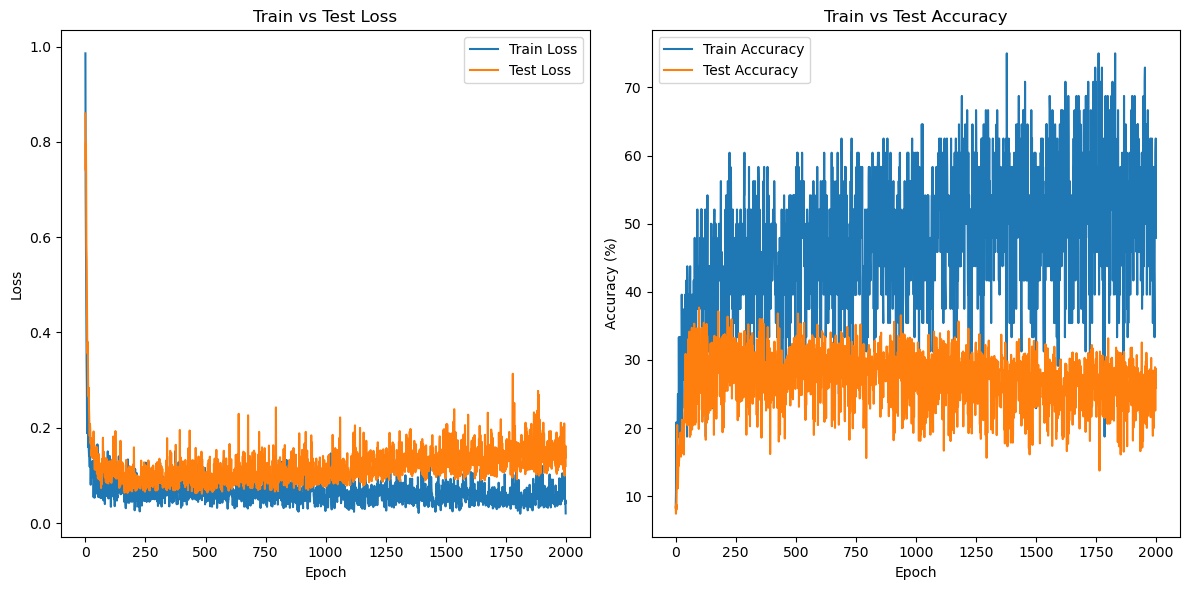

lr=0.02, hidden_dim=16, batch_size=8, epochs=2000
Final Train Loss: 0.0201, Final Test Loss: 0.1197
Final Train Accuracy: 47.92%, Final Test Accuracy: 25.93%

Average Train Accuracy (last 100 epochs): 53.17%, Average Test Accuracy (last 100 epochs): 25.43%

net_outputs_test[0] [-1.1548558 -1.0765296 -0.9982034 ... -1.2857063 -1.3241925 -1.362678 ]


/Users/chexuanyou/anaconda3/envs/myenv/lib/python3.11/site-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([9216])) that is different to the input size (torch.Size([9216, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/Users/chexuanyou/anaconda3/envs/myenv/lib/python3.11/site-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([48])) that is different to the input size (torch.Size([48, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


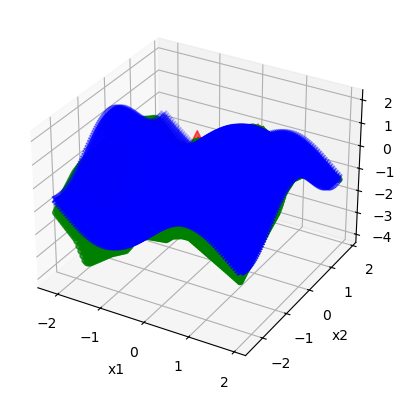

************************************************************************

**Running training with lr=0.01, hidden_dim=16, batch_size=8, epochs=2000


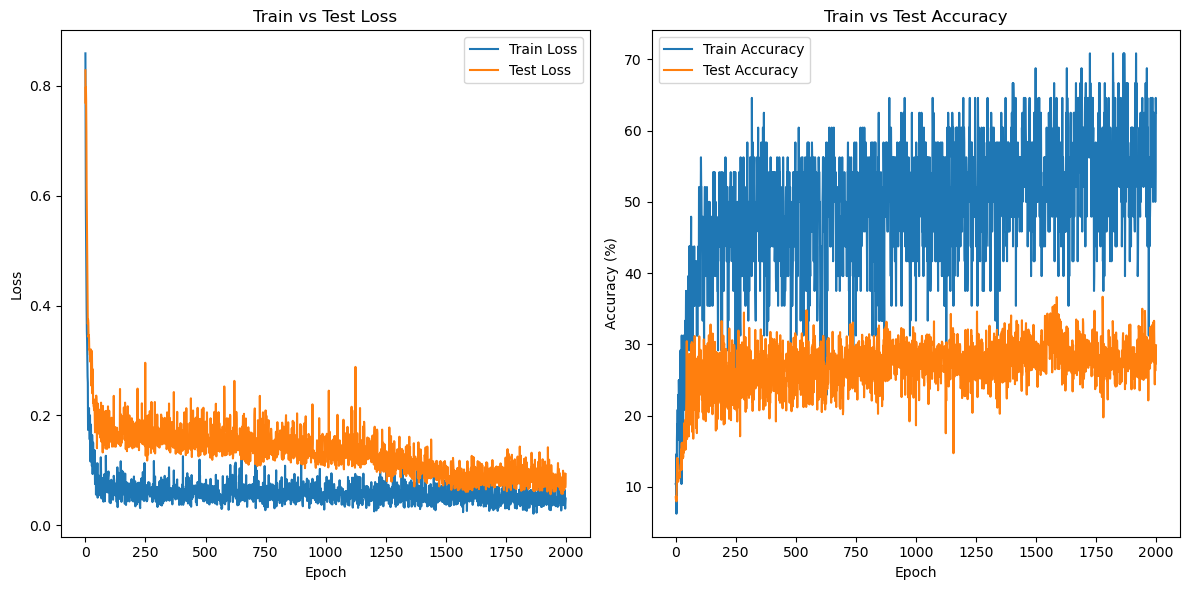

lr=0.01, hidden_dim=16, batch_size=8, epochs=2000
Final Train Loss: 0.0489, Final Test Loss: 0.0934
Final Train Accuracy: 62.50%, Final Test Accuracy: 29.87%

Average Train Accuracy (last 100 epochs): 55.81%, Average Test Accuracy (last 100 epochs): 28.40%

net_outputs_test[0] [-1.1970398 -1.1214964 -1.0494698 ... -1.8508133 -1.8972963 -1.9485778]


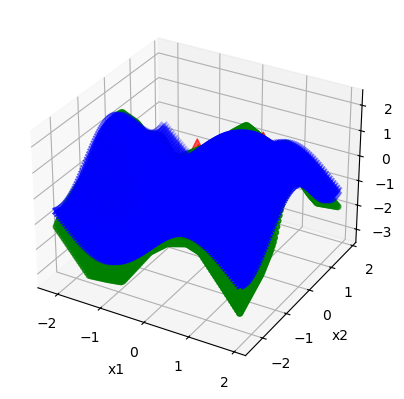

************************************************************************

**Running training with lr=0.005, hidden_dim=16, batch_size=8, epochs=2000


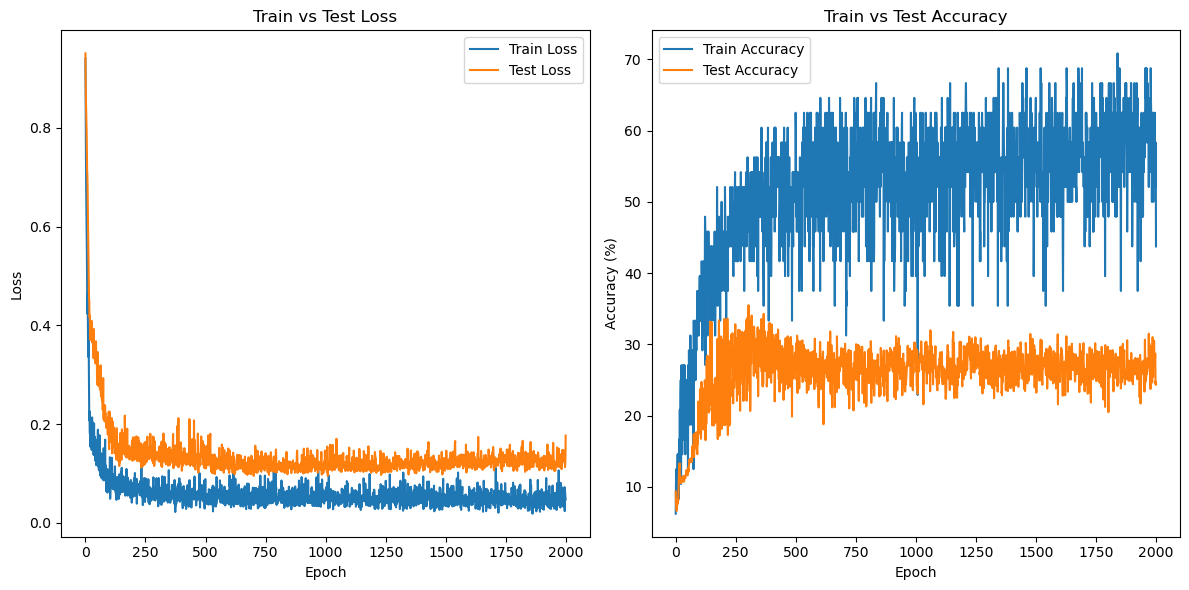

lr=0.005, hidden_dim=16, batch_size=8, epochs=2000
Final Train Loss: 0.0472, Final Test Loss: 0.1766
Final Train Accuracy: 43.75%, Final Test Accuracy: 24.37%

Average Train Accuracy (last 100 epochs): 58.40%, Average Test Accuracy (last 100 epochs): 26.78%

net_outputs_test[0] [-3.1203923  -3.0265126  -2.9326339  ... -0.4704348  -0.49331626
 -0.5161976 ]


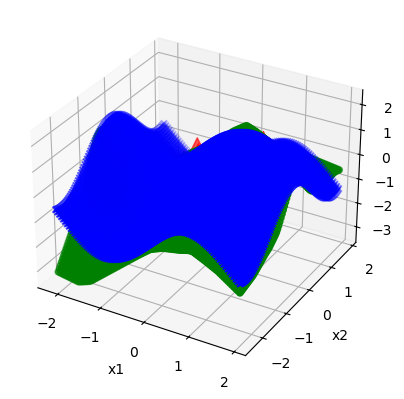

************************************************************************

**Running training with lr=0.002, hidden_dim=16, batch_size=8, epochs=2000


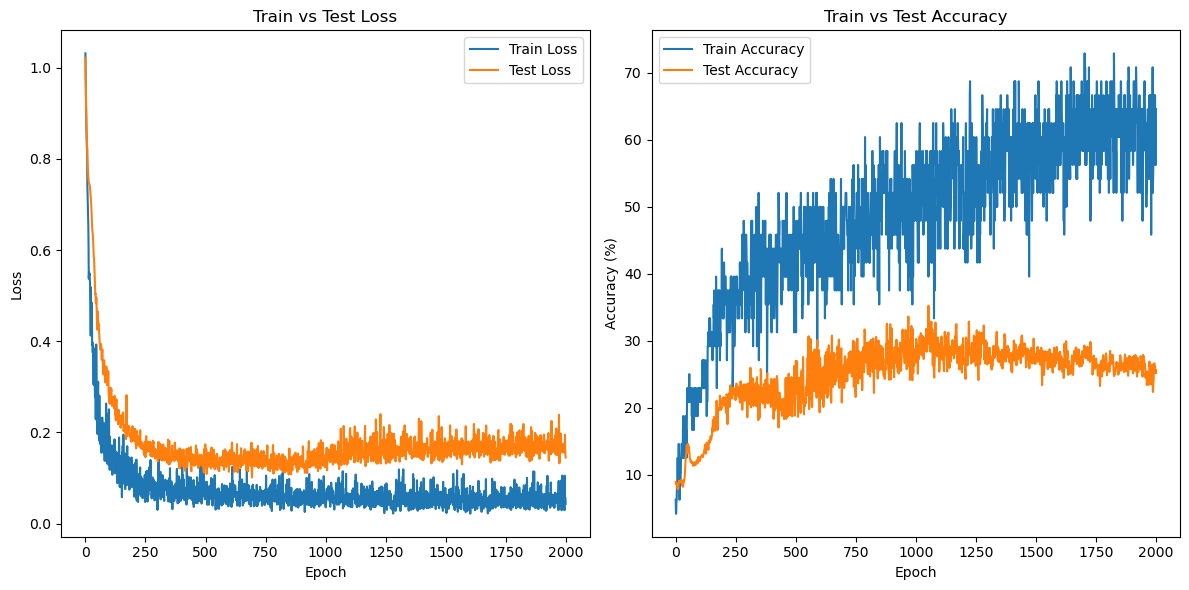

lr=0.002, hidden_dim=16, batch_size=8, epochs=2000
Final Train Loss: 0.0433, Final Test Loss: 0.1448
Final Train Accuracy: 64.58%, Final Test Accuracy: 25.17%

Average Train Accuracy (last 100 epochs): 60.83%, Average Test Accuracy (last 100 epochs): 25.75%

net_outputs_test[0] [-2.7521048  -2.6724544  -2.5928044  ... -0.4371817  -0.42650852
 -0.41583538]


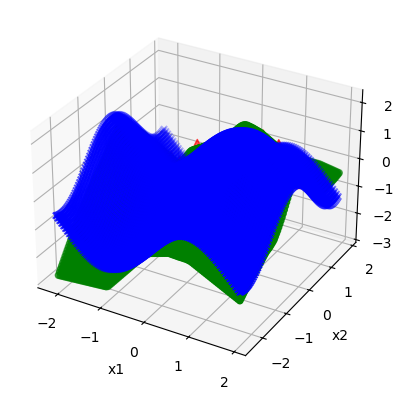

************************************************************************

**Running training with lr=0.001, hidden_dim=16, batch_size=8, epochs=2000


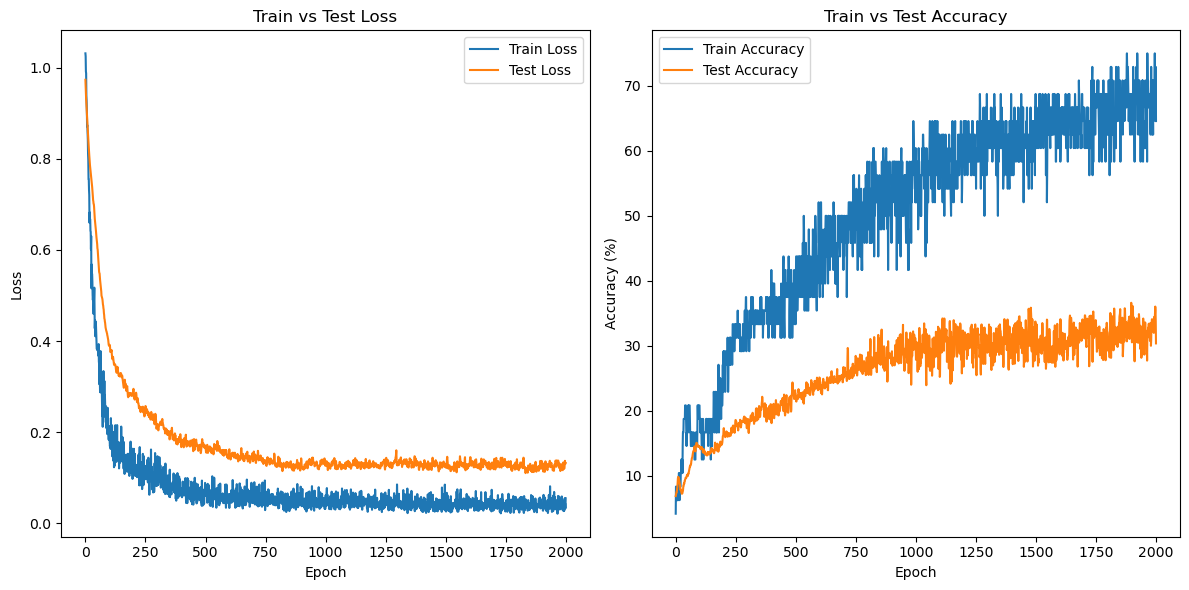

lr=0.001, hidden_dim=16, batch_size=8, epochs=2000
Final Train Loss: 0.0545, Final Test Loss: 0.1318
Final Train Accuracy: 64.58%, Final Test Accuracy: 30.37%

Average Train Accuracy (last 100 epochs): 66.81%, Average Test Accuracy (last 100 epochs): 32.31%

net_outputs_test[0] [-2.7624412 -2.6919448 -2.6214488 ... -1.7400839 -1.784793  -1.829502 ]


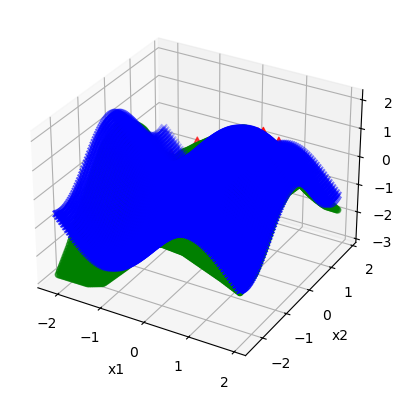

************************************************************************

**Running training with lr=0.0005, hidden_dim=16, batch_size=8, epochs=2000


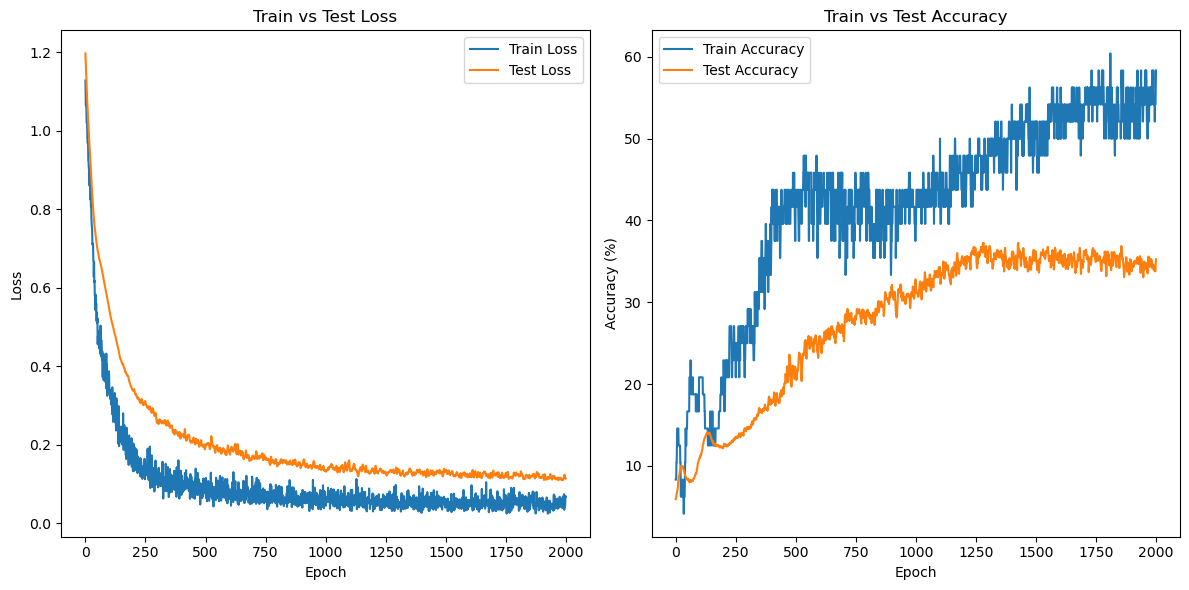

lr=0.0005, hidden_dim=16, batch_size=8, epochs=2000
Final Train Loss: 0.0676, Final Test Loss: 0.1138
Final Train Accuracy: 58.33%, Final Test Accuracy: 35.26%

Average Train Accuracy (last 100 epochs): 54.23%, Average Test Accuracy (last 100 epochs): 34.67%

net_outputs_test[0] [-2.304658   -2.2375605  -2.170463   ... -0.6870824  -0.7052331
 -0.72338367]


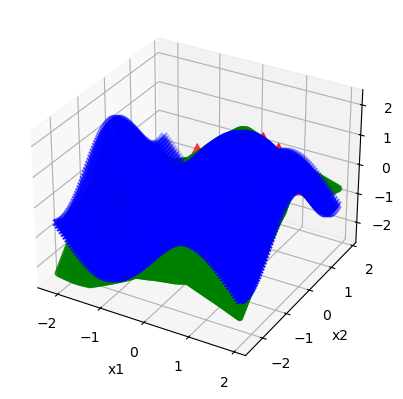

************************************************************************

**Running training with lr=0.0001, hidden_dim=16, batch_size=8, epochs=2000


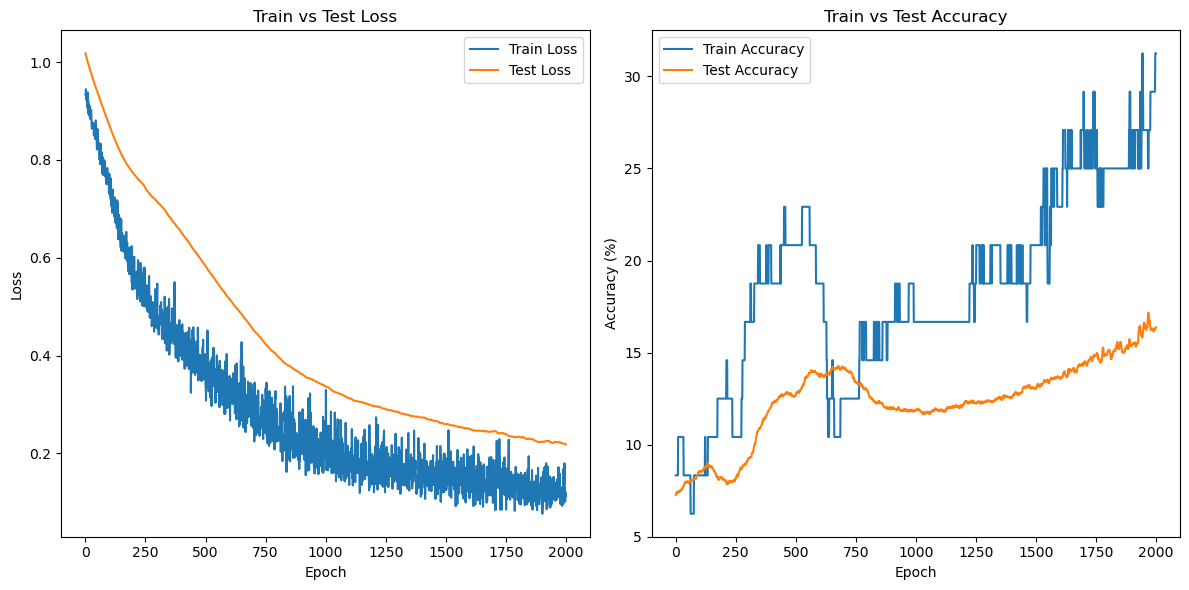

lr=0.0001, hidden_dim=16, batch_size=8, epochs=2000
Final Train Loss: 0.1134, Final Test Loss: 0.2186
Final Train Accuracy: 31.25%, Final Test Accuracy: 16.37%

Average Train Accuracy (last 100 epochs): 27.44%, Average Test Accuracy (last 100 epochs): 16.12%

net_outputs_test[0] [-2.215629   -2.1800194  -2.1444097  ... -0.88246083 -0.91545796
 -0.9511032 ]


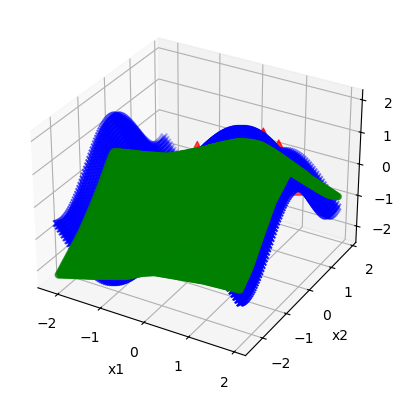

************************************************************************

**Running training with lr=0.001, hidden_dim=8, batch_size=8, epochs=2000


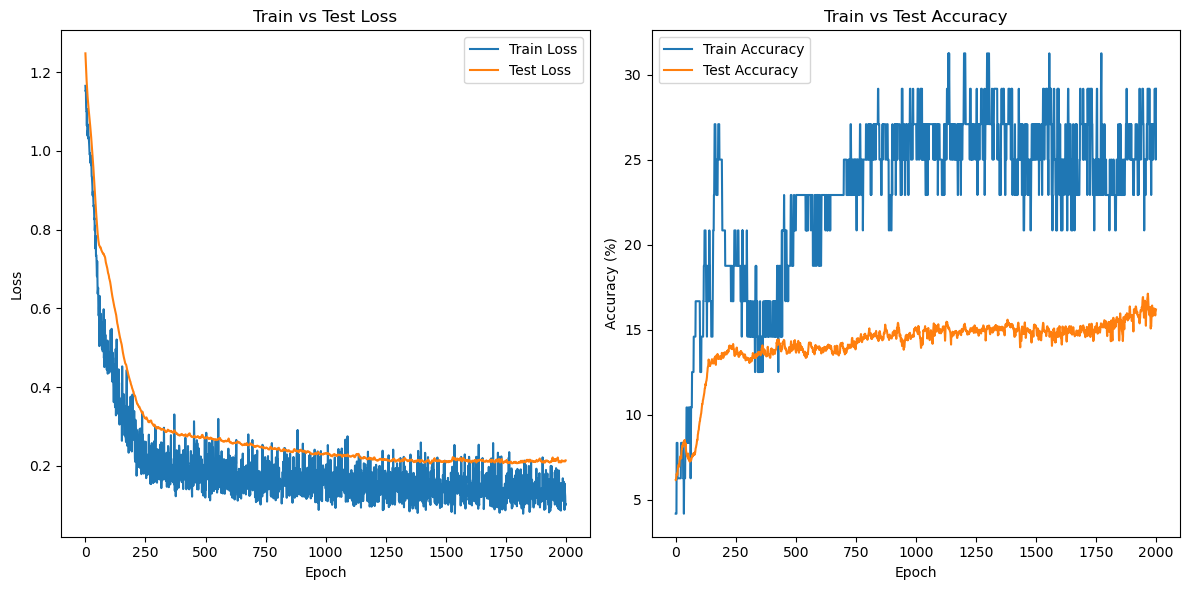

lr=0.001, hidden_dim=8, batch_size=8, epochs=2000
Final Train Loss: 0.1021, Final Test Loss: 0.2137
Final Train Accuracy: 29.17%, Final Test Accuracy: 16.18%

Average Train Accuracy (last 100 epochs): 26.15%, Average Test Accuracy (last 100 epochs): 16.05%

net_outputs_test[0] [-1.998174   -1.9372938  -1.8764137  ...  0.07744764  0.07744764
  0.06311832]


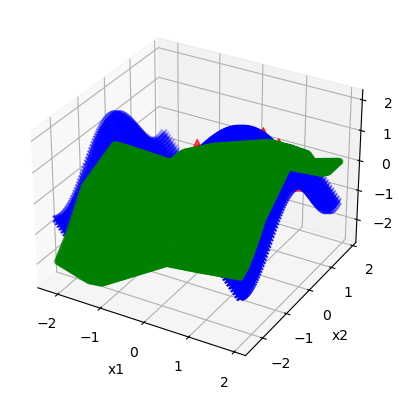

************************************************************************

**Running training with lr=0.001, hidden_dim=16, batch_size=8, epochs=2000


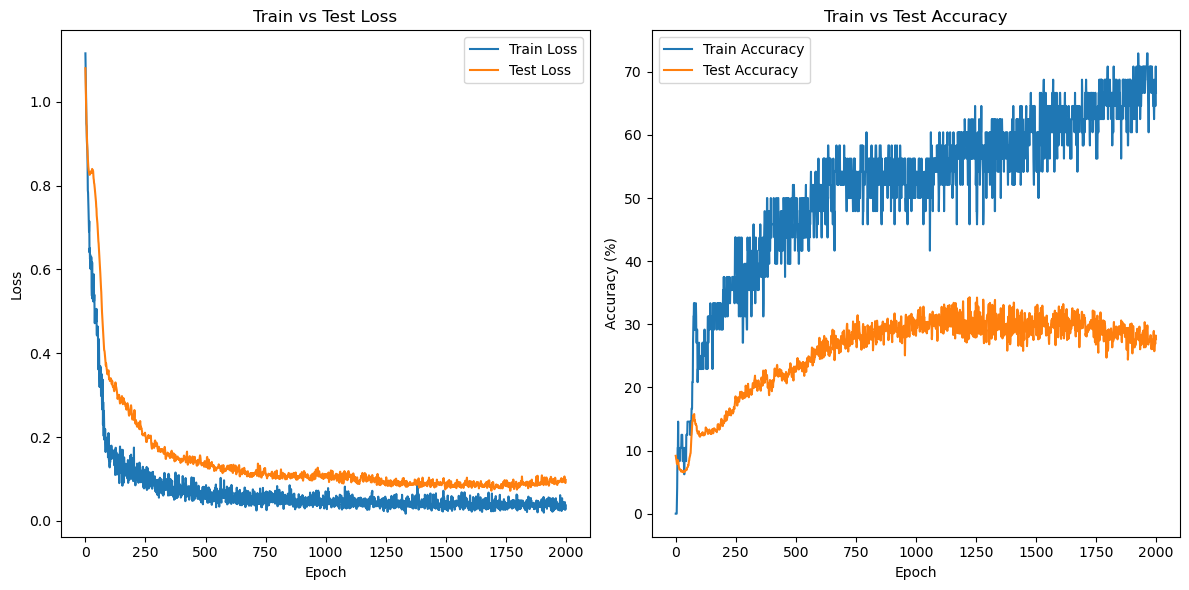

lr=0.001, hidden_dim=16, batch_size=8, epochs=2000
Final Train Loss: 0.0372, Final Test Loss: 0.0979
Final Train Accuracy: 66.67%, Final Test Accuracy: 27.66%

Average Train Accuracy (last 100 epochs): 67.79%, Average Test Accuracy (last 100 epochs): 27.69%

net_outputs_test[0] [-1.7695572 -1.6734124 -1.5772678 ... -1.972478  -2.0270782 -2.0807226]


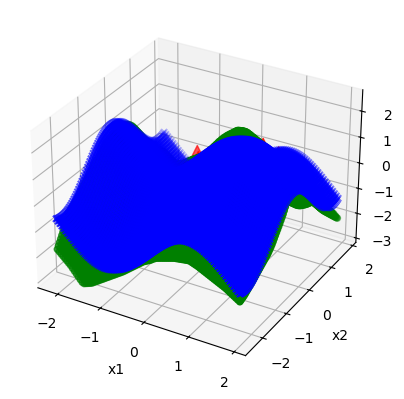

************************************************************************

**Running training with lr=0.001, hidden_dim=32, batch_size=8, epochs=2000


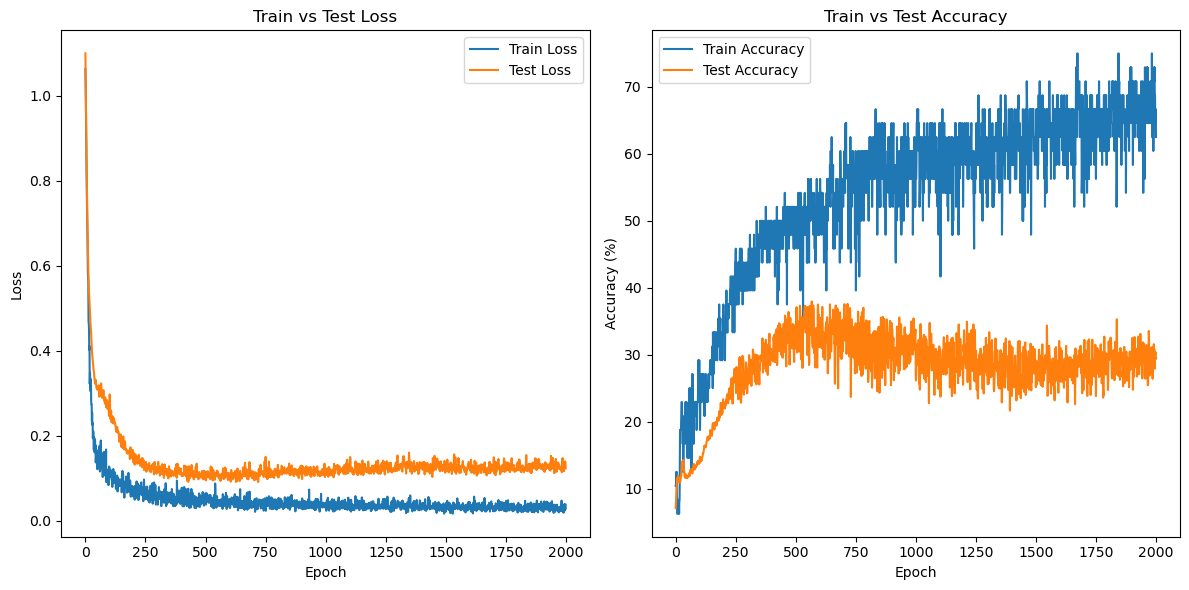

lr=0.001, hidden_dim=32, batch_size=8, epochs=2000
Final Train Loss: 0.0384, Final Test Loss: 0.1240
Final Train Accuracy: 62.50%, Final Test Accuracy: 29.41%

Average Train Accuracy (last 100 epochs): 66.73%, Average Test Accuracy (last 100 epochs): 29.53%

net_outputs_test[0] [-2.9796999  -2.920766   -2.8391361  ... -0.8740967  -0.8850449
 -0.89793354]


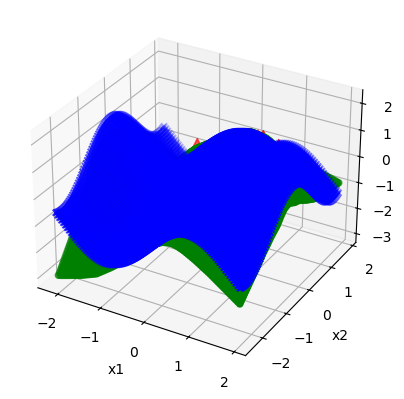

************************************************************************

**Running training with lr=0.001, hidden_dim=64, batch_size=8, epochs=2000


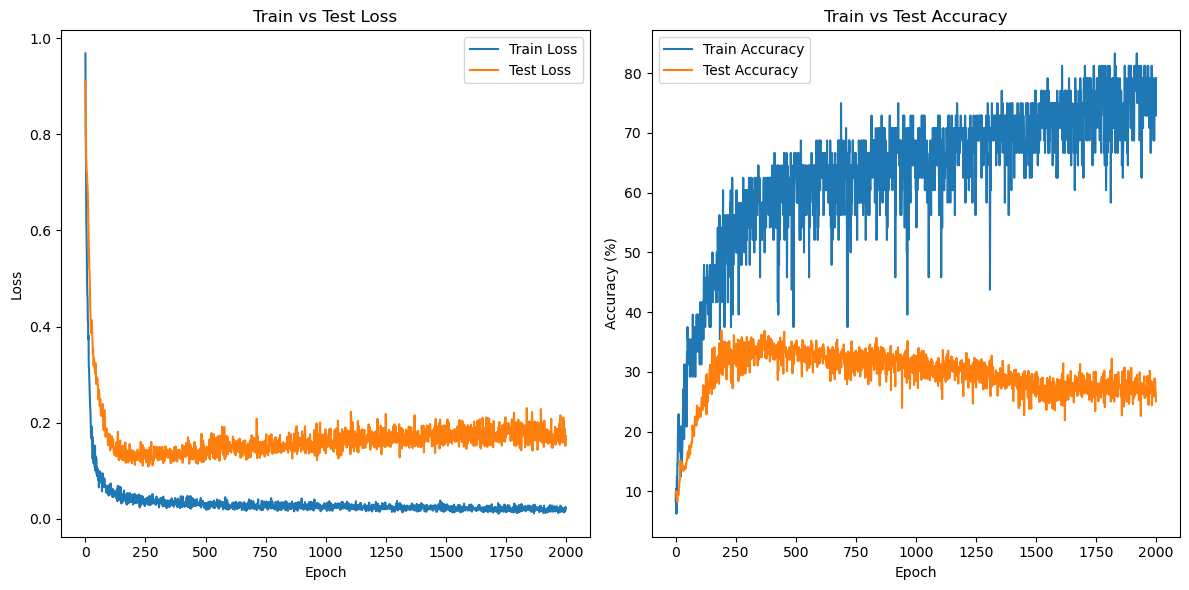

lr=0.001, hidden_dim=64, batch_size=8, epochs=2000
Final Train Loss: 0.0220, Final Test Loss: 0.1722
Final Train Accuracy: 79.17%, Final Test Accuracy: 25.08%

Average Train Accuracy (last 100 epochs): 76.23%, Average Test Accuracy (last 100 epochs): 27.23%

net_outputs_test[0] [-2.9442377 -2.8591359 -2.7740345 ... -1.4945258 -1.5210724 -1.5476189]


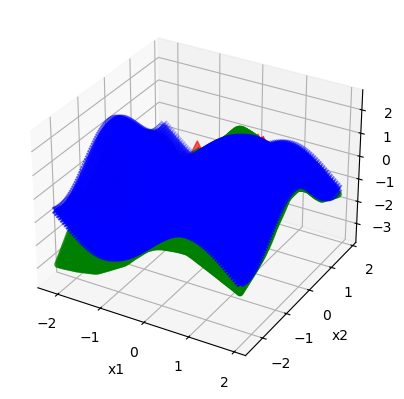

************************************************************************

**Running training with lr=0.001, hidden_dim=16, batch_size=4, epochs=2000


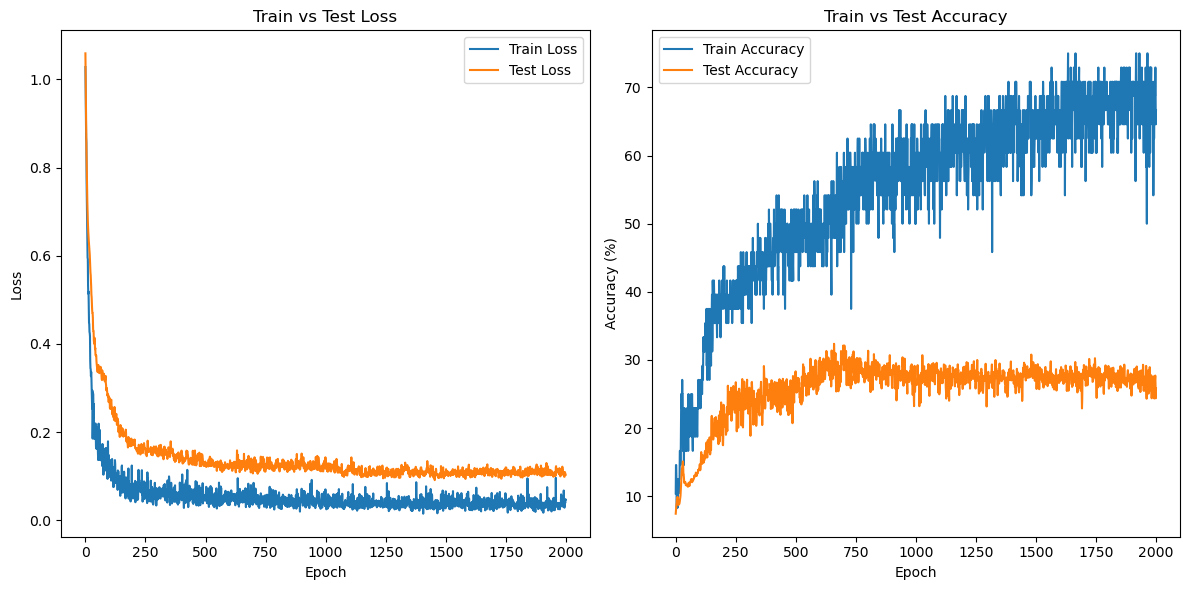

lr=0.001, hidden_dim=16, batch_size=4, epochs=2000
Final Train Loss: 0.0469, Final Test Loss: 0.1034
Final Train Accuracy: 66.67%, Final Test Accuracy: 25.84%

Average Train Accuracy (last 100 epochs): 67.75%, Average Test Accuracy (last 100 epochs): 26.90%

net_outputs_test[0] [-2.5326421 -2.4565194 -2.3803968 ... -1.3927017 -1.4205388 -1.4483759]


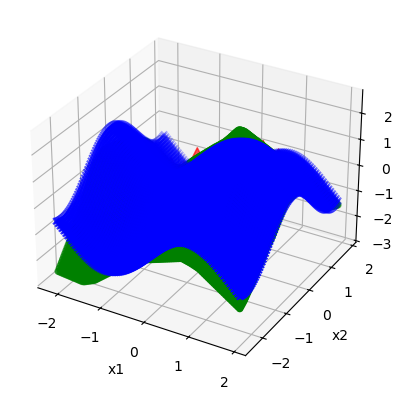

************************************************************************

**Running training with lr=0.001, hidden_dim=16, batch_size=8, epochs=2000


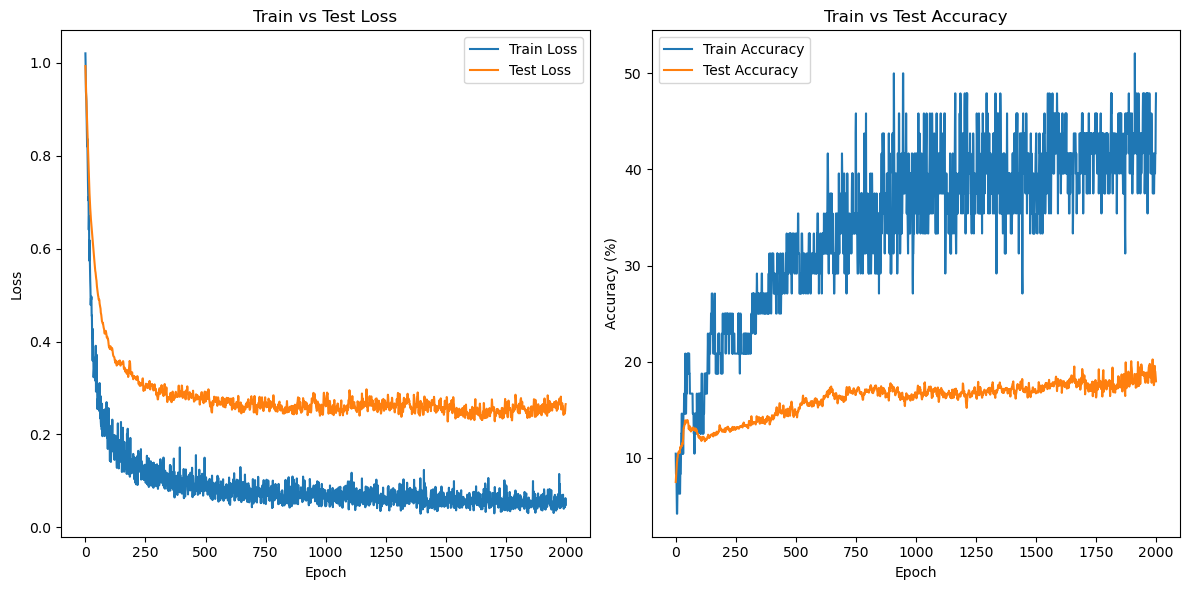

lr=0.001, hidden_dim=16, batch_size=8, epochs=2000
Final Train Loss: 0.0485, Final Test Loss: 0.2653
Final Train Accuracy: 47.92%, Final Test Accuracy: 17.95%

Average Train Accuracy (last 100 epochs): 42.85%, Average Test Accuracy (last 100 epochs): 18.52%

net_outputs_test[0] [-3.0045235 -2.927554  -2.8505845 ... -1.4051713 -1.4530743 -1.5009769]


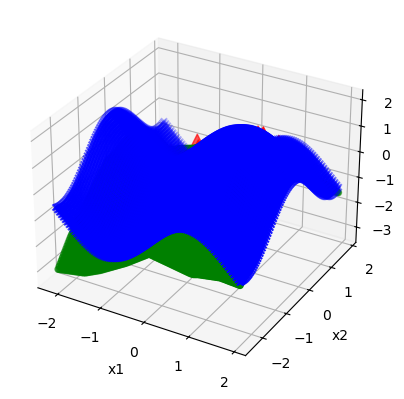

************************************************************************

**Running training with lr=0.001, hidden_dim=16, batch_size=16, epochs=2000


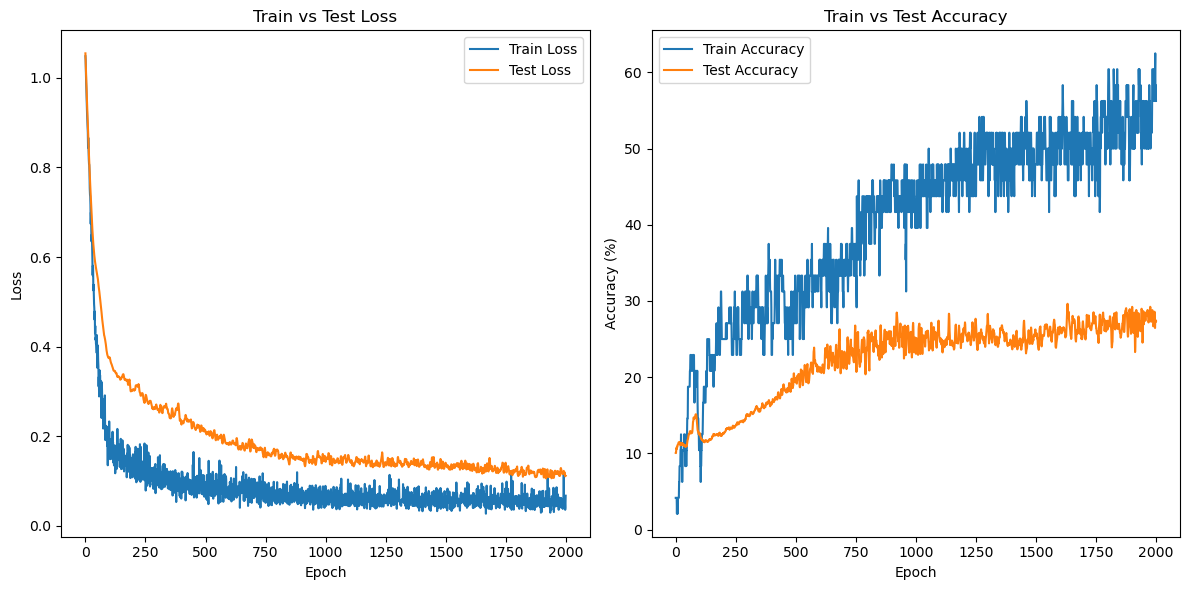

lr=0.001, hidden_dim=16, batch_size=16, epochs=2000
Final Train Loss: 0.0672, Final Test Loss: 0.1116
Final Train Accuracy: 56.25%, Final Test Accuracy: 27.31%

Average Train Accuracy (last 100 epochs): 54.37%, Average Test Accuracy (last 100 epochs): 27.56%

net_outputs_test[0] [-2.4040468 -2.3532717 -2.3024955 ... -1.2316065 -1.265499  -1.2993916]


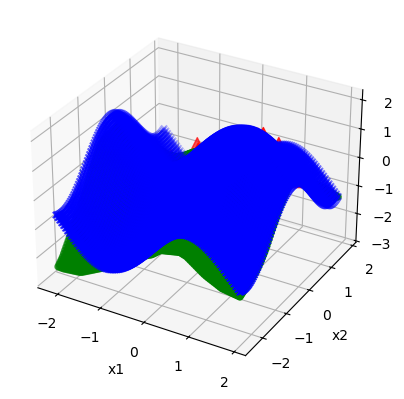

************************************************************************

**Running training with lr=0.001, hidden_dim=16, batch_size=32, epochs=2000


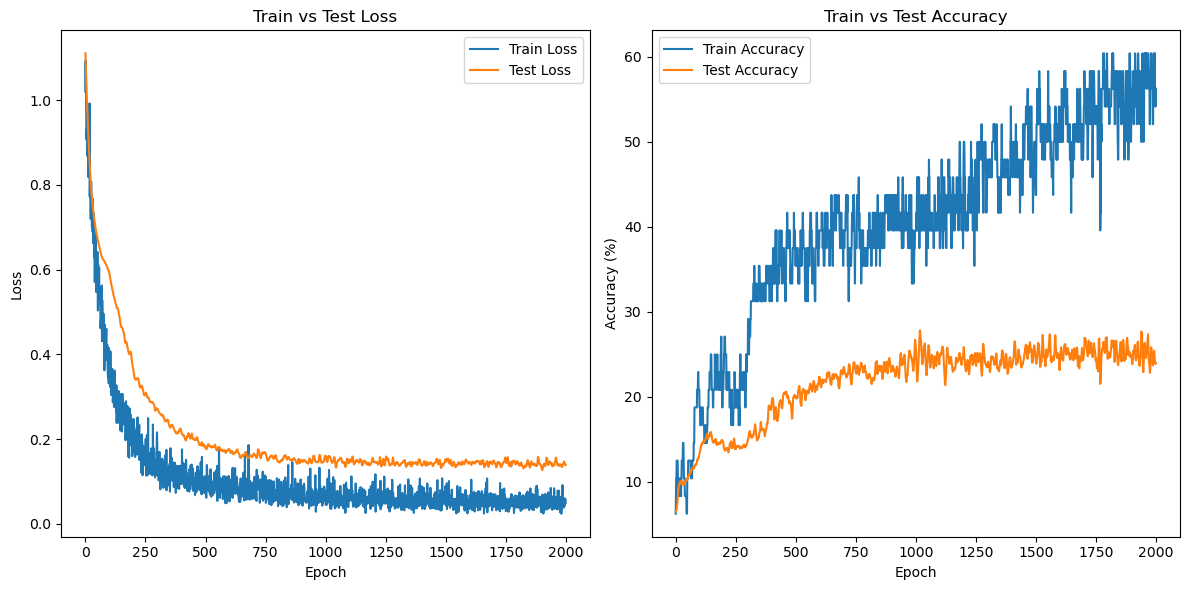

lr=0.001, hidden_dim=16, batch_size=32, epochs=2000
Final Train Loss: 0.0492, Final Test Loss: 0.1391
Final Train Accuracy: 56.25%, Final Test Accuracy: 23.96%

Average Train Accuracy (last 100 epochs): 56.50%, Average Test Accuracy (last 100 epochs): 25.01%

net_outputs_test[0] [-2.7901716  -2.7145522  -2.6389332  ... -0.55074847 -0.5729994
 -0.5952503 ]


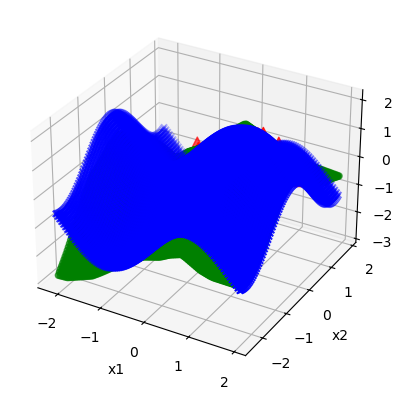

************************************************************************

**Running training with lr=0.001, hidden_dim=16, batch_size=8, epochs=1000


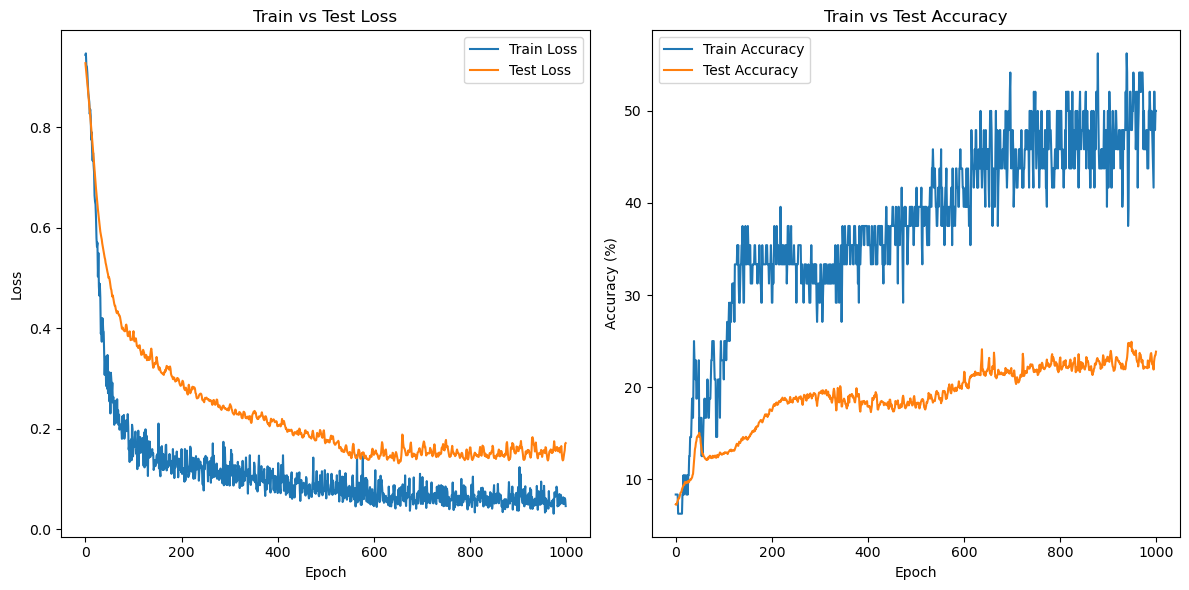

lr=0.001, hidden_dim=16, batch_size=8, epochs=1000
Final Train Loss: 0.0465, Final Test Loss: 0.1718
Final Train Accuracy: 50.00%, Final Test Accuracy: 23.85%

Average Train Accuracy (last 100 epochs): 48.15%, Average Test Accuracy (last 100 epochs): 22.96%

net_outputs_test[0] [-3.2858067 -3.1922736 -3.0987399 ... -0.550645  -0.564584  -0.5785229]


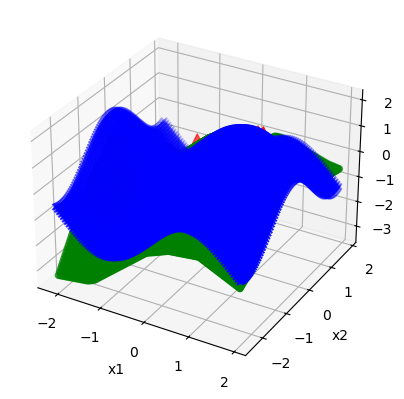

************************************************************************

**Running training with lr=0.001, hidden_dim=16, batch_size=8, epochs=2000


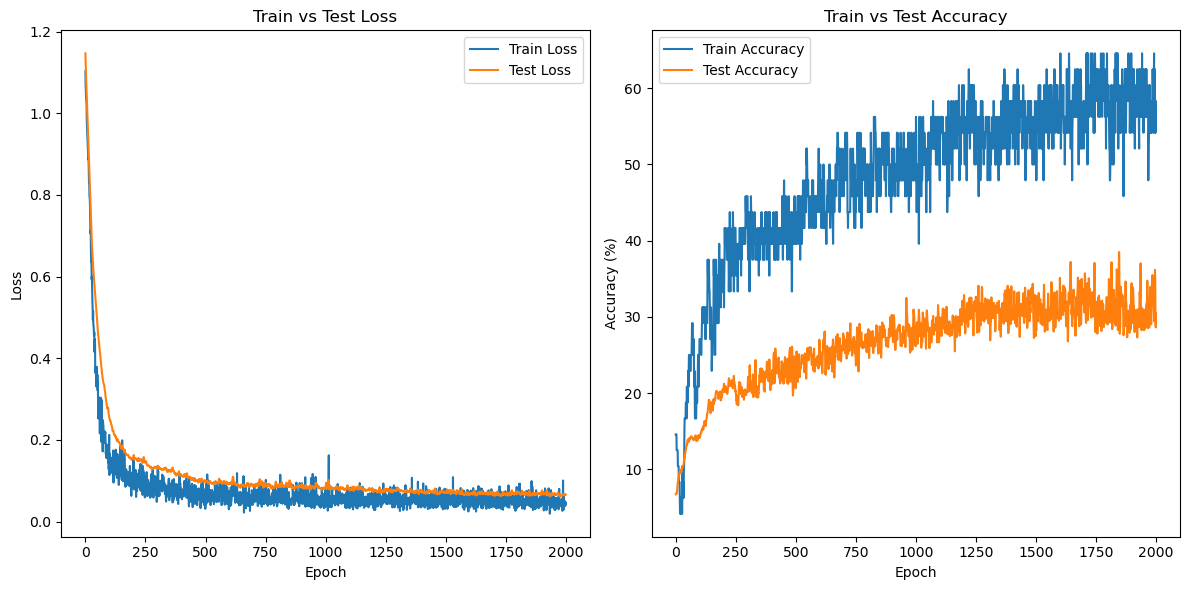

lr=0.001, hidden_dim=16, batch_size=8, epochs=2000
Final Train Loss: 0.0426, Final Test Loss: 0.0664
Final Train Accuracy: 56.25%, Final Test Accuracy: 30.47%

Average Train Accuracy (last 100 epochs): 58.06%, Average Test Accuracy (last 100 epochs): 30.91%

net_outputs_test[0] [-1.9680135  -1.8979981  -1.8279829  ... -0.9414799  -0.96357
 -0.98566043]


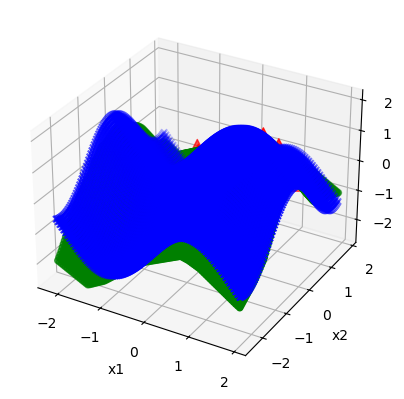

************************************************************************

**Running training with lr=0.001, hidden_dim=16, batch_size=8, epochs=3000


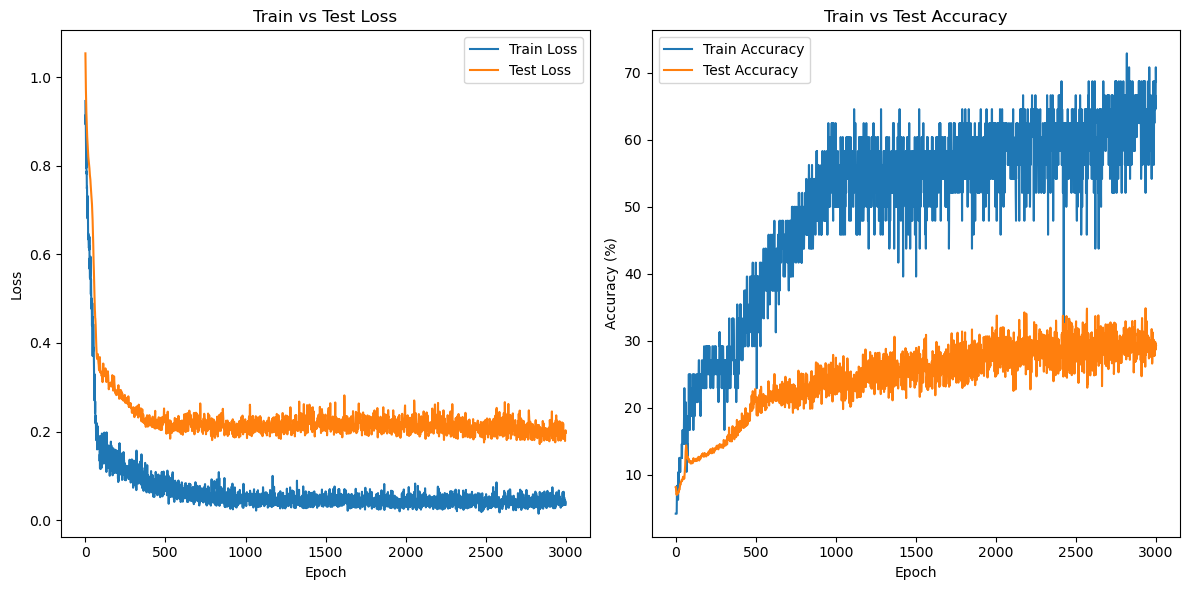

lr=0.001, hidden_dim=16, batch_size=8, epochs=3000
Final Train Loss: 0.0353, Final Test Loss: 0.1972
Final Train Accuracy: 68.75%, Final Test Accuracy: 29.34%

Average Train Accuracy (last 100 epochs): 63.17%, Average Test Accuracy (last 100 epochs): 29.39%

net_outputs_test[0] [-3.3870428  -3.3043885  -3.2217338  ... -0.69325906 -0.707477
 -0.7216949 ]


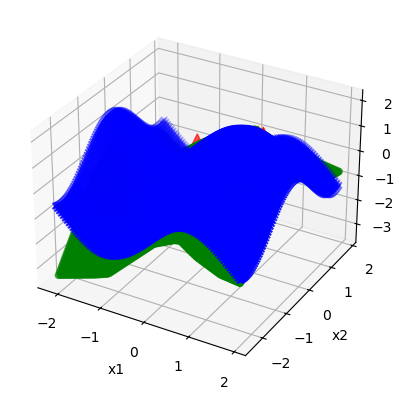

************************************************************************

### Summary Table ###
 learning_rate  hidden_dim  batch_size  epochs  final_train_loss  final_test_loss  final_train_accuracy  final_test_accuracy
        0.0200          16           8    2000            0.0201           0.1197               53.1667              25.4285
        0.0100          16           8    2000            0.0489           0.0934               55.8125              28.4006
        0.0050          16           8    2000            0.0472           0.1766               58.3958              26.7755
        0.0020          16           8    2000            0.0433           0.1448               60.8333              25.7464
        0.0010          16           8    2000            0.0545           0.1318               66.8125              32.3150
        0.0005          16           8    2000            0.0676           0.1138               54.2292              34.6660
        0.0001          16   

In [ ]:
###############################################Modified Code to 3D#########################################################
#############################4. different Hyperparameters new version with noise and normalization#####################################################
##### 保留原始代码，只修改部分代码，不覆盖

# Import matplotlib for plotting purposes
import matplotlib
matplotlib.rcParams["text.usetex"] = False
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Sometimes, we need Numpy, but wherever possible, we prefer torch.
import numpy as np

# Import PyTorch
import torch
import torch.nn as nn
from torch.utils.data import TensorDataset, DataLoader

# Float (32 bit) or Double (64 bit) precision? Choose!
torch.set_default_dtype(torch.float32)#64)
torch.set_num_threads(4) # Use _maximally_ 4 CPU cores

# This is a list to store the losses of the different hyperparameter configurations
train_losses_all = []
test_losses_all = []
models = []

# This is a list to store the hyperparameters of the training
# hyperparam_log = []

#device = torch.device("cpu")
# Choose a device for major calculations (if there is a special GPU card, you usually want that).

device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using {device} device")
device = torch.device(device)

# File path for saving the trained NN later.
# If only providing the file name (like here), the file will be generated in the same folder as the Python script
model_file = "mymodel.torch"

## The following script shows a data-driven training of a Neural Network.
## The data is generated in this script, too, by sampling from a function.
## The variables below are used to control this sampling
samples = 48
sample_min = -3
sample_max = 3
sample_span = sample_max - sample_min

## These parameters are usual hyperparameters of the NN and its training.
# batch_size = 8 # How many samples shall be presented to the NN, before running another optimizer step?
# hidden_dim = 16 # How many neurons shall there be in the hidden layer(s)?
input_dim = 2 # Input dimension of the NN (i.e. how many neurons are in the input layer?)
output_dim = 1 # Some for output

## Choose a criterion to evaluate the results. Here, we choose Mean Square error.
## The term "loss" means about the same as "remaining error" or "residual".
criterion = nn.MSELoss(reduction="mean")

## Here, we create the training data. In this example, we draw samples within the sampling interval and then pass it to
## e.g. the sin function (choose other functions to experiment with this script)
train_x = (sample_span * torch.rand(samples, 2) + sample_min * torch.ones(samples, 2))
train_y = torch.sin(train_x[:, 0]) + torch.cos(train_x[:, 1]) ##torch.pow(test_x, 2)

# add noise to the training data
noise_level = 0.2  # noise level
train_y += noise_level * torch.randn_like(train_y)

# To store summaries of each training run
summary_log = []

## This function logs the hyperparameters of the training
def log_hyperparameters(config, train_loss, test_loss, train_losses, train_accuracies, test_accuracies):
    hyperparam_log.append({
        "learning_rate": config["lr"],
        "hidden_dim": config["hidden_dim"],
        "batch_size": config["batch_size"],
        "epochs": config["epochs"],
        "final_train_loss": train_loss,
        "final_test_loss": test_loss,
        "final_train_accuracy": train_accuracies[-1],
        "final_test_accuracy": test_accuracies[-1],
        "train_losses": train_losses,
        "train_accuracies": train_accuracies,
        "test_accuracies": test_accuracies
    })


# print ("train_x", train_x)
# print ("train_y", train_y)

## Here, we create the test data. To show the effect of extrapolation and the detailed behavior of the NN,
## we choose points a bit outside the interval that we used for sampling training data. Also, we very dense points.
# test_x = torch.zeros(20*samples, 2)
# test_x[:, 0] = torch.linspace(sample_min - 0.5*sample_span, sample_max + 0.5*sample_span, test_x.size()[0])
# test_x[:, 1] = torch.linspace(sample_min - 0.5*sample_span, sample_max + 0.5*sample_span, test_x.size()[0])

# create test_x with meshgrid
grid_size = int(samples ** 0.5) * 2 
margin = 0.5  # only extend 1. from -5 to 5, extend to -5.5 to 5.5 
x1 = torch.linspace(sample_min - margin, sample_max + margin, 2*samples)
x2 = torch.linspace(sample_min - margin, sample_max + margin, 2*samples)
x1, x2 = torch.meshgrid(x1, x2) 
test_x = torch.zeros(2*samples*2*samples, 2)
test_x[:, 0] = x1.reshape(-1)
test_x[:, 1] = x2.reshape(-1)
test_y = torch.sin(test_x[:, 0]) + torch.cos(test_x[:, 1]) ##torch.pow(test_x, 2)

# standardize the data
scaler = StandardScaler()
train_x = torch.tensor(scaler.fit_transform(train_x), dtype=torch.float32)
test_x = torch.tensor(scaler.transform(test_x), dtype=torch.float32)

## We want a DataLoader to handle batching and shuffling of the training data for us.
## The DataLoader needs a TensorDataset, hence we create one from the Training data.
train_data = TensorDataset(train_x, train_y)

## This class creates the actual Neural Network.
class MLNet(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(MLNet, self).__init__()
        self.hidden_dim = hidden_dim

        ## In this case, I decided to pack the layers into a single container of type nn.Sequential
        ## This container is useful for Fully Connected NNs, where the output of each layer is just fed into the following layer.
        ## added dropout layer, which is a regularization technique to prevent overfitting
        self.fcnn1 = nn.Sequential(
            nn.Linear(input_dim, hidden_dim),
            #nn.Tanh(),
            nn.ReLU(),
            nn.Linear(hidden_dim, hidden_dim),
            nn.ReLU(),
            #nn.Linear(hidden_dim, hidden_dim),
            nn.Dropout(p=0.1),  # Dropout layer with 30% of neurons being dropped，but it's not working well，the model underfitting, so change to 0.05
            #nn.ReLU(),
            nn.Linear(hidden_dim, output_dim),
        ) ## That network here has exactly 1 hidden layer (comment out some lines or write new ones to add more layers)
        ## nn.Linear is in the pictures represented by the arrows and has the weights (and biases) which are the
        ## parameters of the NN.
        ## nn.ReLU and Tanh are examples for activation functions - in the pictures, these are the bubbles / neurons.
        ## Usually, the pattern is interchanging between one linear layer, one activation function, one linear layer, one activation function and so on

    ## It is required to write a function that is executed when calling the NN model.
    ## Usually, it takes the input data and passes it through the layers.
    ## Here, it is sufficient to call the sequential container since this container does exactly this job.
    ## But this function "forward" could also be used to set up more complex NN architectures with more complex data flows
    def forward(self, x):
        out = self.fcnn1(x)
        return out

## This function performs a test run with the NN.
## It takes the NN model and the test data, passes the test inputs through the network and
## compares it with the target values = test outputs = targets
## and based on that calculates the loss value
def evaluate(model, test_x, test_y):
    ## For testing, we don't need the autograd feature/ protocol of all calculation steps
    ## So, save some time and disable grad tracking.
    with torch.no_grad():
        model.eval() ## Set the NN model into evaluation mode
        outputs = [] ## Create empty lists to store the results
        targets = []
        testlosses = []

        out = model(test_x.to(device)) ## Call the model, i.e. perform the actual inference

        ## Move the output quantities to the CPU, detach them from the tensor operation book-keeping and convert them to numpy arrays/ vectors.
        ## This is all necessary for plotting
        outputs.append(out.cpu().detach().numpy())
        targets.append(test_y.cpu().detach().numpy())
        testlosses.append(criterion(out, test_y.to(device)).item())

    ## Now return that in form of a triple of variables
    return outputs, targets, testlosses

## This calls the evaluate function and takes care of the plotting.
def eval_and_plot(model):
        ## matplotlib tries to be similar to the plot functions of matlab  (admittedly, the commands have to begin with "plt.", but the rest
        ## is quite similar.)

        # create a 3D plot
        fig = plt.figure()
        ax = fig.add_subplot(111, projection='3d')

        ## Call the network on the test data
        net_outputs_test, targets_test, testlosses = evaluate(model, test_x, test_y)   
        # Plot the targets first in blue (which means to plot the actual function over the whole test interval)
        #ax.plot(test_x[:, 0], test_x[:, 1], targets_test[0], color="-b", label="Target")
        ax.scatter(test_x[:, 0], test_x[:, 1], targets_test[0], c='b', marker='x', label='Target')
        ax.set_xlabel('x1')
        ax.set_ylabel('x2')
        ax.set_zlabel('y')

        ## Call the network on the training data
        net_outputs_train, targets_train, testlosses = evaluate(model, train_x, train_y)
        ## First, plot the targets in red, i.e. plot the training data set
        ax.scatter(train_x[:, 0], train_x[:, 1], targets_train[0], c='r', s=100, marker='^', label='Target')

        ## Now, plot the output of the NN on the whole test interval in green
        ## This allows us to see how the NN performs for interpolation as well as for extrapolation
        ax.scatter(test_x[:, 0], test_x[:, 1], net_outputs_test[0].reshape(-1), c='g', marker='o', label='Learned')
        print("net_outputs_test[0]", net_outputs_test[0].reshape(-1))

        ## All plotting is done, open the plot window
        plt.show()

def calculate_accuracy(predictions, targets, threshold = train_y.std().item() * 0.1):
    """
    Calculate accuracy for regression by checking if predictions are within a certain range of targets.
    Args:
        predictions: Predicted values (torch.Tensor).
        targets: Actual values (torch.Tensor).
        threshold: Acceptable error range for considering a prediction as correct.
    Returns:
        Accuracy as a percentage (float).
    """
    correct = torch.abs(predictions - targets) <= threshold
    return correct.float().mean().item() * 100  # Convert to percentage

def train_with_logging(lr_run, hidden_dim_run, batch_size_run, EPOCHS):
    # Create data loaders
    train_loader = DataLoader(train_data, shuffle=True, batch_size=batch_size_run, drop_last=False)

    model = MLNet(input_dim, hidden_dim_run, output_dim).to(device)
    optimizer = torch.optim.Adam(model.parameters(), lr=lr_run, weight_decay=1e-5)

    train_losses = []
    test_losses = []
    train_accuracies = []
    test_accuracies = []

    for epoch in range(EPOCHS):
        model.train()
        avg_loss = 0.
        for x, label in train_loader:
            model.zero_grad()
            out = model(x.to(device)).squeeze(-1)
            loss = criterion(out, label.to(device))
            loss.backward()
            optimizer.step()
            avg_loss += loss.item()
        
        # Store train loss for the epoch
        train_losses.append(avg_loss / len(train_loader))

        # Evaluate train and test accuracy
        with torch.no_grad():
            model.eval()
            train_out = model(train_x.to(device)).squeeze(-1)
            train_accuracy = calculate_accuracy(train_out, train_y.to(device))
            train_accuracies.append(train_accuracy)

            test_out = model(test_x.to(device)).squeeze(-1)
            test_loss = criterion(test_out, test_y.to(device)).item()
            test_losses.append(test_loss)

            test_accuracy = calculate_accuracy(test_out, test_y.to(device))
            test_accuracies.append(test_accuracy)

        avg_final_train_acc = np.mean(train_accuracies[-100:]) if len(train_accuracies) >= 100 else train_accuracies[-1]
        avg_final_test_acc = np.mean(test_accuracies[-100:]) if len(test_accuracies) >= 100 else test_accuracies[-1]

    # Log final summary data
    summary_log.append({
        "learning_rate": lr_run,
        "hidden_dim": hidden_dim_run,
        "batch_size": batch_size,
        "epochs": EPOCHS,
        "final_train_loss": train_losses[-1],
        "final_test_loss": test_losses[-1],
        "final_train_accuracy": avg_final_train_acc,  # Approximate accuracy
        "final_test_accuracy": avg_final_test_acc,   # Approximate accuracy
    })

    return model, train_losses, test_losses, train_accuracies, test_accuracies, avg_final_train_acc, avg_final_test_acc



## As the functions written before are just function definitions,
## those functions still have to be called.
## This is done here.
## Train the model
# model = train(train_loader, lr, epochs)

## Test that saving the model worked: load it from file
# model = torch.load(model_file)
## and evaluate and plot once
# eval_and_plot(model)

###################### Hyperparameter Search Loop ######################
hyperparam_log = []  # reset hyperparam_log

hyperparam_configs = [
    # control variable: learning rate (lr) changes
    {"lr": 0.02,    "hidden_dim": 16, "batch_size": 8,  "epochs": 2000},
    {"lr": 0.01,    "hidden_dim": 16, "batch_size": 8,  "epochs": 2000},
    {"lr": 0.005,   "hidden_dim": 16, "batch_size": 8,  "epochs": 2000},
    {"lr": 0.002,   "hidden_dim": 16, "batch_size": 8,  "epochs": 2000},
    {"lr": 0.001,   "hidden_dim": 16, "batch_size": 8,  "epochs": 2000},
    {"lr": 0.0005,  "hidden_dim": 16, "batch_size": 8,  "epochs": 2000},
    {"lr": 0.0001,  "hidden_dim": 16, "batch_size": 8,  "epochs": 2000},

    # control variable: hidden dimension (hidden_dim) changes
    {"lr": 0.001,   "hidden_dim": 8,  "batch_size": 8,  "epochs": 2000},
    {"lr": 0.001,   "hidden_dim": 16, "batch_size": 8,  "epochs": 2000},
    {"lr": 0.001,   "hidden_dim": 32, "batch_size": 8,  "epochs": 2000},
    {"lr": 0.001,   "hidden_dim": 64, "batch_size": 8,  "epochs": 2000},

    # control variable: batch size (batch_size) changes
    {"lr": 0.001,   "hidden_dim": 16, "batch_size": 4,  "epochs": 2000},
    {"lr": 0.001,   "hidden_dim": 16, "batch_size": 8,  "epochs": 2000},
    {"lr": 0.001,   "hidden_dim": 16, "batch_size": 16, "epochs": 2000},
    {"lr": 0.001,   "hidden_dim": 16, "batch_size": 32, "epochs": 2000},

    # control variable: epochs changes
    {"lr": 0.001,   "hidden_dim": 16, "batch_size": 8,  "epochs": 1000},
    {"lr": 0.001,   "hidden_dim": 16, "batch_size": 8,  "epochs": 2000},
    {"lr": 0.001,   "hidden_dim": 16, "batch_size": 8,  "epochs": 3000},

]

for config in hyperparam_configs:
    lr_run          = config["lr"]
    hidden_dim_run  = config["hidden_dim"]
    batch_size_run  = config["batch_size"]
    epochs_run      = config["epochs"]

    print(f"\n**Running training with lr={lr_run}, hidden_dim={hidden_dim_run}, batch_size={batch_size_run}, epochs={epochs_run}")

    # Train the model with logging
    model, train_losses, test_losses, train_accuracies, test_accuracies, avg_train_accracy, avg_test_accuracy = train_with_logging(lr_run, hidden_dim_run, batch_size_run, epochs_run)

    # Plot the losses and accuracies
    plt.figure(figsize=(12, 6))
    
    # Loss plot
    plt.subplot(1, 2, 1)
    plt.plot(train_losses, label="Train Loss")
    plt.plot(test_losses, label="Test Loss")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.title("Train vs Test Loss")
    plt.legend()

    # Accuracy plot
    plt.subplot(1, 2, 2)
    plt.plot(train_accuracies, label="Train Accuracy")
    plt.plot(test_accuracies, label="Test Accuracy")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy (%)")
    plt.title("Train vs Test Accuracy")
    plt.legend()

    plt.tight_layout()
    plt.show()

    print(f"lr={lr_run}, hidden_dim={hidden_dim_run}, batch_size={batch_size_run}, epochs={epochs_run}")
    print(f"Final Train Loss: {train_losses[-1]:.4f}, Final Test Loss: {test_losses[-1]:.4f}")
    print(f"Final Train Accuracy: {train_accuracies[-1]:.2f}%, Final Test Accuracy: {test_accuracies[-1]:.2f}%\n")
    print(f"Average Train Accuracy (last 100 epochs): {avg_train_accracy:.2f}%, Average Test Accuracy (last 100 epochs): {avg_test_accuracy:.2f}%\n")

    eval_and_plot(model)  # plot the training results
    print("************************************************************************")

###################### Hyperparameter Search Loop ######################

# Print summary table
import pandas as pd

print("\n### with Noise and regularization Summary Table ###")
summary_df = pd.DataFrame(summary_log)
summary_df = summary_df.round(4)  # Round results for clarity
print(summary_df.to_string(index=False))  # Pretty print
